<a href="https://colab.research.google.com/github/kamalmukhalalaty/Covid-19-Cases-Time-Series-Forcasting/blob/main/NY_State_Covid_19_Cases_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install maya
#!pip install pyramid-arima
#!pip install Numpy
#!pip install pmdarima
import pandas as pd
pd.set_option('display.max_rows', 60) # go back to 60 later

In [2]:
import maya
import warnings
warnings.filterwarnings("ignore")

#1. Data Cleaning

The COVID-19 CSSE John Hopkins dataset is is used via a url to .csv file, 

In this section I  will extract the case counts and clean the data so that I have a time series of COVID-19 cases from NY State. 

Note that this is a time series data and so the number of cases on any  given day is the cumulative number. 

Required data files:

time_series_covid19_confirmed_US.csv / time_series_covid19_confirmed_global.csv
  
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

/

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv 


These .csv files contain case counts from the US and globally. Notice that for within the US and some other countries the case counts are further broken down into sub-regions.

- **I Decided to go with New York State, USA for the plethora of data avaiable and my personal familiarity with Governor Cuomo's highly publicized response.**

- I will be restricting the last date in the timeseries to be December 10th and delete any data from days after this date in order to make a time series forcast from that point onwards


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_us = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
    index_col=0,
    thousands=','
)

# Restrict the last date in the timeseries to be December 10th and delete any data from days after this date.
df_us.drop(df_us.loc[:,'12/11/20':], axis=1,inplace=True)

df_global = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    index_col=0,
    thousands=','
)

# Restrict the last date in the timeseries to be December 10th and delete any data from days after this date.
df_global.drop(df_global.loc[:,'12/11/20':], axis=1,inplace=True)

In [4]:
#df_global.index[df_global.index.isna()]
#df_global.index[df_global.index.notna()]

In [5]:
sum(df_global.index=='New York')

0

Therefore it is not in the global dataset

In [6]:
# All of the New York Entries in the US Data

pd.options.display.max_rows # 60 is default
pd.set_option('display.max_rows', None)
inter=df_us[df_us.Province_State=='New York']
inter

iso2 iso3  code3     FIPS  ... 12/7/20 12/8/20 12/9/20  12/10/20
UID                                 ...                                  
84036001   US  USA    840  36001.0  ...    6818    6991    7176      7392
84036003   US  USA    840  36003.0  ...    1239    1242    1286      1306
84036005   US  USA    840  36005.0  ...   71020   71455   71811     72541
84036007   US  USA    840  36007.0  ...    6003    6057    6160      6238
84036009   US  USA    840  36009.0  ...    1439    1470    1514      1594
84036011   US  USA    840  36011.0  ...    1196    1242    1282      1324
84036013   US  USA    840  36013.0  ...    1917    1960    2027      2099
84036015   US  USA    840  36015.0  ...    3457    3473    3531      3595
84036017   US  USA    840  36017.0  ...     739     754     767       781
84036019   US  USA    840  36019.0  ...     549     568     574       586
84036021   US  USA    840  36021.0  ...    1111    1117    1139      1157
84036023   US  USA    840  36023.0  ...    1219    1258    1291      1335
84036025   US  USA    840  36025.0  ...     446     454     470       477
84036027   US  USA    840  36027.0  ...    8192    8339    8456      8629
84036029   US  USA    840  36029.0  ...   29720   30073   30719     31282
84036031   US  USA    840  36031.0  ...     321     328     334       348
84036033   US  USA    840  36033.0  ...     350     368     375       398
84036035   US  USA    840  36035.0  ...     634     676     720       742
84036037   US  USA    840  36037.0  ...    1328    1349    1393      1452
84036039   US  USA    840  36039.0  ...     802     810     825       832
84036041   US  USA    840  36041.0  ...      60      60      63        65
84036043   US  USA    840  36043.0  ...     917     941     986      1020
84036045   US  USA    840  36045.0  ...     796     828     861       878
84036047   US  USA    840  36047.0  ...   98270   98960   99704    100930
84036049   US  USA    840  36049.0  ...     475     500     510       521
84036051   US  USA    840  36051.0  ...     906     923     971      1017
84036053   US  USA    840  36053.0  ...    1209    1256    1325      1381
84036055   US  USA    840  36055.0  ...   19518   19871   20648     21267
84036057   US  USA    840  36057.0  ...     628     653     671       683
84036059   US  USA    840  36059.0  ...   65632   66495   67203     67978
84036061   US  USA    840  36061.0  ...   48416   48711   49035     49645
84036063   US  USA    840  36063.0  ...    4952    5077    5266      5378
84036065   US  USA    840  36065.0  ...    6382    6545    6799      7066
84036067   US  USA    840  36067.0  ...   12941   13188   13598     13945
84036069   US  USA    840  36069.0  ...    1659    1687    1764      1851
84036071   US  USA    840  36071.0  ...   18354   18564   18742     18971
84036073   US  USA    840  36073.0  ...     721     730     756       788
84036075   US  USA    840  36075.0  ...    2056    2110    2159      2204
84036077   US  USA    840  36077.0  ...     747     761     804       821
84080036   US  USA    840  80036.0  ...       0       0       0         0
84036079   US  USA    840  36079.0  ...    3368    3428    3489      3560
84036081   US  USA    840  36081.0  ...   99583  100366  101083    102353
84036083   US  USA    840  36083.0  ...    2145    2210    2269      2351
84036085   US  USA    840  36085.0  ...   26635   26968   27235     27689
84036087   US  USA    840  36087.0  ...   22897   23072   23308     23505
84036091   US  USA    840  36091.0  ...    2787    2888    2965      3065
84036093   US  USA    840  36093.0  ...    3081    3179    3272      3371
84036095   US  USA    840  36095.0  ...     250     260     275       279
84036097   US  USA    840  36097.0  ...     355     359     364       370
84036099   US  USA    840  36099.0  ...     389     399     408       444
84036089   US  USA    840  36089.0  ...    1138    1162    1182      1206
84036101   US  USA    840  36101.0  ...    2084    2126    2195      2238
84036103   US

In [7]:
# Drop empty rows (Out of NY, Unspecified)

inter.drop(index=inter[inter.FIPS==90036].index, inplace=True)
inter.drop(index=inter[inter.FIPS==80036].index, inplace=True)
inter

iso2 iso3  code3     FIPS  ... 12/7/20 12/8/20 12/9/20  12/10/20
UID                                 ...                                  
84036001   US  USA    840  36001.0  ...    6818    6991    7176      7392
84036003   US  USA    840  36003.0  ...    1239    1242    1286      1306
84036005   US  USA    840  36005.0  ...   71020   71455   71811     72541
84036007   US  USA    840  36007.0  ...    6003    6057    6160      6238
84036009   US  USA    840  36009.0  ...    1439    1470    1514      1594
84036011   US  USA    840  36011.0  ...    1196    1242    1282      1324
84036013   US  USA    840  36013.0  ...    1917    1960    2027      2099
84036015   US  USA    840  36015.0  ...    3457    3473    3531      3595
84036017   US  USA    840  36017.0  ...     739     754     767       781
84036019   US  USA    840  36019.0  ...     549     568     574       586
84036021   US  USA    840  36021.0  ...    1111    1117    1139      1157
84036023   US  USA    840  36023.0  ...    1219    1258    1291      1335
84036025   US  USA    840  36025.0  ...     446     454     470       477
84036027   US  USA    840  36027.0  ...    8192    8339    8456      8629
84036029   US  USA    840  36029.0  ...   29720   30073   30719     31282
84036031   US  USA    840  36031.0  ...     321     328     334       348
84036033   US  USA    840  36033.0  ...     350     368     375       398
84036035   US  USA    840  36035.0  ...     634     676     720       742
84036037   US  USA    840  36037.0  ...    1328    1349    1393      1452
84036039   US  USA    840  36039.0  ...     802     810     825       832
84036041   US  USA    840  36041.0  ...      60      60      63        65
84036043   US  USA    840  36043.0  ...     917     941     986      1020
84036045   US  USA    840  36045.0  ...     796     828     861       878
84036047   US  USA    840  36047.0  ...   98270   98960   99704    100930
84036049   US  USA    840  36049.0  ...     475     500     510       521
84036051   US  USA    840  36051.0  ...     906     923     971      1017
84036053   US  USA    840  36053.0  ...    1209    1256    1325      1381
84036055   US  USA    840  36055.0  ...   19518   19871   20648     21267
84036057   US  USA    840  36057.0  ...     628     653     671       683
84036059   US  USA    840  36059.0  ...   65632   66495   67203     67978
84036061   US  USA    840  36061.0  ...   48416   48711   49035     49645
84036063   US  USA    840  36063.0  ...    4952    5077    5266      5378
84036065   US  USA    840  36065.0  ...    6382    6545    6799      7066
84036067   US  USA    840  36067.0  ...   12941   13188   13598     13945
84036069   US  USA    840  36069.0  ...    1659    1687    1764      1851
84036071   US  USA    840  36071.0  ...   18354   18564   18742     18971
84036073   US  USA    840  36073.0  ...     721     730     756       788
84036075   US  USA    840  36075.0  ...    2056    2110    2159      2204
84036077   US  USA    840  36077.0  ...     747     761     804       821
84036079   US  USA    840  36079.0  ...    3368    3428    3489      3560
84036081   US  USA    840  36081.0  ...   99583  100366  101083    102353
84036083   US  USA    840  36083.0  ...    2145    2210    2269      2351
84036085   US  USA    840  36085.0  ...   26635   26968   27235     27689
84036087   US  USA    840  36087.0  ...   22897   23072   23308     23505
84036091   US  USA    840  36091.0  ...    2787    2888    2965      3065
84036093   US  USA    840  36093.0  ...    3081    3179    3272      3371
84036095   US  USA    840  36095.0  ...     250     260     275       279
84036097   US  USA    840  36097.0  ...     355     359     364       370
84036099   US  USA    840  36099.0  ...     389     399     408       444
84036089   US  USA    840  36089.0  ...    1138    1162    1182      1206
84036101   US  USA    840  36101.0  ...    2084    2126    2195      2238
84036103   US  USA    840  36103.0  ...   67860   69024   69996     71043
84036105   US

Create the time series data for the entier state.

In [8]:
pd.set_option('display.max_rows', 60)
State_Cases=inter.loc[:,'1/22/20':].sum()
State_Cases.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/1/20', '12/2/20', '12/3/20', '12/4/20', '12/5/20', '12/6/20',
       '12/7/20', '12/8/20', '12/9/20', '12/10/20'],
      dtype='object', length=324)

In [9]:
from datetime import timedelta

df_nyc=pd.DataFrame(State_Cases)
df_nyc.rename(columns={0: "NYC_Cases"}, inplace=True)
df_nyc.index.name='Date'
# make the index a date_time data type 
# this is helpful as in the future we may want to re-sample with different 
# date ranges eg. weekly or monthly to help with resampling 
# or to line up with a different time series thathas a different sampling freq.
# more on this here: https://towardsdatascience.com/working-with-time-series-data-a8872ebcac3
df_nyc.index = pd.to_datetime(df_nyc.index, infer_datetime_format=True)
print("number of nans in the data=",np.sum(df_nyc.isna()))
df_nyc['NYC_New'] = df_nyc['NYC_Cases'].diff()
# will have a nan for day 1 backfill it
df_nyc['NYC_New'] = df_nyc['NYC_New'].fillna(method='bfill')

# start index later to get rid of wastfull 0 days only leave 3
start_date=pd.to_datetime(df_nyc[df_nyc.NYC_Cases!=0].index[0],infer_datetime_format=True)-timedelta(days=3)
start_date=pd.to_datetime(start_date,infer_datetime_format=True)
df_nyc=df_nyc.loc[start_date:,:]

# Sanity Check for NaN values
print(np.sum(df_nyc.isna()))

#Show cleaned dataframe
df_nyc

number of nans in the data= NYC_Cases    0
dtype: int64
NYC_Cases    0
NYC_New      0
dtype: int64


NYC_Cases  NYC_New
Date                          
2020-02-29          0      0.0
2020-03-01          0      0.0
2020-03-02          0      0.0
2020-03-03          1      1.0
2020-03-04         10      9.0
...               ...      ...
2020-12-06     714834  10151.0
2020-12-07     723287   8453.0
2020-12-08     731722   8435.0
2020-12-09     740980   9258.0
2020-12-10     752104  11124.0

[286 rows x 2 columns]

# 2. Data Visualization and Exploratory Data Analysis 


## Visualization + Exploration

###Basics

NYC_Cases       NYC_New
count     286.000000    286.000000
mean   377762.395105   2629.734266
std    168796.704544   2996.419735
min         0.000000      0.000000
25%    339658.000000    676.250000
50%    411048.000000   1148.000000
75%    461291.000000   3819.750000
max    752104.000000  14524.000000

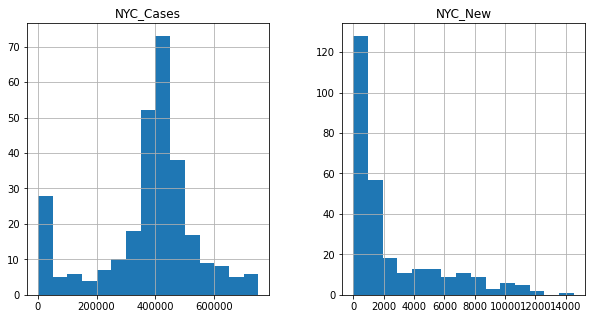

In [10]:
df_nyc.hist(bins=15, figsize=(10,5))
df_nyc.describe()

Plot on the left is Cumulative Daily Cases
  - looks normal with the exception of the high frequency of zero case days whihc can be remedied by shifting the dataset (start if time series) to not start in non zero teritory. 

Plot on the right is New Daily Cases
- Skewed, with a median of 1109 New Daily Cases


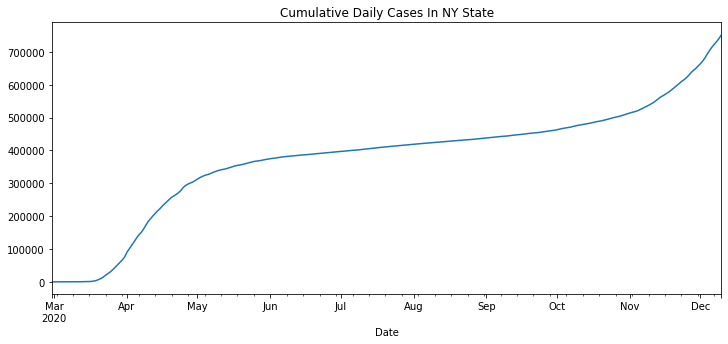

In [11]:
df_nyc['NYC_Cases'].plot(figsize=(12,5),title='Cumulative Daily Cases In NY State')

cumulative data, only goes up!

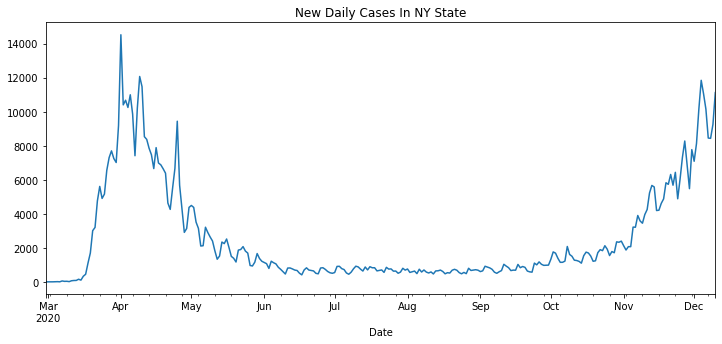

In [12]:
df_nyc['NYC_New'].plot(figsize=(12,5),title='New Daily Cases In NY State')

These spikes seem to have a consistency and may represent some seasonality in the data. Looking closer at an area with consistent spikes.

In [13]:
a=df_nyc['NYC_New'].idxmax()-timedelta(days=5)
b=df_nyc['NYC_New'].idxmax()+timedelta(days=10)
print(df_nyc.loc[a:b].describe())
print('______________________________________')
print(df_nyc.loc[a:b])

           NYC_Cases       NYC_New
count      16.000000     16.000000
mean   116078.062500   9679.062500
std     48270.101723   2090.601778
min     44701.000000   7015.000000
25%     73555.500000   7627.500000
50%    116580.000000  10036.000000
75%    152526.750000  10755.000000
max    192262.000000  14524.000000
______________________________________
            NYC_Cases  NYC_New
Date                          
2020-03-27      44701   7304.0
2020-03-28      52400   7699.0
2020-03-29      59648   7248.0
2020-03-30      66663   7015.0
2020-03-31      75853   9190.0
2020-04-01      90377  14524.0
2020-04-02     100780  10403.0
2020-04-03     111455  10675.0
2020-04-04     121705  10250.0
2020-04-05     132700  10995.0
2020-04-06     142561   9861.0
2020-04-07     149974   7413.0
2020-04-08     160185  10211.0
2020-04-09     172256  12071.0
2020-04-10     183729  11473.0
2020-04-11     192262   8533.0


**10 days gap between the spikes. this will be analysed further for seasonality.**


Looking at relevant Governoment actions around the selected time:

April 15, 2020	All state residents ordered to wear face masks/coverings in public places where social distancing is not possible.

More work into understanding this is done in the next section


### Advanced



I will attemp to overlay case data with governoment response to get a better sense NY State's Covid-19 response timeline and the effectivness of certain meassures.

NYC is comprised of 5 Boroughs nameley: Manhattan, The Bronx, Brooklyn, Queens and Staten Island. combined these boroughs played the bigest role in the states numbers due to the extremly high density of populations in these regions. the remaining counties within the state had a different timeline interms of the phase re-openings. Considering this, in adition to state wide governoment response I have also highlighted noteworthy actions at the city level for NYC. 

The following information was compiled from 
- abcNews 
  - https://abcnews.go.com/Health/york-coronavirus-bay-states-surges/story?id=71772507
- Wikepedia
  - https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_(state)

In format (/MM/DD/YY)

March:
- /03/22/20 Cuomo issues stay home order
- /03/12/20 Universities statewide close (shift online)
- /03/15/20 NYC Shools close 
- /03/27/20 State wide Shools closure
- /03/28/20 non essential Construction sites shut down

April:
- /04/04/20 De Balsio (Mayor of NYC) recommends face coverings to New Yorkers
- /04/15/20 Cuomo mandates face coverings state wide

May:
- /05/15/20 Phase 1 of reopening allowed for counties that met qualifications. 
  - Five counties met qualifications and began reopening on this date.
- /05/23/20 Gatherings of up to 10 people allowed

June:
- /06/01/20 Major BLM Protests Start NYC
  - https://www.cnbc.com/2020/06/06/new-york-george-floyd-protest-photos-video.html
- /06/04/20 Major BLM Protests End NYC 
- /06/08/20 NYC Enters Phase 1
  - allowing the reopening of construction, manufacturing, agriculture, forestry, fishing, and select retail businesses that can offer curbside pickup.
- /06/15/20 Four-phase reopening plan is modified
  - allow non-essential gatherings of 25 people upon entry of Phase 3, and 50 people upon entry of Phase 4.
- /06/22/20 NYC Enters Phase 2
  - allowing the reopening of outdoor dining at restaurants, hair salons and barber shops, offices, real estate firms, in-store retail, vehicle sales, retail rental, repair services, cleaning services, and commercial building management businesses.

July:
- /07/01/20 Cuomo stops dine-indoor Re-opening 
- /07/06/20 NYC Enters Phase 3

August:
- /08/19/20 Ban on ticketed music events at bars and restaurants.

October:
- /10/01/20 The previous ban on ticketed events at bars and restaurants is ruled unconstitutional.
- /10/06/20 Micro-cluster strategy is introduced, with the first micro-clusters being parts of Brooklyn and Queens.

November:
- /11/12/20 Bars, gyms, and any other business with a liquor license must close by 10 p.m. (restaurants as well, except for curbside pickup). Household gatherings limited to ten people.

December:
- /12/08/20 Cuomo directed hospital bed capacity to be upgraded by 25 percent and warned that indoor dining may face a total shutdown in the New York City area if hospitalization rates continued to climb.



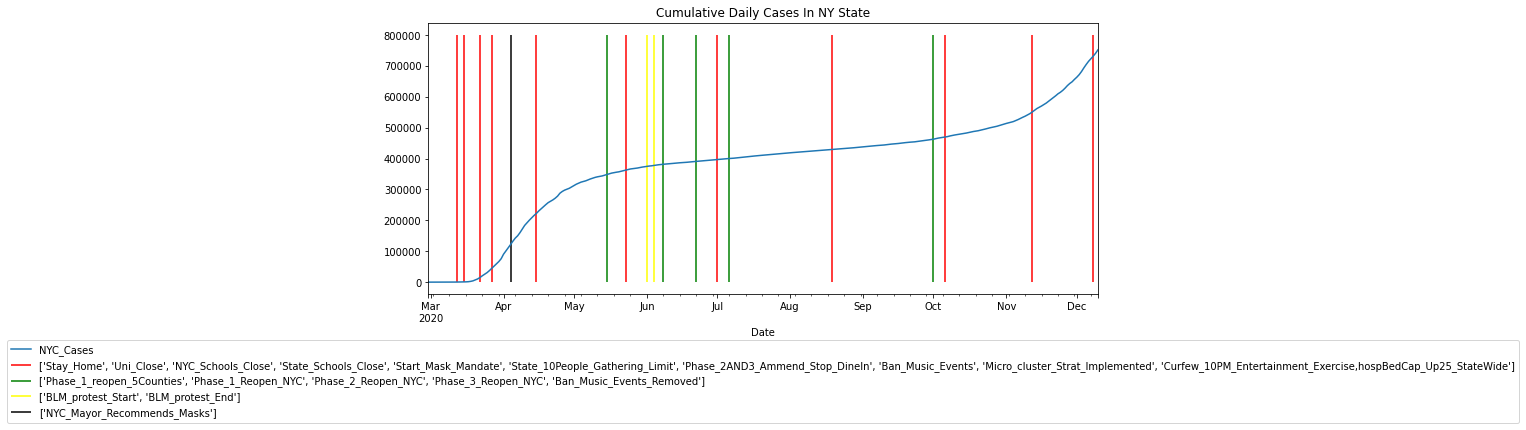

In [14]:
Data=df_nyc['NYC_Cases']
Data.plot(figsize=(12,5),title='Cumulative Daily Cases In NY State')

# Shutdowns
Stay_Home='03/22/20' #Cuomo issues stay home order
Uni_Close='03/12/20' #Universities statewide close (shift online)
NYC_Schools_Close='03/15/20' #NYC Shools close
State_Schools_Close='03/27/20' #State wide Shools closure
Start_Mask_Mandate='04/15/20' #Cuomo mandates face coverings state wide
State_10People_Gathering_Limit='05/23/20' #Gatherings of up to 10 people allowed
Phase_2AND3_Ammend_Stop_DineIn='07/01/20' #Cuomo changes stops dine in  
Ban_Music_Events='08/19/20' #Ban on ticketed music events at bars and restaurants.
Micro_cluster_Strat_Implemented='10/06/20' #Micro-cluster strategy is introduced, with the first micro-clusters being parts of Brooklyn and Queens.
Curfew_10PM_Entertainment_Exercise='11/12/20'  #Bars, gyms, and any other business with a liquor license must close by 10 p.m. (restaurants as well, except for curbside pickup). Household gatherings limited to ten people.
hospBedCap_Up25_StateWide='12/08/20' #Cuomo directed hospital bed capacity to be upgraded by 25 percent and warned that indoor dining may face a total shutdown in the New York City area if hospitalization rates continued to climb.

# Openings
Phase_1_reopen_5Counties='05/15/20' # 5 counties not NYC
Phase_1_Reopen_NYC='06/08/20' #NYC Enters Phase 1 ##allowing the reopening of construction, manufacturing, agriculture, forestry, fishing, and select retail businesses that can offer curbside pickup.
Phase_2_Reopen_NYC='06/22/20' #NYC Enters Phase 2 ##allowing the reopening of outdoor dining at restaurants, hair salons and barber shops, offices, real estate firms, in-store retail, vehicle sales, retail rental, repair services, cleaning services, and commercial building management businesses.
Phase_3_Reopen_NYC='07/06/20' #NYC Enters Phase 3
Ban_Music_Events_Removed='10/01/20' #The previous ban on ticketed events at bars and restaurants is ruled unconstitutional.

# Major BLM Protests in NYC June1st-June4th
BLM_protest_Start='06/01/20'
BLM_protest_End='06/04/20'

#Mayor Recommendation 
NYC_Mayor_Recommends_Masks='04/04/20' #De Balsio (Mayor of NYC) recommends face coverings to New Yorkers

plt.vlines([Stay_Home,
            Uni_Close,
            NYC_Schools_Close,
            State_Schools_Close,
            Start_Mask_Mandate,
            State_10People_Gathering_Limit,
            Phase_2AND3_Ammend_Stop_DineIn,
            Ban_Music_Events,
            Micro_cluster_Strat_Implemented,
            Curfew_10PM_Entertainment_Exercise,
            hospBedCap_Up25_StateWide,
            ],ymin=0,ymax=800000,colors='red', 
           label=['Stay_Home',
            'Uni_Close',
            'NYC_Schools_Close',
            'State_Schools_Close',
            'Start_Mask_Mandate',
            'State_10People_Gathering_Limit',
            'Phase_2AND3_Ammend_Stop_DineIn',
            'Ban_Music_Events',
            'Micro_cluster_Strat_Implemented',
            'Curfew_10PM_Entertainment_Exercise,'
            'hospBedCap_Up25_StateWide',
            ])
plt.vlines([Phase_1_reopen_5Counties,
            Phase_1_Reopen_NYC,
            Phase_2_Reopen_NYC,
            Phase_3_Reopen_NYC,
            Ban_Music_Events_Removed,
            ],ymin=0,ymax=800000,colors='green', 
           label=['Phase_1_reopen_5Counties',
            'Phase_1_Reopen_NYC',
            'Phase_2_Reopen_NYC',
            'Phase_3_Reopen_NYC',
            'Ban_Music_Events_Removed',
            ])
plt.vlines([BLM_protest_Start,
            BLM_protest_End],
           ymin=0,ymax=800000,colors='yellow', 
           label=['BLM_protest_Start',
            'BLM_protest_End'])
plt.vlines([NYC_Mayor_Recommends_Masks],
           ymin=0,ymax=800000,colors='black', 
           label=['NYC_Mayor_Recommends_Masks'])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))


I have plotted the closures as vertical red lines and reopenings as green lines. 

The yellow lines signify noteworthy BLM protests (A truley large congrigation of people) is worth investigating.

The black line represents mask mandate. whihc is in my opinion the most important response.



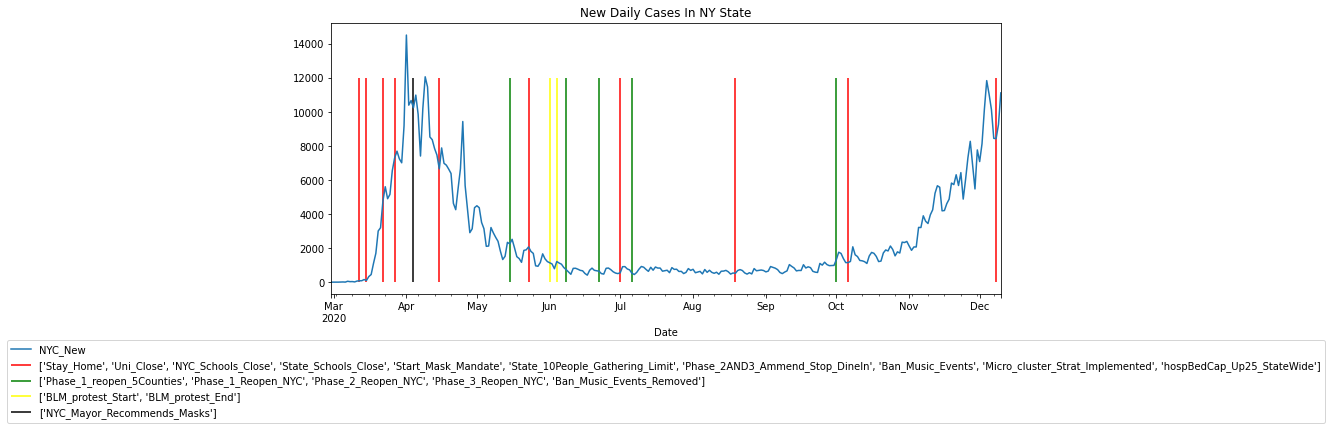

In [15]:
Data=df_nyc['NYC_New']
Data.plot(figsize=(12,5),title='New Daily Cases In NY State')

plt.vlines([Stay_Home,
            Uni_Close,
            NYC_Schools_Close,
            State_Schools_Close,
            Start_Mask_Mandate,
            State_10People_Gathering_Limit,
            Phase_2AND3_Ammend_Stop_DineIn,
            Ban_Music_Events,
            Micro_cluster_Strat_Implemented,
            hospBedCap_Up25_StateWide,
            ],ymin=0,ymax=12000,colors='red', 
           label=['Stay_Home',
            'Uni_Close',
            'NYC_Schools_Close',
            'State_Schools_Close',
            'Start_Mask_Mandate',
            'State_10People_Gathering_Limit',
            'Phase_2AND3_Ammend_Stop_DineIn',
            'Ban_Music_Events',
            'Micro_cluster_Strat_Implemented',
            'hospBedCap_Up25_StateWide',
            ])
plt.vlines([Phase_1_reopen_5Counties,
            Phase_1_Reopen_NYC,
            Phase_2_Reopen_NYC,
            Phase_3_Reopen_NYC,
            Ban_Music_Events_Removed,
            ],ymin=0,ymax=12000,colors='green', 
           label=['Phase_1_reopen_5Counties',
            'Phase_1_Reopen_NYC',
            'Phase_2_Reopen_NYC',
            'Phase_3_Reopen_NYC',
            'Ban_Music_Events_Removed',
            ])
plt.vlines([BLM_protest_Start,
            BLM_protest_End],
           ymin=0,ymax=12000,colors='yellow', 
           label=['BLM_protest_Start',
            'BLM_protest_End'])
plt.vlines([NYC_Mayor_Recommends_Masks],
           ymin=0,ymax=12000,colors='black', 
           label=['NYC_Mayor_Recommends_Masks'])


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

Between march and april we see that the first 4 shutdoiwn orders of
- /03/22/20 Cuomo issues stay home order
- /03/12/20 Universities statewide close (shift online)
- /03/15/20 NYC Shools close
- /03/27/20 State wide Shools closure

Had a slow and gradual effect on reducing the uprend in daily cases. It wasnt untill:
- /04/04/20 when De Balsio (Mayor of NYC) recommends face coverings to New Yorkers that it seems that coupled with raised awarness of the nature of the virus and its spread and finally
- /04/15/20 Cuomo mandates face coverings state wide
That covid cases Calmed down!

Mask mandate appears to have put a big cap on things. we do see a spike 10 days later that I think is just an influx of cases from people who carried the virus for a week to 10 days before becoming developing symptoms (small subset that got infected before mask mandate)

From that point we go down as reopenings begin and even the BLM protests everyone was afraid of appears to barley have made a difference. further showcasing the imprtance of the mask mandate which was followed in large during the protests in NYC atleast.

As we enter the second wave there apears to be some hesitation on imposung the same lockdowns as before which can be seen by the lack of governoment response in betweeb October and December. however at the start of October and at what seems like the perfect time /10/06/20 Micro-cluster strategy was introduced, with the first micro-clusters being parts of Brooklyn and Queens. This bassically imposes different lockdowns and response in different boroughs and reigions. it was designed to be a more economically mild and less indiscriminant response method (go easy on areas with low numbers, hard on areas with higher ones) however it doesnt appear to have worked too well as we are well into the second wave and winter has come.

**In this report I aim to find a way to forcast the future and find a path to a covid 19 response that can help NY State turn things around smoothly.**

Compare/Contrast

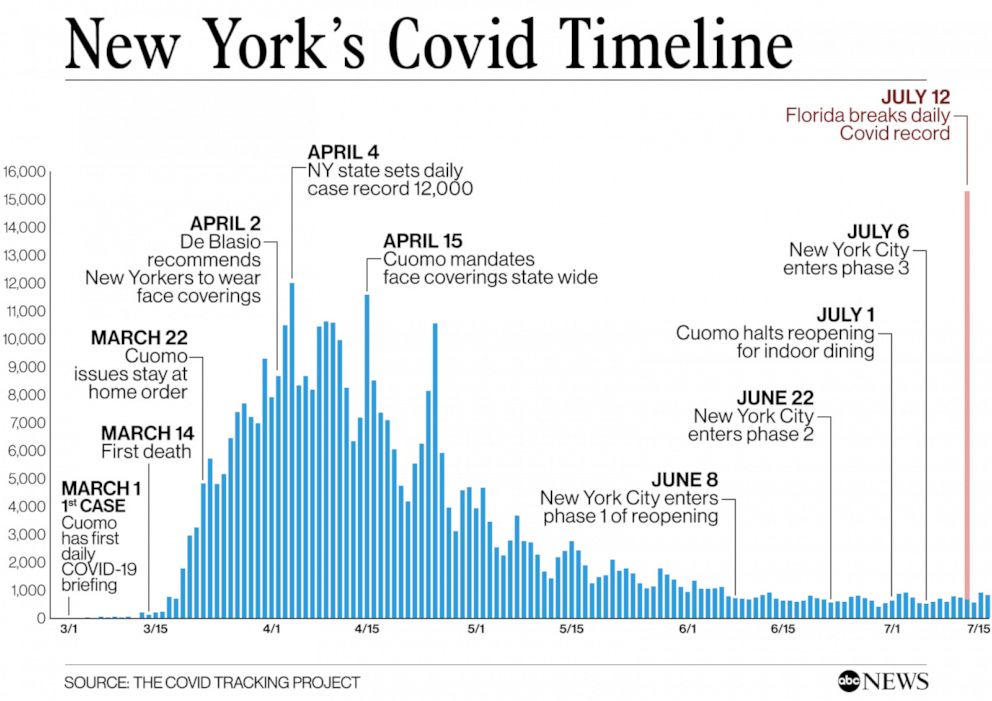

### Time Series Data Decomposition

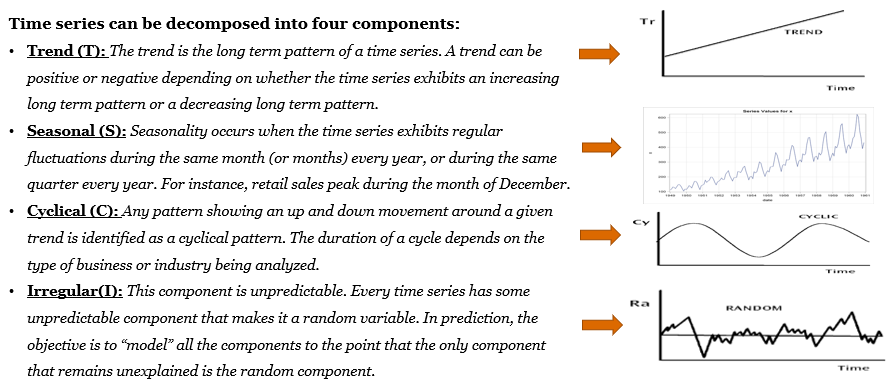

https://otexts.com/fpp2/

#### Cumulative Dataset

Data trend does not appear linear therefore will use a multiplicative model to decompose the data

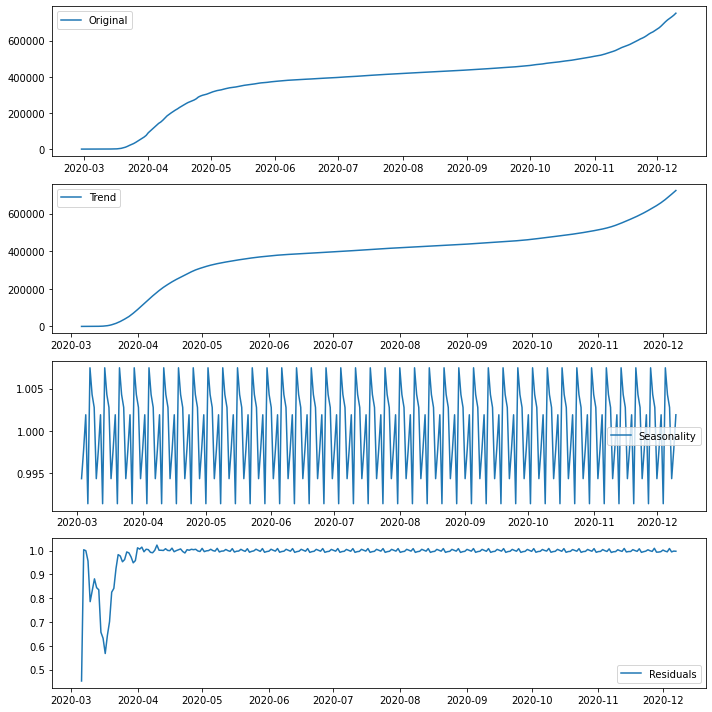

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import math

ts=df_nyc['NYC_Cases']

decomposition = seasonal_decompose(ts[ts!=0], model='multiplicative') #freq=7 from visual inspection of spikes
# It appears that if left blank statsmodel Overrides default periodicity of x if x is a pandas object with a timeseries index. 
# which is Daily frequency. this was verified using the pd.infer_freq(DATA)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Data Could be more informative if differenced once to give us the non-cumulative or new number of daily cases. residuals are essentially flat here, not much analysis can be done. Magnitude of seasonal componant is also incredibly small. seasonal componants has ~4 peaks/trouths in each month so a rough estimate of the seasonal period could be 1 week

#### Differenced/Non Cumulative Dataset

Data trend does not appear linear therefore will use a multiplicative model to decompose the data

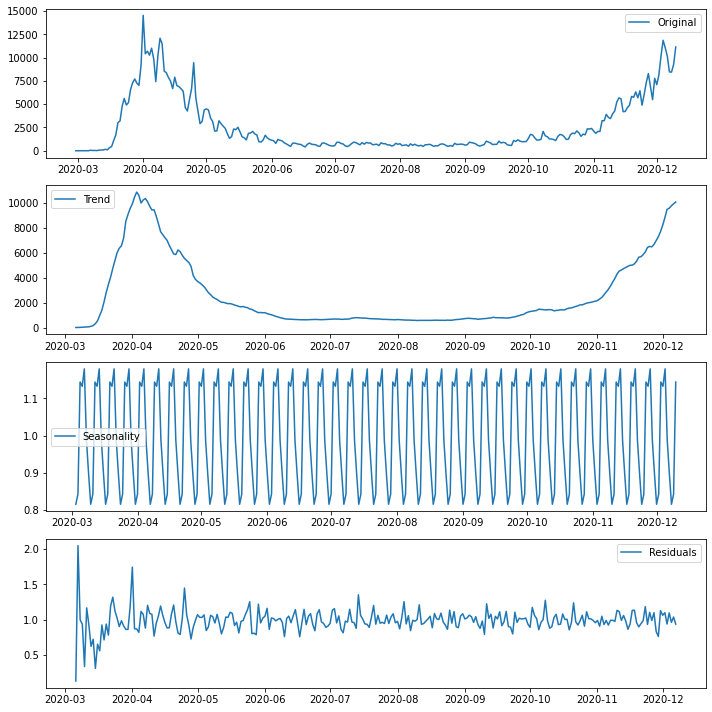

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import math

ts=df_nyc['NYC_New']

decomposition = seasonal_decompose( ts[ts!=0],model='multiplicative' ) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

period of seasonal componant remails the same at approx 1 week 
residuals are more understandable I would say
and overall the curve makes more sense.

# 3. Model selection and fitting to data

Goal here was to select a model that allows me to project the time series of COVID-19 Cases into the future. 

I want to output three projections, one that assumes worst case spread, another that assumes  best case spread and a third that models a base-case in between best and worst spread. 

I have chosen to go with the ARIMA model family which includes AR, ARIMA, SARIMA, SARIMAX and take a an extensive tuning approach to achieve the best results.

In this isection and the rest of the report:

- my three projections are as follows: 

> one that assumes worst case spread, **Higher Confidence Interval**

> another that assumes best case spread **Lower Confidence Interval**

> a third that models a base-case in between best and worst spread **The Actual Forcast**

## Model Specific Data Cleaning, Visualization & Exploration (Stationary/Non Stationary) and more! This Section **Ties into some of the marks for Part 1 and Part 2**

### Test Cumulative and Non-Cumulative Data for Stationarity 

Stationary Time Series:

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

Non-Stationary Time Series:

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

Checks for Stationarity: 
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.
1. Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
2. Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
3. Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.
  - in my case I will be using the Dicky Fuller test DF.

All text above was taken from: https://machinelearningmastery.com/time-series-data-stationary-python/

#### Function

the following function was adapted from: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

It to test for stationarity through the plotting of rolling statistics for visual confirmation and through the implementation of a Dickey-Fuller hypothesis test

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() # weekly basis
    rolstd = timeseries.rolling(window=7).std() #weekly basis

    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('___________________________________ Results of Dickey-Fuller Test: ____________________________________')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#### Cumulative Data

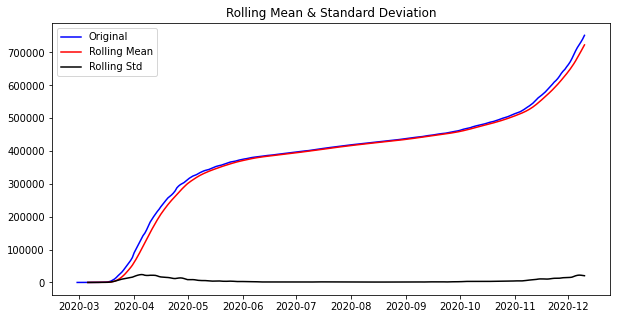

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -0.537286
p-value                          0.884533
#Lags Used                      10.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64


In [19]:
test_stationarity(df_nyc.NYC_Cases)

**Standard deviation looks good in terms of stationarity but Mean needs allot of work and ofcourse the for the DF test we fail to reject the null hypothesis that the data is not stationary**

#### Non-Cumulative Data

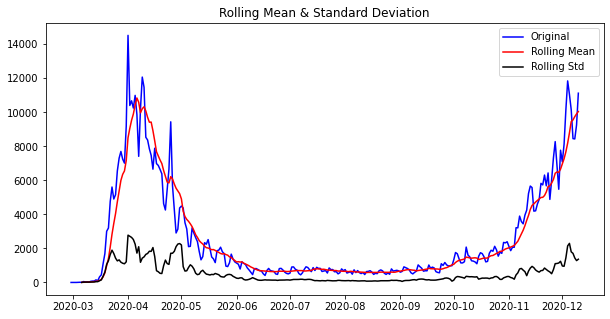

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -2.237773
p-value                          0.192823
#Lags Used                       9.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


In [20]:
test_stationarity(df_nyc.NYC_New)

Even the Non-Cumulative data (Essentially equivalent to the cumulative data differenced once) needs work!

***Considering that, I will Try transforming the data to bring the mean down.***

**Will transform and build model on the Non-Cumulative Data**

Building/Reducing Block

In [21]:
ts=df_nyc[['NYC_New']]
ts

NYC_New
Date               
2020-02-29      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      1.0
2020-03-04      9.0
...             ...
2020-12-06  10151.0
2020-12-07   8453.0
2020-12-08   8435.0
2020-12-09   9258.0
2020-12-10  11124.0

[286 rows x 1 columns]

#### Transformed Data

Here I will try out some transformations that penalize larger values, these spikes are going to give us a hard time when doing ARIMA

These transformation can be:
- log, 
- sqrt, 
- cube root etc

Basically penalizes larger values more than the smaller ones. 

##### sqrt

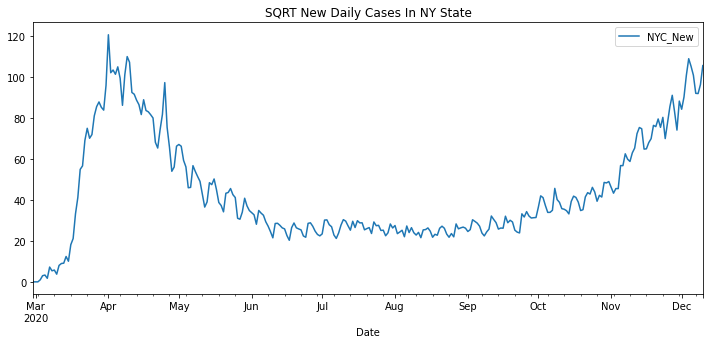

In [22]:
B=np.sqrt(ts)
B.plot(figsize=(12,5),title='SQRT New Daily Cases In NY State')
df_nyc['Sqrt_NYC_New']=B

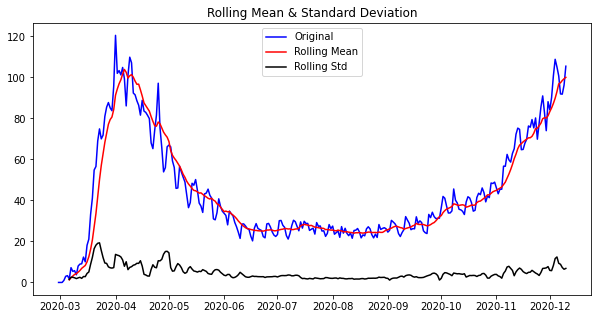

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -2.797030
p-value                          0.058699
#Lags Used                       9.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


In [23]:
test_stationarity(df_nyc.Sqrt_NYC_New)

close to 90% and looks less relativly less spikey! less check out the other

##### cube root

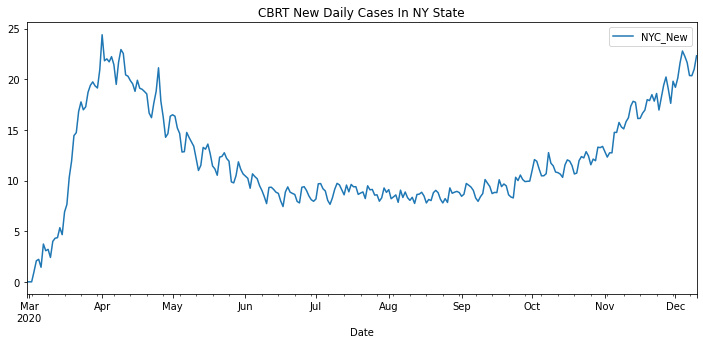

In [24]:
# try cube root
C=np.cbrt(ts)
C.plot(figsize=(12,5),title='CBRT New Daily Cases In NY State')
df_nyc['Cbrt_NYC_New']=C

# transform mback C**3

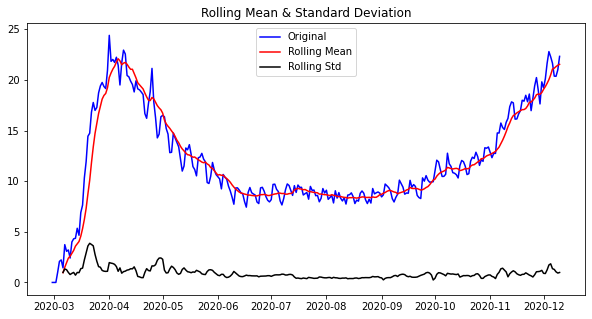

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -3.482900
p-value                          0.008437
#Lags Used                      15.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


In [25]:
test_stationarity(df_nyc.Cbrt_NYC_New)

This one looks like a keeper! 

##### log

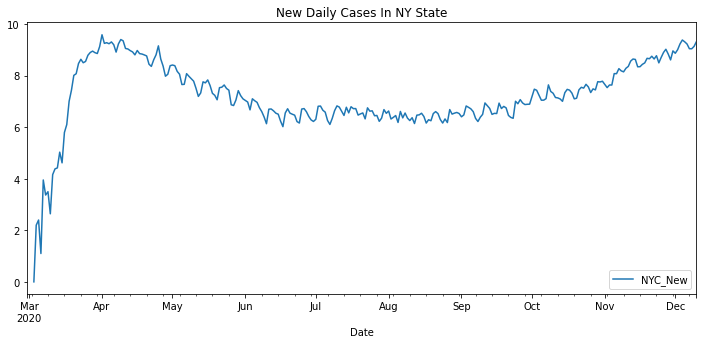

In [26]:
A=np.log(ts)
A.plot(figsize=(12,5),title='New Daily Cases In NY State')
df_nyc['Log_NYC_New']=A
df_nyc['Log_NYC_New'].replace([np.inf, -np.inf], np.nan, inplace=True)

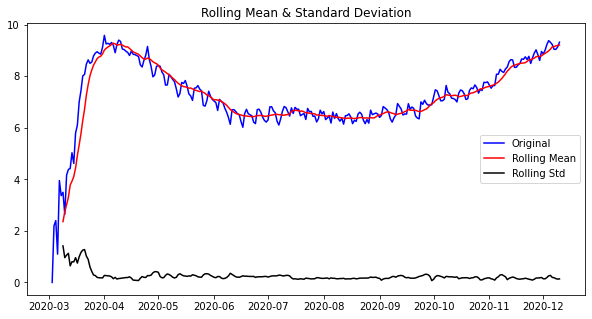

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -2.590250
p-value                          0.095029
#Lags Used                      16.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64


In [27]:
test_stationarity(df_nyc.Log_NYC_New.dropna())

Cube root was the winner therefore will go with that from this point on.

### Futher Stationizing and Analysis on the Selected Data Transformation

Cube root was the winner therefore will go with that from this point on.

In [28]:
# Will try thr cube root of the non cummulative dataset!
ts_df=df_nyc[['Cbrt_NYC_New']]
ts=ts_df['Cbrt_NYC_New']

#### Motivation


*I want to remove trend and seasonality to apply the following models:*
- AR, MA, ARMA will all be tested using
  - ARIMA
- SES: Simple Exponential Smoothing
  - This will also be looked at for removing trend 

*I will also try the following models without removing seasonality and/or trend as they do not requier stationary data:*
- SARIMA
- HWES
  - Linear 
  - Exponential




Assuming no seasonality:

I have the following options for estimating and removing trend:
- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model


> I decided to go with the Smoothing, yeilding the follwong options: 
> - Moving average: need to specify period, this makes the solution alittle hard coded
> - Exponentially Weighted moving average: weights are assigned to all the previous values with a decay factor. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations
 
For eliminating both trend and seasonality (these work best for high seasonality):
- Differencing 
- Decomposition (for data visualization as well)

### Estimating and removing trend

#### Moving average

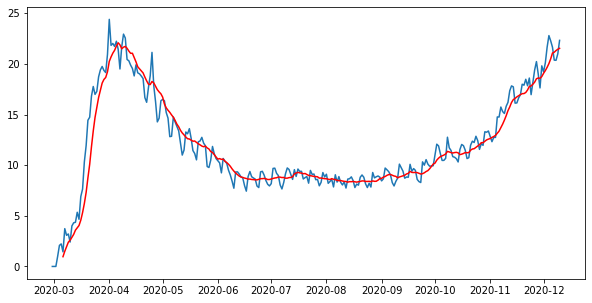

In [29]:
ts_moving_avg = ts.rolling(window=7).mean() # window of 7 therefore weekly mean incriments
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.plot(ts_moving_avg, color='red')

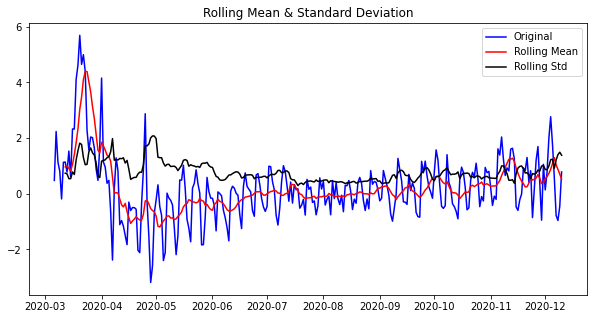

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -4.766306
p-value                          0.000063
#Lags Used                      15.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [30]:
# Subtract 
ts_moving_avg_diff = ts - ts_moving_avg
test_stationarity(ts_moving_avg_diff.dropna()) # drop first week  because we are rolling with a weekly window

- Visually the Mean is unstationary however the STD is looking great. if we did not transform the data they would have both been all over the place!
- For the DF test we reject the null hypothesis that the data is not stationary with over 99% confidence. 

> However, mean could be better. 

**Lets try the exponential weighted moving average EWMA**


#### EWMA exponential weighted moving average

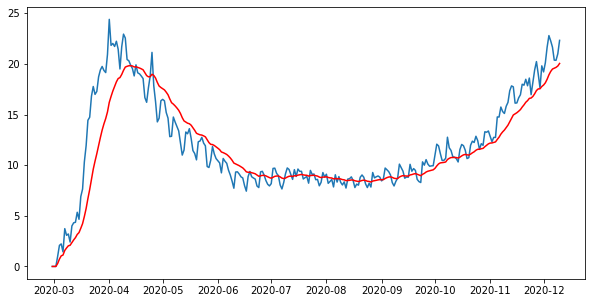

In [31]:
ts_expwighted_avg = ts.ewm(alpha=0.1).mean()    # alpha downtuned for simplicity and generlizability
#ts_expwighted_avg = ts.ewm(halflife=7).mean()
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.plot(ts_expwighted_avg, color='red')

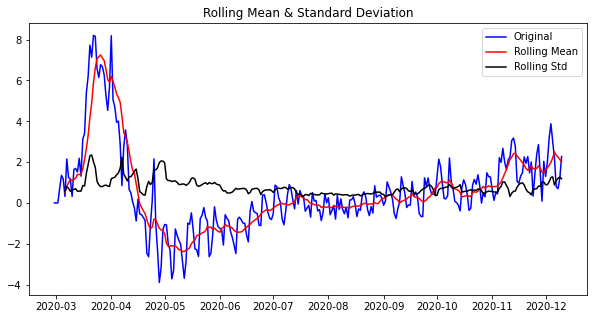

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -3.176469
p-value                          0.021388
#Lags Used                      15.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


In [32]:
ts_expwighted_avg_diff = ts - ts_expwighted_avg
test_stationarity(ts_expwighted_avg_diff)

In [33]:
#ts=ts_expwighted_avg_diff


I will avoid this one

### Trying out alternative options that eliminate both trend and seasonality

#### Differencing #1

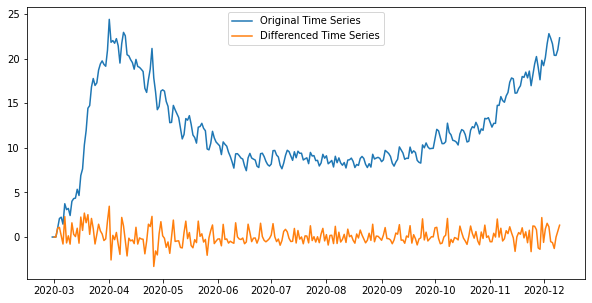

In [34]:
# differencing 1
ts_diff = ts.diff()
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original Time Series')
plt.plot(ts_diff, label='Differenced Time Series')
plt.legend()

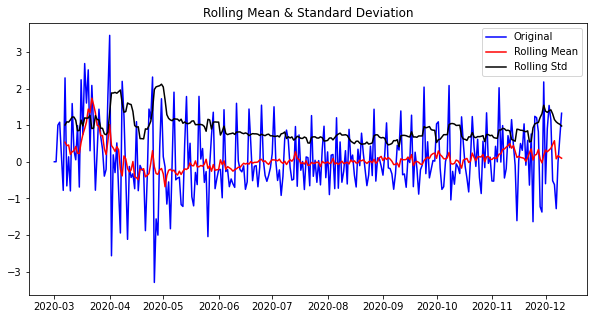

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                  -2.302709
p-value                          0.171096
#Lags Used                      14.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


In [35]:
test_stationarity(ts_diff.dropna()) #drop the first day as it will now be nan

better but still not great. 95% confident that the data is stationary, I want to get it closer to stationarity before proceding so I will difference it again

need to stabalize variance

#### Differencing #2

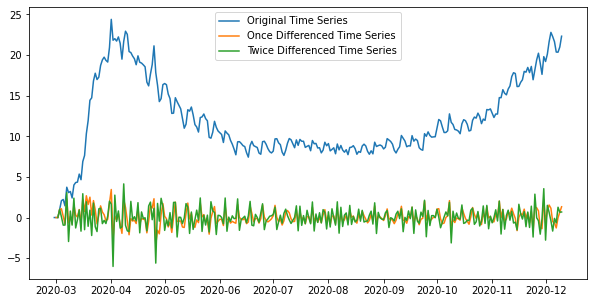

In [36]:
# differencing 2
ts_diff_diff = ts.diff().diff()
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original Time Series')
plt.plot(ts_diff, label='Once Differenced Time Series')
plt.plot(ts_diff_diff, label='Twice Differenced Time Series')
plt.legend()

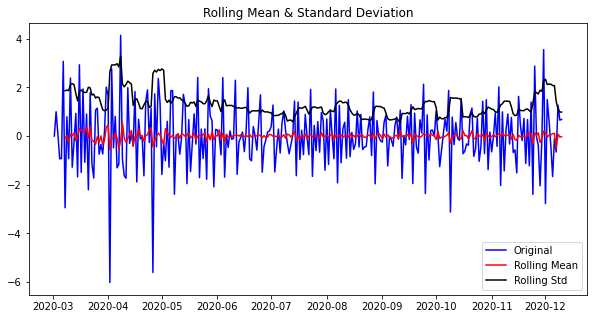

___________________________________ Results of Dickey-Fuller Test: ____________________________________
Test Statistic                -7.917502e+00
p-value                        3.801395e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [37]:
test_stationarity(ts_diff_diff.dropna()) #drop the first day as it will now be nan

Ok, This is as close as we can get. more that 99% confident using Dickey-Fuller and visual stationarity can be seen


In section 3 I will plot ACF and PACF Curves to more conclusivly tune the number of times to difference the data.

- Recall: I will plot three projections, 

> one that assumes worst case spread, **Higher Confidence Interval**

> another that assumes best case spread **Lower Confidence Interval**

> a third that models a base-case in between best and worst spread **The Actual Forcast**

### Split the data into test and train

In [38]:
old=df_nyc.loc[:,['NYC_Cases','NYC_New','Sqrt_NYC_New','Log_NYC_New']]
ts_df['Once_Differenced']=ts_diff
ts_df['Twice_Differenced']=ts_diff_diff
ts_df=pd.concat([old,ts_df],axis=1)
ts_df.dropna(inplace=True)

In [39]:
def train_test_split(split,NumDays):  
  global train
  global test
  if (NumDays==0): # split by days (no. of days to forcast), change from 0 if u wanna use days
    NumDays=round((1-split)*len(ts_df))
    start=ts_df.index[0]
    end=ts_df.index[len(ts_df)-1]
    mid=end-timedelta(days=NumDays)
    train=ts_df[start:mid]
    test=ts_df[mid:end]
  else:
    start=ts_df.index[0]
    end=ts_df.index[len(ts_df)-1]
    mid=end-timedelta(days=NumDays)
    train=ts_df[start:mid]
    test=ts_df[mid:end]

  return (train,test)

### Train Test Split Selection Example

In [40]:
train_test_split(0,14) # tuned based on last 14 days 

(            NYC_Cases  NYC_New  ...  Once_Differenced  Twice_Differenced
 Date                            ...                                     
 2020-03-03          1      1.0  ...          1.000000           1.000000
 2020-03-04         10      9.0  ...          1.080084           0.080084
 2020-03-05         21     11.0  ...          0.143896          -0.936188
 2020-03-06         24      3.0  ...         -0.781731          -0.925627
 2020-03-07         76     52.0  ...          2.290262           3.071992
 ...               ...      ...  ...               ...                ...
 2020-11-22     603360   5680.0  ...         -0.638624          -1.221924
 2020-11-23     609797   6437.0  ...          0.759823           1.398446
 2020-11-24     614679   4882.0  ...         -1.637896          -2.397719
 2020-11-25     620712   6033.0  ...          1.240290           2.878186
 2020-11-26     628024   7312.0  ...          1.204939          -0.035351
 
 [269 rows x 7 columns],
           

# **ARIMA 2-Week Forcast MANUAL TUNING**

**All Tuning Was done for using the split generated by function call: train_test_split(0.7,0)**

**2 Weeks was selected as that is my forcasting objective for this project**

Selection of ARIMA model parameters

- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.
  - exploratory data analysis has yeilded that we need to difference the data twice to become 99% confident in its stationarity therefore we will use d=2
    - we will also be checking to see if we have overdifferenced the data before finalizing the decision

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And 

- ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

#### Split the data accordingly

In [41]:
train_test_split(0,14) 
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

(            NYC_Cases  NYC_New  ...  Once_Differenced  Twice_Differenced
 Date                            ...                                     
 2020-03-03          1      1.0  ...          1.000000           1.000000
 2020-03-04         10      9.0  ...          1.080084           0.080084
 2020-03-05         21     11.0  ...          0.143896          -0.936188
 2020-03-06         24      3.0  ...         -0.781731          -0.925627
 2020-03-07         76     52.0  ...          2.290262           3.071992
 ...               ...      ...  ...               ...                ...
 2020-11-22     603360   5680.0  ...         -0.638624          -1.221924
 2020-11-23     609797   6437.0  ...          0.759823           1.398446
 2020-11-24     614679   4882.0  ...         -1.637896          -2.397719
 2020-11-25     620712   6033.0  ...          1.240290           2.878186
 2020-11-26     628024   7312.0  ...          1.204939          -0.035351
 
 [269 rows x 7 columns],
           

##### **Selecting d**

"So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series."

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

d=1 also gives the lower standard deviation

In [42]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

**We should tune on our training and assume we connot see the future!**

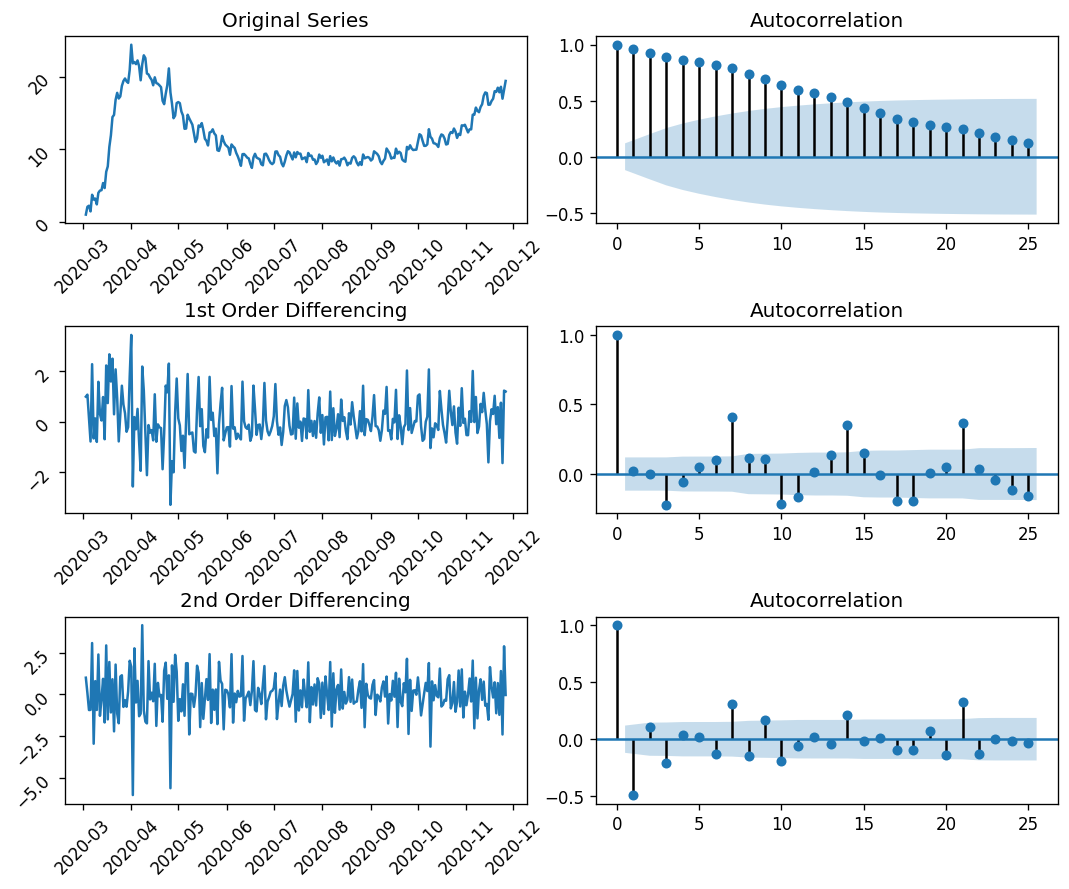

In [43]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Full Dataset

#A=ts_df.Cbrt_NYC_New
#B=ts_df.Once_Differenced
#C=ts_df.Twice_Differenced

# Training Sample

A=train.Cbrt_NYC_New
B=train.Once_Differenced
C=train.Twice_Differenced


fig, axs = plt.subplots(3, 2, sharex=False, )
fig.tight_layout(h_pad=4)

# Original Series in our case the Cubic of Non Cumulative!
axs[0, 0].plot(A); axs[0, 0].set_title('Original Series') ; axs[0, 0].tick_params(labelrotation=45)                                     
plot_acf(A, ax=axs[0, 1]) 

# 1st Differencing
axs[1, 0].plot(B); axs[1, 0].set_title('1st Order Differencing') ; axs[1, 0].tick_params(labelrotation=45)               
plot_acf(B, ax=axs[1, 1]) 

# 2nd Differencing
axs[2, 0].plot(C); axs[2, 0].set_title('2nd Order Differencing') ; axs[2, 0].tick_params(labelrotation=45)               
plot_acf(C, ax=axs[2, 1])

plt.show()

Large overshoot into negative autocorelation teritory is indication that the data may be over-differenced with second order differencing. as seen earlier, the second differenced data set has slighty higher variance therefore should stick to d=1. (simpler model yet less stationary)





#####**Selecting AR term**

Need to look at partial correlation

"Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

Good. Now, how to find the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot."

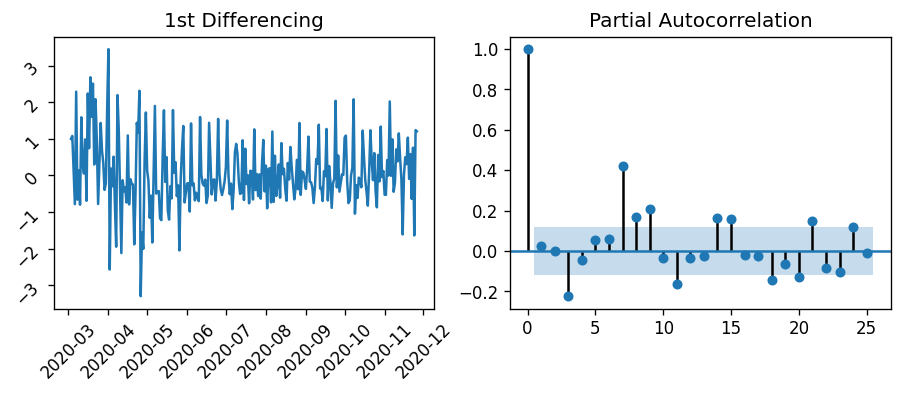

In [44]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(B); axes[0].set_title('1st Differencing'); axes[0].tick_params(labelrotation=45)
#axes[1].set(ylim=(-1.25,1.25))
plot_pacf(B, ax=axes[1])

plt.show()

the overshooting makes it very hard to decide. I am going to go on the conzervative side and oversimplify the model. looks like the first cross occurs between 0 and 1 so I will choose P=1


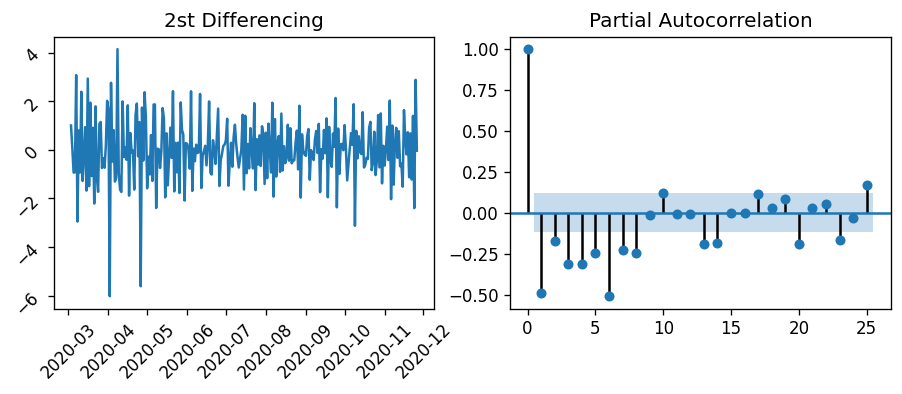

In [45]:
# Just to see with the second 

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(C); axes[0].set_title('2st Differencing'); axes[0].tick_params(labelrotation=45)
#axes[1].set(ylim=(-1.25,1.25))
plot_pacf(C, ax=axes[1])

plt.show()

we overshoot big time! would have to go with P=10 for this one if we edn up using it.

##### **Selecting the MA term**

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

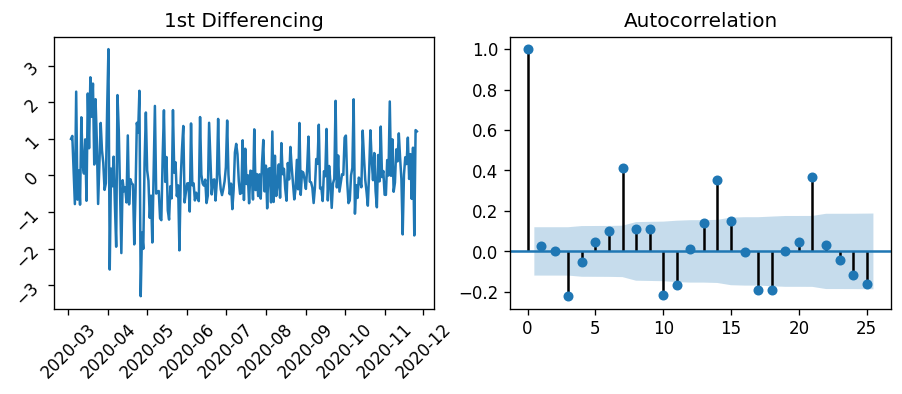

In [46]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(B); axes[0].set_title('1st Differencing'); axes[0].tick_params(labelrotation=45)
plot_acf(B, ax=axes[1])

plt.show()

I am going to go on the conzervative side and oversimplify the model. looks like the first cross occurs between 0 and 1 so I will choose Q=1

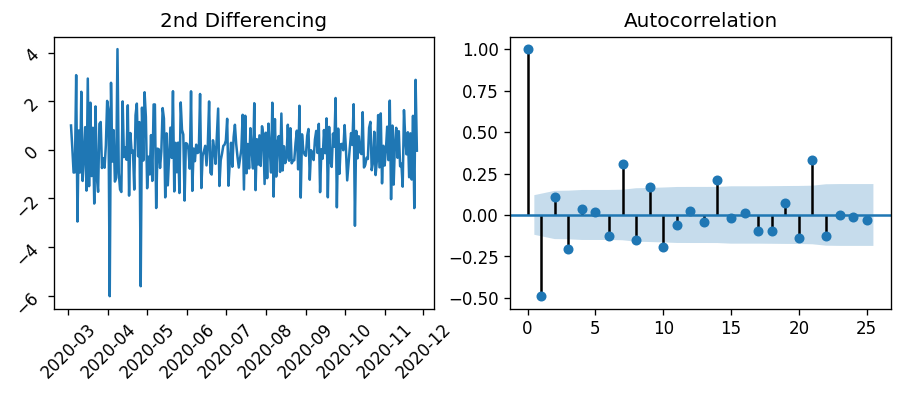

In [47]:
# Just checking on it with 2nd differencing 

import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(C); axes[0].set_title('2nd Differencing'); axes[0].tick_params(labelrotation=45)
plot_acf(C, ax=axes[1])

plt.show()

Overshoots big but stabalized and stays tight afterwards. will likeley experiment with this one so lets use Q=3 when we test out D=2

####A More Intutive way to read the plots for selection of ARIMA Params

In [48]:
def ACF_PACF_LINE(DATA):
  lag_acf = acf(DATA, fft=False)
  lag_pacf = pacf(DATA, method='ols')

  plt.figure(figsize=(20,5))
  #Plot ACF: 
  plt.subplot(121) 
  plt.plot(lag_acf)

  plt.xlim((0,20))
  plt.xticks(np.arange(0, 40, step=1))
  plt.grid()

  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(DATA)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(DATA)),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  #Plot PACF:
  plt.subplot(122)
  plt.plot(lag_pacf)

  plt.xlim((0,10))
  plt.xticks(np.arange(0, 40, step=1))
  plt.grid()

  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(DATA)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(DATA)),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')
  plt.tight_layout()
  return 

##### 1 times differenced 

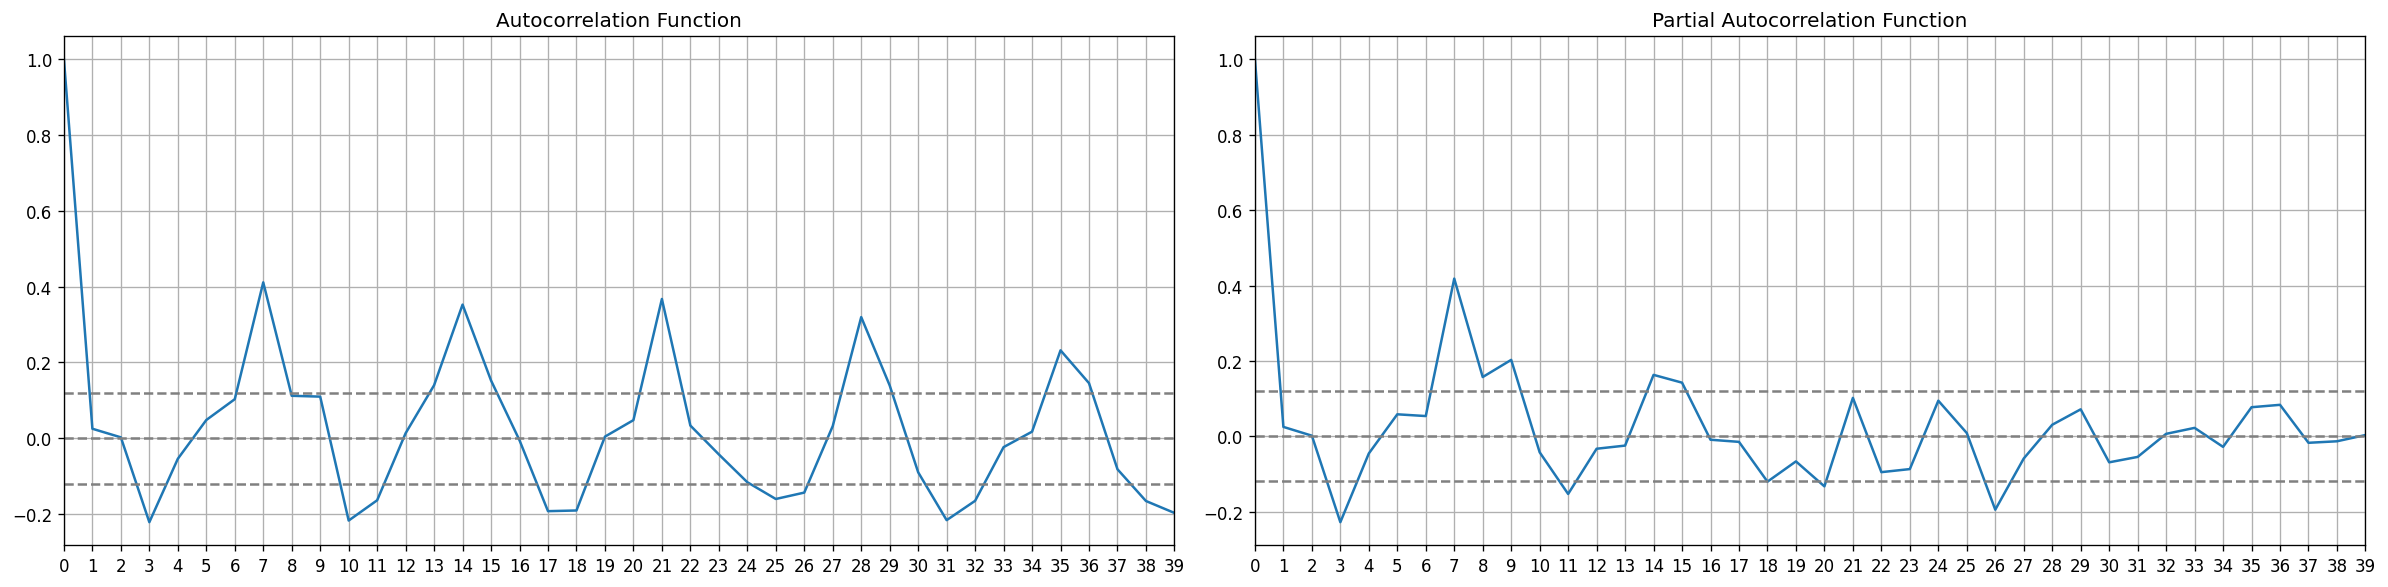

In [49]:
ACF_PACF_LINE(B)

D=1

Q=1

P=1 OR 8 OR 9

##### 2 Times Differenced 

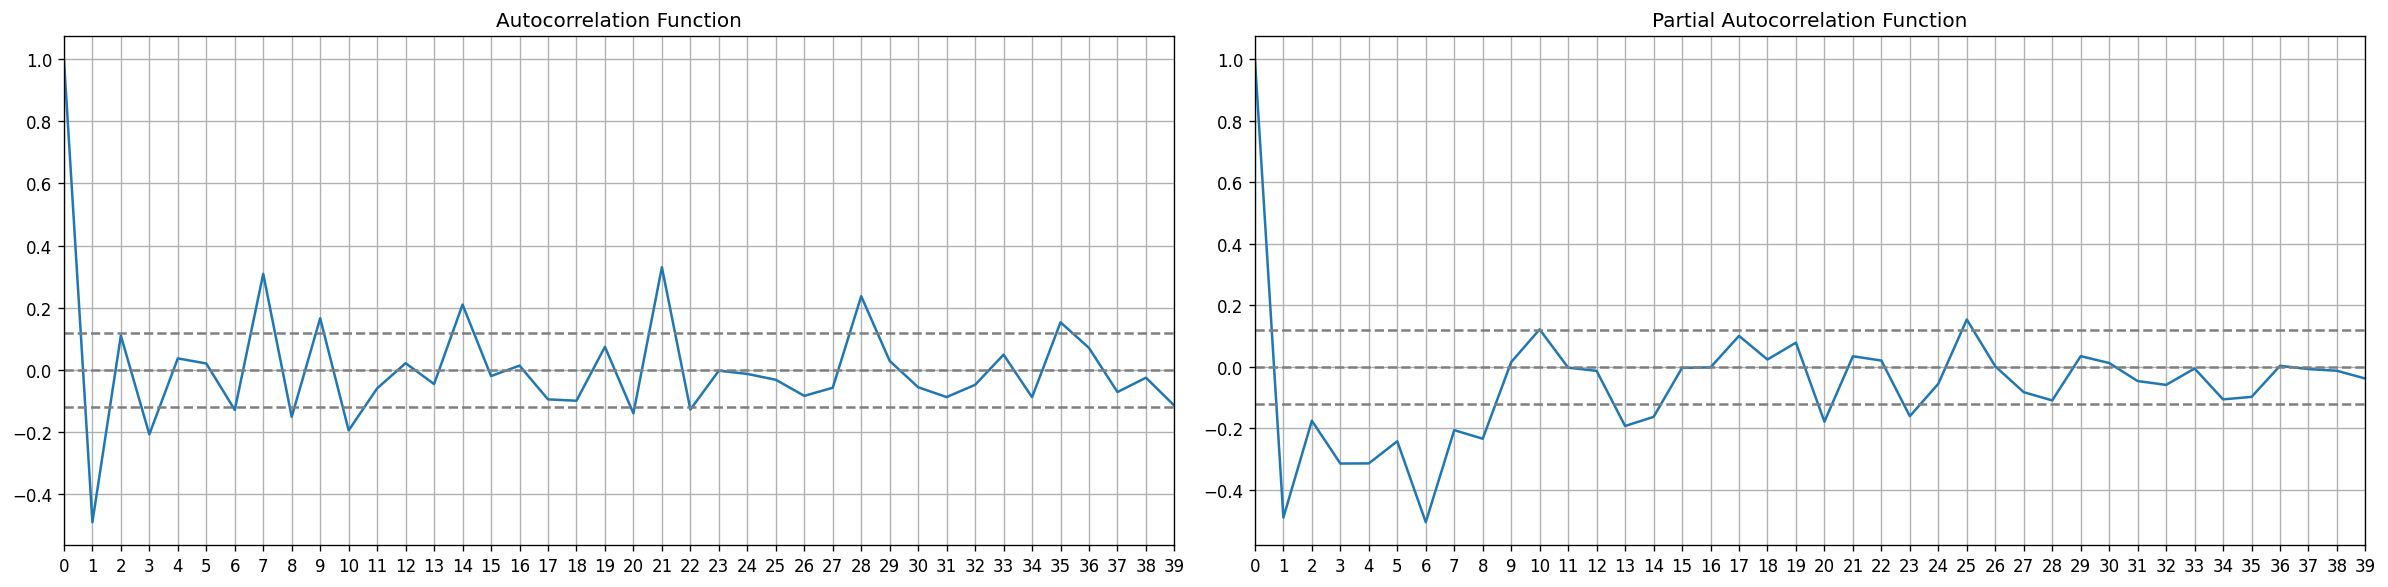

In [50]:
ACF_PACF_LINE(C)

D=2

Q=1 OR 2

P=7 OR 8

Manual reconstruction of confidence interval

If a 95% confidence interval can be constructed using the normal distribution (as it was when the population standard deviation was known), the confidence interval would run from xbar-1.96(s/Sqrt[n]) to xbar+1.96(s/Sqrt[n]).

 look for patterns of (partial) autocorrelation coefficients that are large.

 A rough guide to how large is "large" is to pay attention to any coefficient plotted with a spike extending beyond the two bands shown in the charts.

"these bands enclose the middle 95% of a standard Normal distribution, implying that if the coefficients were independent -- which they are not -- then a white noise process would have, on average, 95% of its spikes inside the bands.)"
https://stats.stackexchange.com/questions/411851/how-to-determine-p-and-q-in-my-arima-model-from-these-acf-and-pacf-plots

first entry 
P=1, Q=1
second entry 
P=3, Q=3

Try both








### Apply ARIMA

In [51]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

MODELS TO TEST

RECALL: order=(p,d,q)

These are some combinations that seem viable from my analysis of the ACF and PCF plots!

D=0:
- ARMA Q=26, P=2 
  - (2,0,26)
- ARMA Q=26, P=9
  - (9,0,26)
- AR Q=26, P=0
  - (0,0,26)
- MA Q=0, P=2
  - (2,0,0)
- MA Q=0, P=9
  - (9,0,0)


D=1:
- ARIMA Q=1, P=1 
  - (1,1,1)
- ARIMA Q=1, P=8
  - (8,1,1)


D=2:
- ARIMA Q=1, P=7 
  - (7,2,1)
- ARIMA Q=2, P=7 
  - (7,2,2)






In [52]:
from statsmodels.tsa.arima_model import ARIMA
def TEST_MODEL(ORDER, TRAIN):
  
  print('______________________for Order',ORDER,'_______________________________\n')
  print('_____________Build Model On training Data & Show Summary_______________')
  # 1,1,1 ARIMA Model
  model = ARIMA(TRAIN, order=ORDER)  
  model_fit = model.fit(maziter=10000)
  print(model_fit.summary())

  print('_________________________Plot residual errors__________________________')
  # Plot residual errors
  residuals = pd.DataFrame(model_fit.resid)
  fig, ax = plt.subplots(1,2)
  residuals.plot(title="Residuals", ax=ax[0])
  residuals.plot(kind='kde', title='Density', ax=ax[1])
  plt.show()

  print('_______________________Model Training Behaviour________________________')
  # Actual vs Fitted
  model_fit.plot_predict(dynamic=False)
  plt.show()
  #when you set dynamic=False the in-sample lagged values are used for prediction.
  #That is, the model gets trained up until the previous value to make the next prediction. 
  #This can make the fitted forecast and actuals look artificially good.'''
  return

In [53]:
def BUILD_FORCAST(ORDER,TRAIN,TEST):
  print('______________________for Order',ORDER,'Forcast_____________________\n')
  print('______________________Build The Model & Forcast________________________')

  model = ARIMA(TRAIN, order=ORDER) 
  fitted = model.fit(disp=-1)  

  # Forecast
  fc, se, conf = fitted.forecast(steps=len(TEST),exog=None, alpha=0.05)  # 95% conf

  # Make as pandas series

  idx=TEST.index

  se_series = pd.Series(se, index=idx)
  fc_series = pd.Series(fc, index=idx)
  lower_series = pd.Series(conf[:, 0], index=idx)   # Best Case
  upper_series = pd.Series(conf[:, 1], index=idx)   # Worst Case

  # Plot
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(TRAIN, label='training')
  plt.plot(TEST, label='actual')
  plt.plot(fc_series, label='forecast')
  #plt.plot(se_series, label='Standard Error')
  plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.15)
  plt.title('Forecast vs Actuals')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()

  mse=np.mean((fc - TEST)**2) # MSE
  print('mse is', mse)
  rmse = np.mean((fc - TEST)**2)**.5  # RMSE
  print('rmse is',rmse)
  mape = np.mean(np.abs(fc - TEST)/np.abs(TEST))  # MAPE
  print('mape is',mape)

  return (rmse, mape, mse, fc_series,lower_series,upper_series)

#### Model Selection

______________________for Order (2, 0, 26) _______________________________

_____________Build Model On training Data & Show Summary_______________
____________________________\\\\\\\\\\\The Above Failed/////////////////////////________________________________
______________________for Order (9, 0, 26) _______________________________

_____________Build Model On training Data & Show Summary_______________
____________________________\\\\\\\\\\\The Above Failed/////////////////////////________________________________
______________________for Order (2, 0, 0) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Cbrt_NYC_New   No. Observations:                  269
Model:                     ARMA(2, 0)   Log Likelihood                -363.478
Method:                       css-mle   S.D. of innovations              0.928
Date:                Thu, 29 Apr 2021   AIC                            734.956
Time:                        01:15:37   BIC                            749.335
Sample:                    03-03-2020   HQIC                           740.730
                         - 11-26-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.1621      3.460      3.226      0.001       4.381      17.944
ar.L1.Cbrt_NYC_New     1.0212      0.061     16.697      0.000       0.901       1.141
ar.L2.Cbrt_NYC_New  

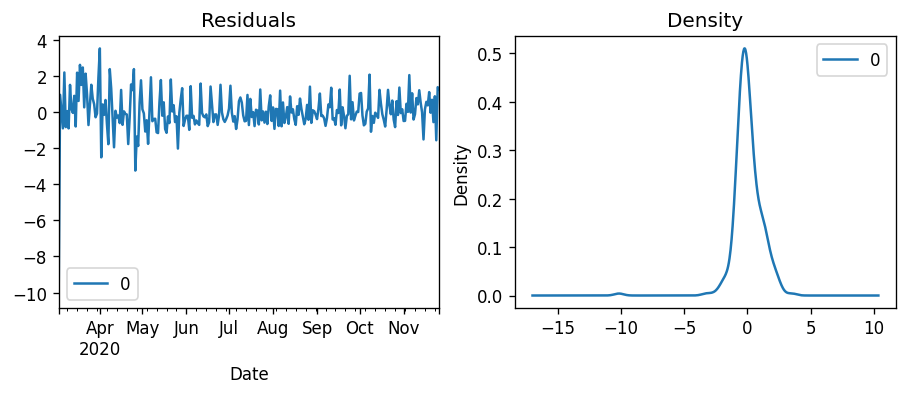

_______________________Model Training Behaviour________________________


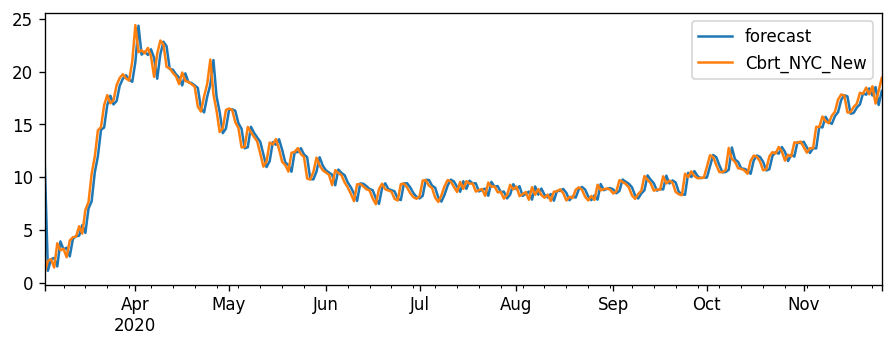

______________________for Order (9, 0, 0) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Cbrt_NYC_New   No. Observations:                  269
Model:                     ARMA(9, 0)   Log Likelihood                -324.209
Method:                       css-mle   S.D. of innovations              0.799
Date:                Thu, 29 Apr 2021   AIC                            670.418
Time:                        01:15:41   BIC                            709.960
Sample:                    03-03-2020   HQIC                           686.298
                         - 11-26-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.4926      1.740      6.604      0.000       8.082      14.903
ar.L1.Cbrt_NYC_New     0.9081      0.060     15.090      0.000       0.790       1.026
ar.L2.Cbrt_NYC_New  

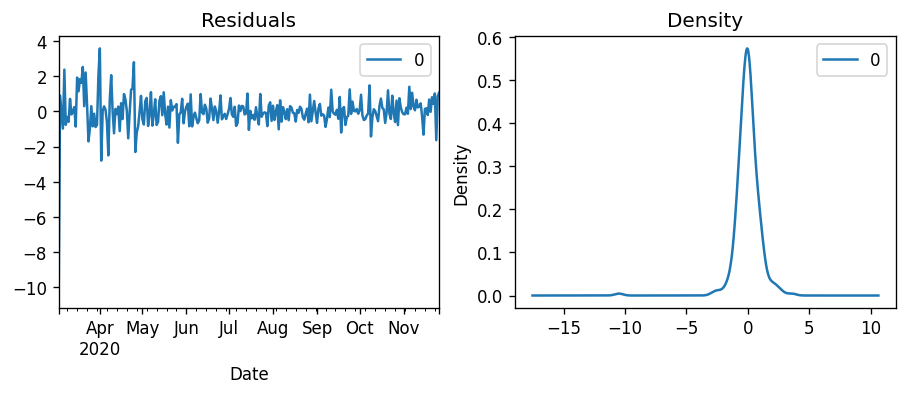

_______________________Model Training Behaviour________________________


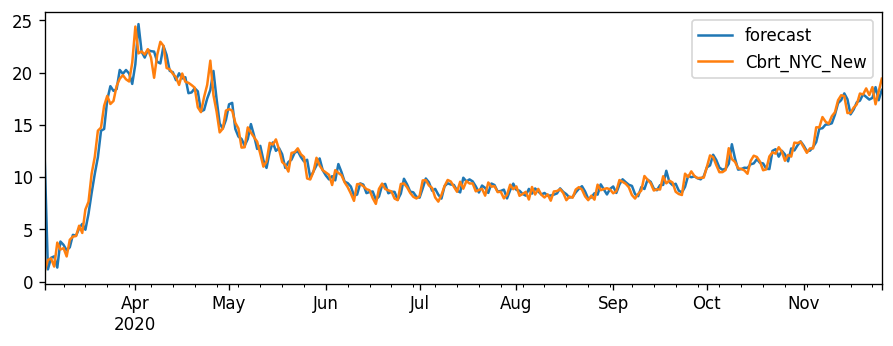

______________________for Order (1, 1, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________
                             ARIMA Model Results                              
Dep. Variable:         D.Cbrt_NYC_New   No. Observations:                  268
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -360.072
Method:                       css-mle   S.D. of innovations              0.927
Date:                Thu, 29 Apr 2021   AIC                            728.144
Time:                        01:15:44   BIC                            742.508
Sample:                    03-04-2020   HQIC                           733.913
                         - 11-26-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0682      0.054 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


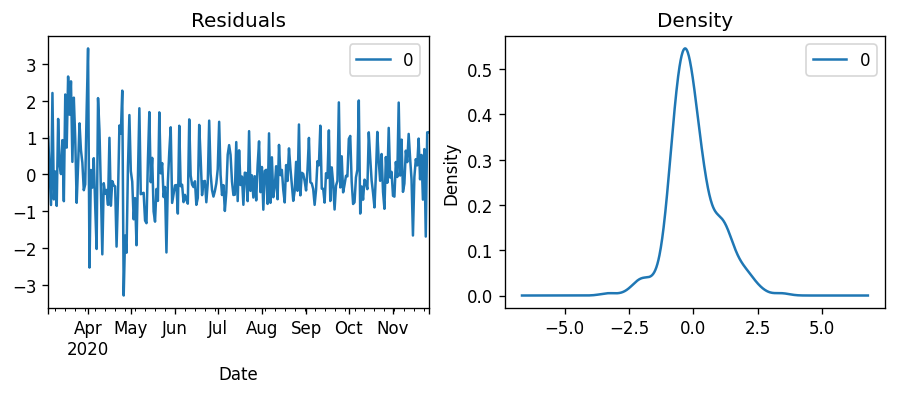

_______________________Model Training Behaviour________________________


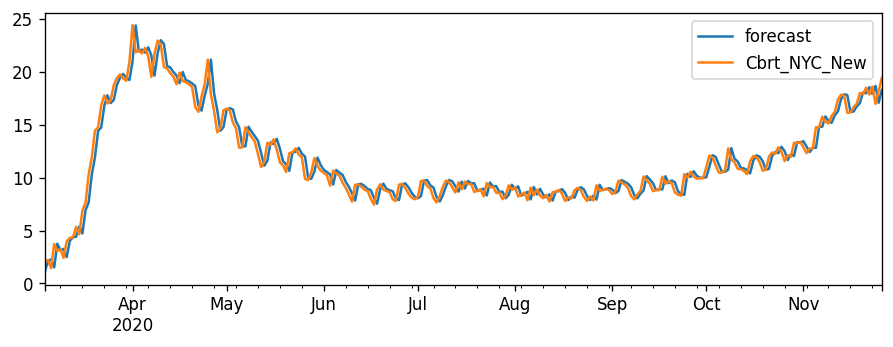

______________________for Order (8, 1, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Cbrt_NYC_New   No. Observations:                  268
Model:                 ARIMA(8, 1, 1)   Log Likelihood                -320.941
Method:                       css-mle   S.D. of innovations              0.799
Date:                Thu, 29 Apr 2021   AIC                            663.883
Time:                        01:15:46   BIC                            703.384
Sample:                    03-04-2020   HQIC                           679.748
                         - 11-26-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0838      0.099      0.850      0.396      -0.110       0.277
ar.L1.D.Cbrt_NYC_New     0.2890      0.172      1.683      0.092      -0.047       0.625
ar.L2.D.Cbrt

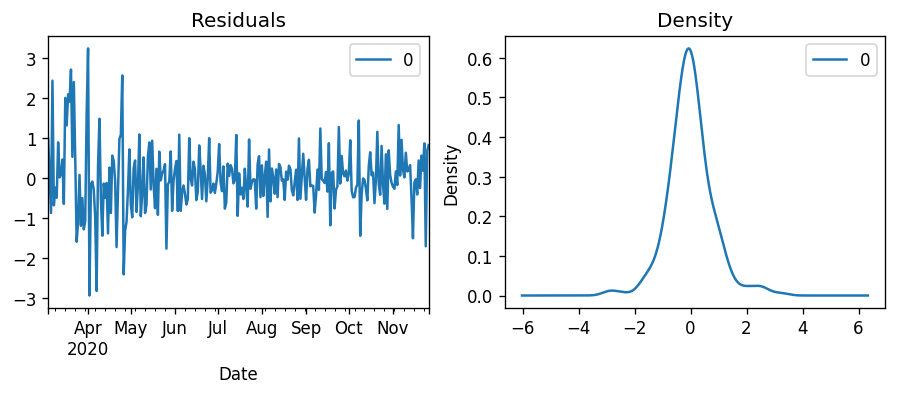

_______________________Model Training Behaviour________________________


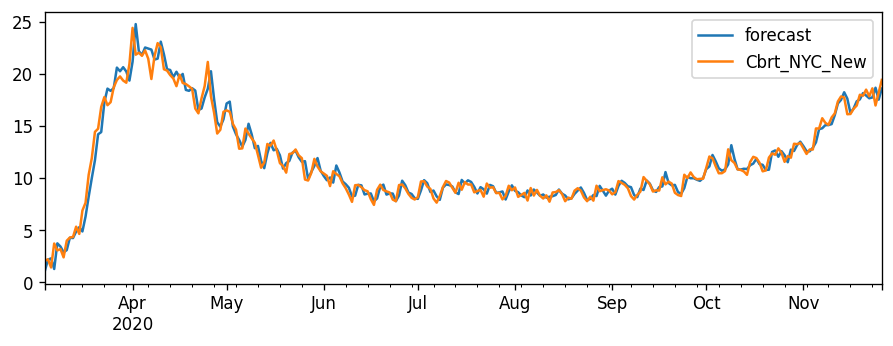

______________________for Order (7, 2, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D2.Cbrt_NYC_New   No. Observations:                  267
Model:                 ARIMA(7, 2, 1)   Log Likelihood                -324.611
Method:                       css-mle   S.D. of innovations              0.811
Date:                Thu, 29 Apr 2021   AIC                            669.223
Time:                        01:15:49   BIC                            705.095
Sample:                    03-05-2020   HQIC                           683.632
                         - 11-26-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0003      0.006     -0.054      0.957      -0.012       0.011
ar.L1.D2.Cbrt_NYC_New    -0.5992      0.169     -3.543      0.000      -0.931      -0.268
ar.L2.D2

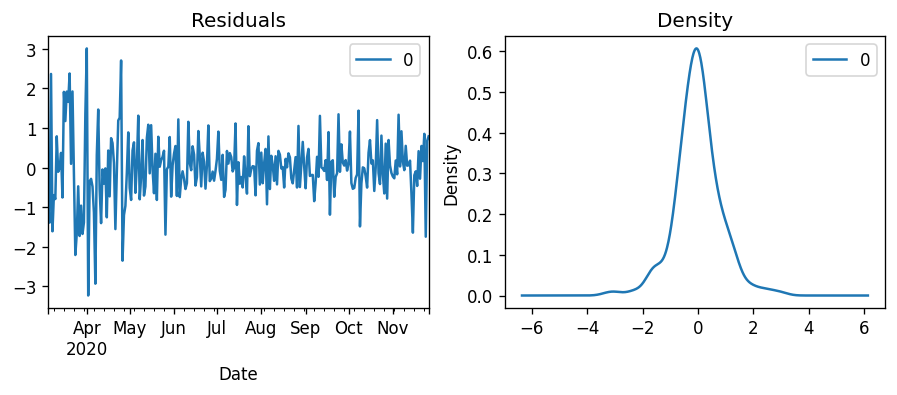

_______________________Model Training Behaviour________________________


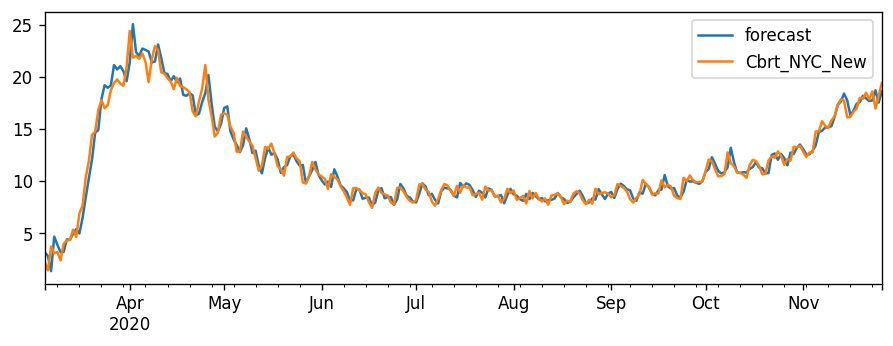

______________________for Order (7, 2, 2) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D2.Cbrt_NYC_New   No. Observations:                  267
Model:                 ARIMA(7, 2, 2)   Log Likelihood                -324.092
Method:                       css-mle   S.D. of innovations              0.809
Date:                Thu, 29 Apr 2021   AIC                            670.183
Time:                        01:15:54   BIC                            709.643
Sample:                    03-05-2020   HQIC                           686.034
                         - 11-26-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0003      0.006     -0.059      0.953      -0.012       0.011
ar.L1.D2.Cbrt_NYC_New    -1.1419      0.379     -3.015      0.003      -1.884      -0.400
ar.L2.D2

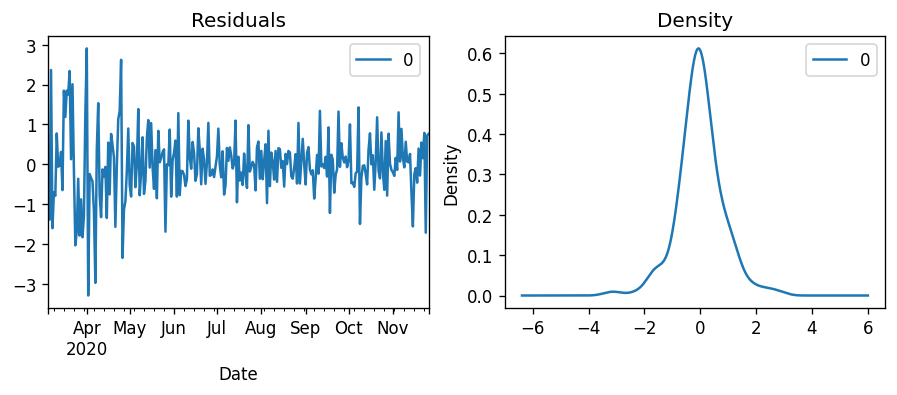

_______________________Model Training Behaviour________________________


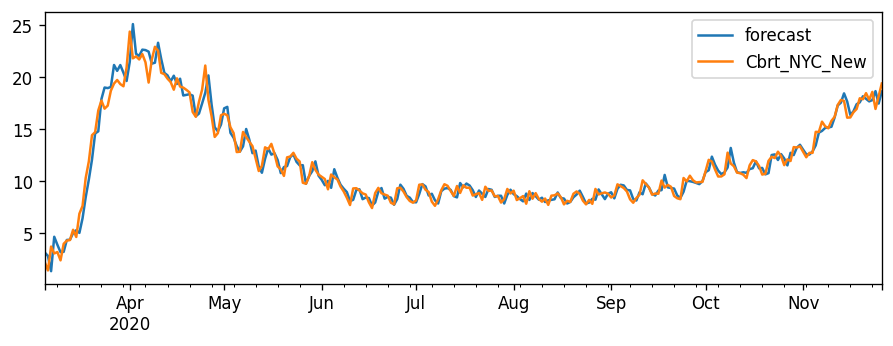

In [54]:
# Figure out which of these order the model can acctually run on

ARMA_A=(2,0,26)
ARMA_B=(9,0,26)
AR=(0,0,26)
MA_A=(2,0,0)
MA_B=(9,0,0)

ARIMA_1_A=(1,1,1)
ARIMA_1_B=(8,1,1)

ARIMA_2_A=(7,2,1)
ARIMA_2_B=(7,2,2)

ORDERS=[ARMA_A, ARMA_B, MA_A, MA_B, ARIMA_1_A, ARIMA_1_B, ARIMA_2_A, ARIMA_2_B] # AR was removed as it takes 15 years to run

Passed=ORDERS.copy()
count=[]
i=0
for ORDER in ORDERS:
  i=i+1
  try:
    TEST_MODEL(ORDER, A_train)
  except:
    print('____________________________\\\\\\\\\\\\\\\\\\\\\The Above Failed/////////////////////////________________________________')
    Passed.remove(ORDER)
    count.append(i)
    continue

In [55]:
count # index of rejected ones

[1, 2]

Model seems to fail for ARMA_A, ARMA_B, AR Orders 

---

While the following passed 

In [56]:
Passed # the ones that made it through!

[(2, 0, 0), (9, 0, 0), (1, 1, 1), (8, 1, 1), (7, 2, 1), (7, 2, 2)]

vs 

In [57]:
ORDERS

[(2, 0, 26),
 (9, 0, 26),
 (2, 0, 0),
 (9, 0, 0),
 (1, 1, 1),
 (8, 1, 1),
 (7, 2, 1),
 (7, 2, 2)]

top 3 failed to pass

#### Model Implementation (Like GridSearch)

______________________for Order (2, 0, 0) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


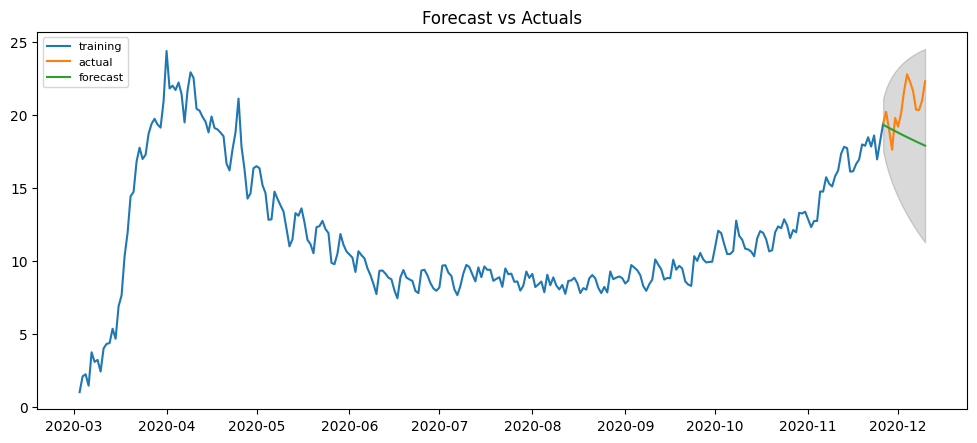

mse is 6.581601670617785
rmse is 2.565463246787563
mape is 0.09964481663471797
______________________for Order (9, 0, 0) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


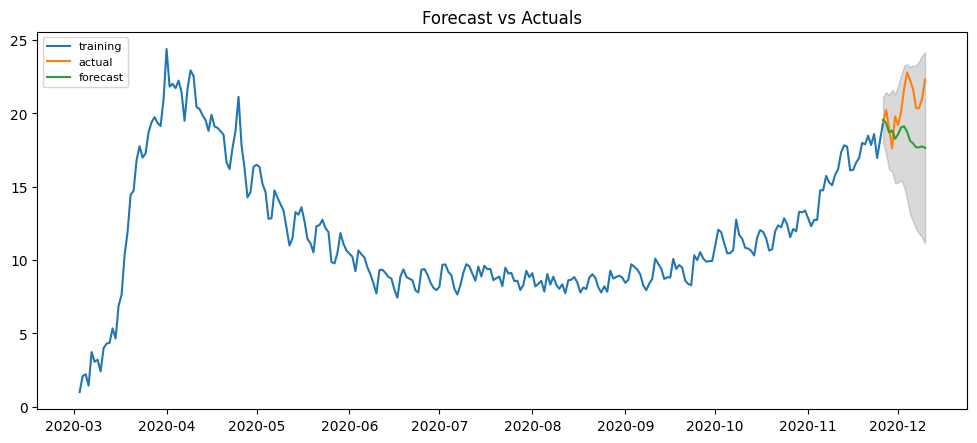

mse is 7.093390646101026
rmse is 2.6633420069718845
mape is 0.10508868324983216
______________________for Order (1, 1, 1) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


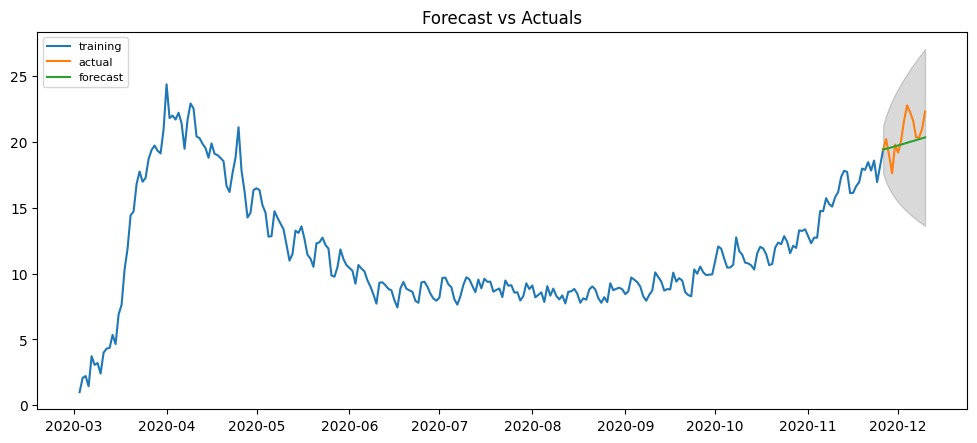

mse is 1.8894322998073423
rmse is 1.3745662224161272
mape is 0.04982575996712566
______________________for Order (8, 1, 1) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


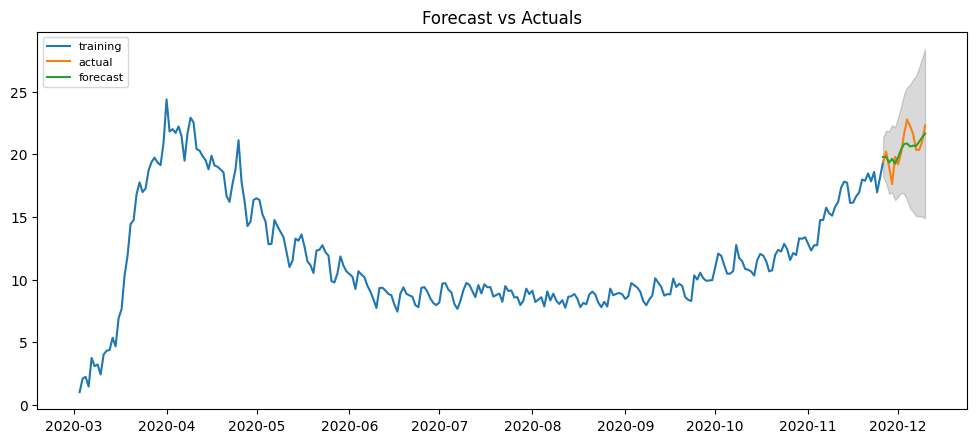

mse is 0.9515498517295512
rmse is 0.9754741676382575
mape is 0.03855866636382902
______________________for Order (7, 2, 1) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


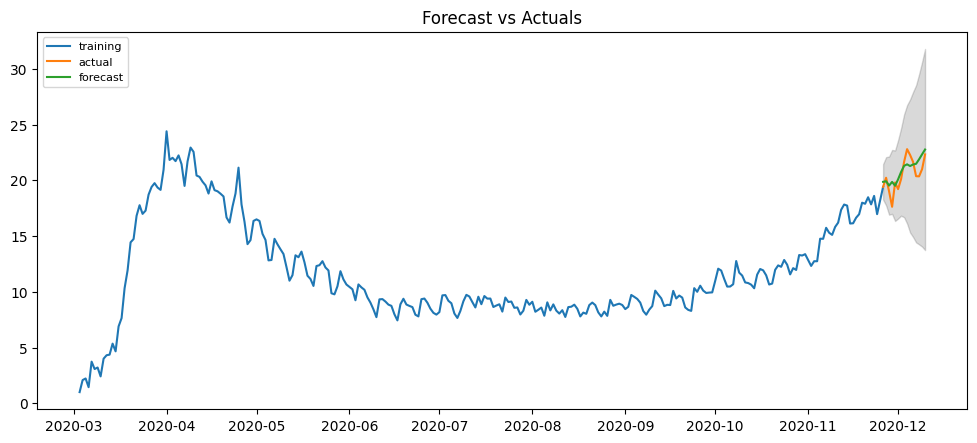

mse is 1.024626049896751
rmse is 1.0122381389261872
mape is 0.041934453949525
______________________for Order (7, 2, 2) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


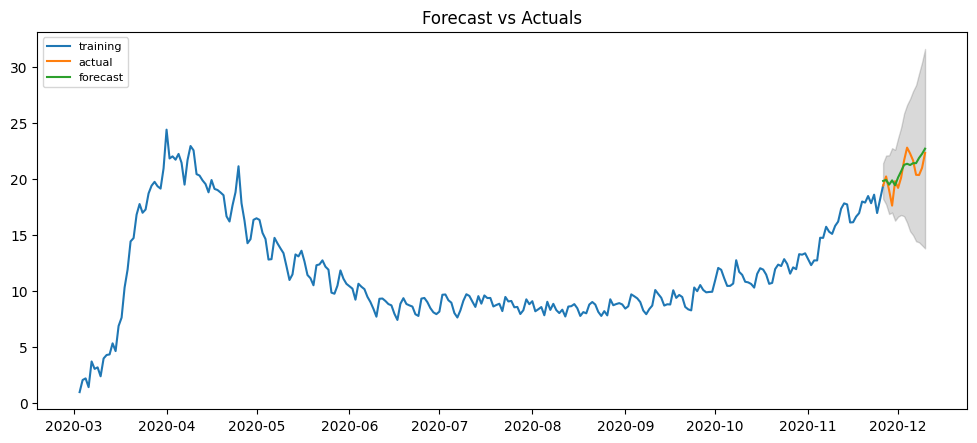

mse is 1.0236381408715514
rmse is 1.0117500387306892
mape is 0.04179832386201687


In [58]:
# implement all of them and compare results
rmse=[]
mse=[]
mape=[]
count=[]
i=0
for ORDER in Passed:
  i=i+1
  try:
    r,m,b =BUILD_FORCAST(ORDER,A_train,A_test)[0:3]
    rmse.append(r)
    mape.append(m)
    mse.append(b)
  except:
    Passed.remove(ORDER)
    count.append(i)
    continue

In [59]:
Results=pd.DataFrame(data={'RMSE': rmse, 'MAPE': mape,'MSE': mse}, index=Passed).sort_values(by='MSE')
Results

RMSE      MAPE       MSE
(8, 1, 1)  0.975474  0.038559  0.951550
(7, 2, 2)  1.011750  0.041798  1.023638
(7, 2, 1)  1.012238  0.041934  1.024626
(1, 1, 1)  1.374566  0.049826  1.889432
(2, 0, 0)  2.565463  0.099645  6.581602
(9, 0, 0)  2.663342  0.105089  7.093391

Winner on a MSE Scoring Basis

______________________for Order (8, 1, 1) Forcast_____________________

______________________Build The Model & Forcast________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


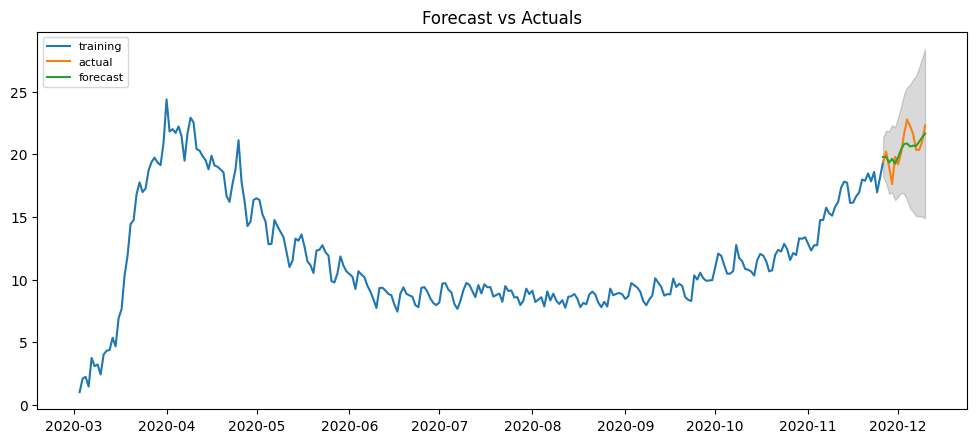

mse is 0.9515498517295512
rmse is 0.9754741676382575
mape is 0.03855866636382902


(0.9754741676382575, 0.03855866636382902, 0.9515498517295512, Date
 2020-11-26    19.798880
 2020-11-27    19.798176
 2020-11-28    19.356005
 2020-11-29    19.649044
 2020-11-30    19.259177
 2020-12-01    19.779177
 2020-12-02    20.383560
 2020-12-03    20.841163
 2020-12-04    20.873255
 2020-12-05    20.633901
 2020-12-06    20.698535
 2020-12-07    20.683890
 2020-12-08    21.003343
 2020-12-09    21.354320
 2020-12-10    21.672188
 dtype: float64, Date
 2020-11-26    18.233708
 2020-11-27    17.699083
 2020-11-28    16.864586
 2020-11-29    16.957737
 2020-11-30    16.346191
 2020-12-01    16.608485
 2020-12-02    16.929645
 2020-12-03    16.857603
 2020-12-04    16.375719
 2020-12-05    15.679469
 2020-12-06    15.412365
 2020-12-07    15.079947
 2020-12-08    15.058468
 2020-12-09    15.037060
 2020-12-10    14.911091
 dtype: float64, Date
 2020-11-26    21.364053
 2020-11-27    21.897268
 2020-11-28    21.847425
 2020-11-29    22.340352
 2020-11-30    22.172162
 2020-12-01   

In [60]:
BUILD_FORCAST(Results.index[0],A_train,A_test)

# **Auto ARIMA for Variable Split/Forcast**



Selection of ARIMA model parameters

- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And 

- ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

#### Split the data accordingly

In [61]:
train_test_split(0,14) 
print('')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [62]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

### Trianing 

stepwise : bool, optional (default=True)
    Whether to use the stepwise algorithm outlined in Hyndman and Khandakar
    (2008) to identify the optimal model parameters. The stepwise algorithm
    can be significantly faster than fitting all (or a random subset
    of) hyper-parameter combinations and is less likely to over-fit
    the model.

d : int, optional (default=None)
    The order of first-differencing. If None (by default), the value
    will automatically be selected based on the results of the test
    (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented
    Dickey-Fuller or the Phillips–Perron test will be conducted to find
    the most probable value). Must be a positive integer or None. Note
    that if d is None, the runtime could be significantly longer.

out_of_sample_size : int, optional (default=0)
    The ARIMA class can fit only a portion of the data if specified,
    in order to retain an "out of bag" sample score. This is the
    number of examples from the tail of the time series to hold out
    and use as validation examples. The model will not be fit on these
    samples, but the observations will be added into the model's endog
    and exog arrays so that future forecast values originate from the
    end of the endogenous vector.

scoring : str, optional (default='mse')
    If performing validation (i.e., if out_of_sample_size > 0), the
    metric to use for scoring the out-of-sample data. One of {'mse', 'mae'}

scoring_args : dict, optional (default=None)
    A dictionary of key-word arguments to be passed to the scoring
    metric.

In [63]:
!pip install pmdarima

In [64]:
from pmdarima import auto_arima

fitted_model = auto_arima(A_train,
                           max_p=8, max_q=8, max_d=3,d=None,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, information_criterion='oob')
print(fitted_model)

#fitted=model.fit(A_train) # this is kind of redundant

#(2, 1, 2); AIC=713.761, BIC=735.307, Fit time=0.273 seconds 
#mse is 3.0128043319182636
#rmse is 1.7357431641571468
#mape is 0.0658128538835542

#(3, 1, 2); AIC=708.049, BIC=733.186, Fit time=0.572 seconds W/O information_criterion='oob')
#mse is 3.097583513123571
#rmse is 1.759995316222055
#mape is 0.06727661185492886

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=678.370, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=724.352, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=726.233, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=726.234, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=723.818, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=729.054, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=728.822, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=730.762, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.233, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=719.298, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=718.289, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=679.304, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=676.801, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=728.742, 

Auto_Arima results should be taken with a grain of salt as all decisions are made based on statsitical significance test that themselves should be taken with a grain of salt.

### Validation

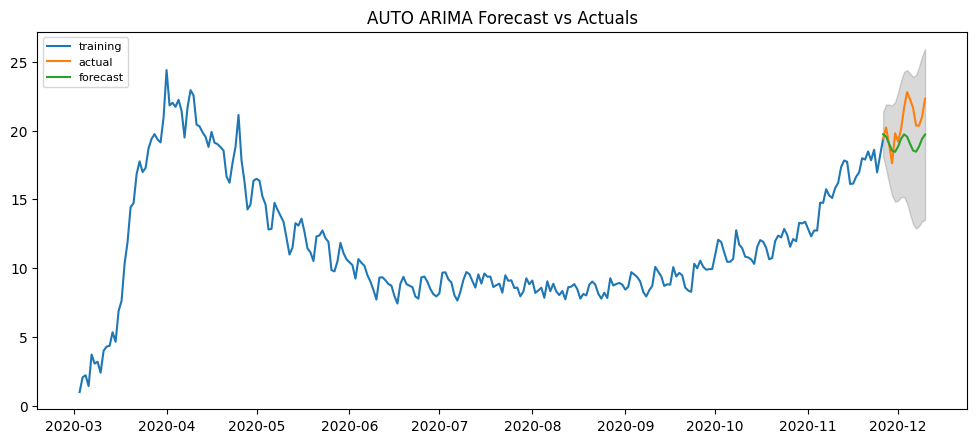

mse is 3.5580095939318546
rmse is 1.8862686961119444
mape is 0.07368876865686716


In [65]:
ORDER=fitted_model.order
TRAIN=A_train
TEST=A_test

# Forecast
fc, conf = fitted_model.predict(n_periods=len(TEST),exogenous=None, return_conf_int=True, alpha=0.05)  # 95% conf

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc, index=idx)
lower_series = pd.Series(conf[:, 0], index=idx)   # Best Case
upper_series = pd.Series(conf[:, 1], index=idx)   # Worst Case

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('AUTO ARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((fc - TEST)**2)
print('mse is',mse)
rmse = np.mean((fc - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc - TEST)/np.abs(TEST))  # MAPE
print('mape is', mape)

Pretty bad forcast. looks like Auto tuning is not the best

# **Auto SARIMA for Variable Split/Forcast**



#### Split the data accordingly

In [66]:
train_test_split(0,14) 
print(' ')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [67]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

### Trianing 

stepwise : bool, optional (default=True)
    Whether to use the stepwise algorithm outlined in Hyndman and Khandakar
    (2008) to identify the optimal model parameters. The stepwise algorithm
    can be significantly faster than fitting all (or a random subset
    of) hyper-parameter combinations and is less likely to over-fit
    the model.

d : int, optional (default=None)
    The order of first-differencing. If None (by default), the value
    will automatically be selected based on the results of the test
    (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented
    Dickey-Fuller or the Phillips–Perron test will be conducted to find
    the most probable value). Must be a positive integer or None. Note
    that if d is None, the runtime could be significantly longer.

out_of_sample_size : int, optional (default=0)
    The ARIMA class can fit only a portion of the data if specified,
    in order to retain an "out of bag" sample score. This is the
    number of examples from the tail of the time series to hold out
    and use as validation examples. The model will not be fit on these
    samples, but the observations will be added into the model's endog
    and exog arrays so that future forecast values originate from the
    end of the endogenous vector.

scoring : str, optional (default='mse')
    If performing validation (i.e., if out_of_sample_size > 0), the
    metric to use for scoring the out-of-sample data. One of {'mse', 'mae'}

scoring_args : dict, optional (default=None)
    A dictionary of key-word arguments to be passed to the scoring
    metric.

In [68]:
# took m=7 from seasonal_decompose in part 2

fitted_model = auto_arima(A_train, seasonal=True, trace=True,max_q=8 ,max_p=8, max_d=3, max_D=3, max_P=8, max_Q=5, d=None,D=None,
                           error_action='ignore', m=7,
                           suppress_warnings=True,
                           stepwise=True,information_criterion='oob',maxiter=100)
print(fitted_model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=724.352, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=673.420, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=691.543, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=723.818, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=726.233, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=659.685, Time=0.18 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=648.097, Time=0.75 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=647.147, Time=1.42 sec
 ARIMA(1,1,0)(5,0,0)[7] intercept   : AIC=649.144, Time=2.28 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=9.61 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=645.980, Time=1.48 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=644.489, Time=0.49 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=642.581, Time=0.19 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=691.572, Time

Auto_Arima results should be taken with a grain of salt as all decisions are made based on statsitical significance test that themselves should be taken with a grain of salt.

### Validation

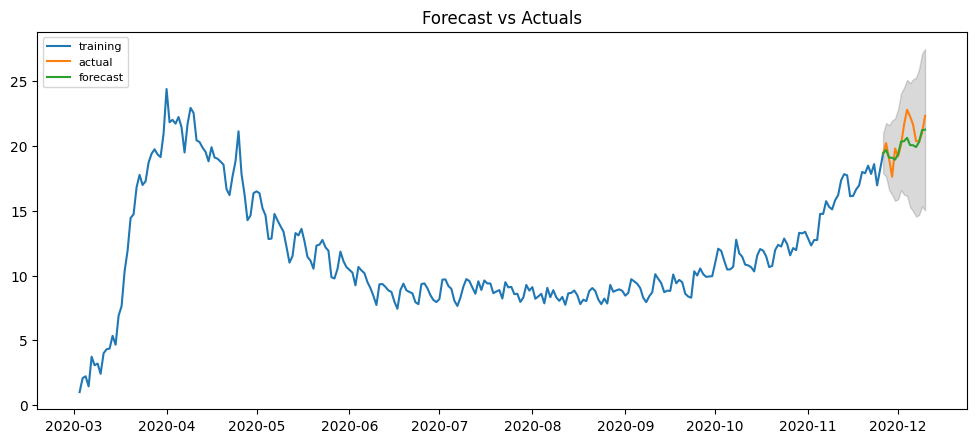

mse is 1.8862686961119444
rmse is 1.106443185652861
mape is 0.0391846102927444


In [69]:
ORDER=fitted_model.order
TRAIN=A_train
TEST=A_test

# Forecast
fc, conf = fitted_model.predict(n_periods=len(TEST),exogenous=None, return_conf_int=True, alpha=0.05)  # 95% conf

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc, index=idx)
lower_series = pd.Series(conf[:, 0], index=idx)   # Best Case
upper_series = pd.Series(conf[:, 1], index=idx)   # Worst Case

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse = np.mean((fc - TEST)**2)
print('mse is',rmse)
rmse = np.mean((fc - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc - TEST)/np.abs(TEST))  # MAPE
print('mape is', mape)

! Adding the effects of seasonality made a very large difference ! mse went down by 1.5 or 45%!



# **Final Model SARIMA W/Tuning 2-week prediction**



highest Model Ranking based on MSE thus far mse is 0.775
2- week forcast

---

1.

(7, 2, 1) ARIMA MSE mse=0.775

BUILD_FORCAST(Results.index[0],A_train,A_test)


---

2.

(2,1,2) AUTO ARIMA MSE = 3.012

---

3.

order=(2, 1, 2), seasonal_order=(1, 0, 1, 7)
AUTO SEASONAL ARIMA
mse = 1.15906134846282





Goal in this section. fine tune using some of the Manual ARIMA and Auto SARIMA (take seasonal paramaters and add them to the manually tuned paramaters)

#### Split the data accordingly

In [70]:
train_test_split(0,14)
print('')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [71]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

In [72]:
A_train

Date
2020-03-03     1.000000
2020-03-04     2.080084
2020-03-05     2.223980
2020-03-06     1.442250
2020-03-07     3.732511
                ...    
2020-11-22    17.842243
2020-11-23    18.602066
2020-11-24    16.964169
2020-11-25    18.204459
2020-11-26    19.409398
Name: Cbrt_NYC_New, Length: 269, dtype: float64

In [73]:
A_test

Date
2020-11-26    19.409398
2020-11-27    20.229034
2020-11-28    19.001847
2020-11-29    17.628175
2020-11-30    19.808166
2020-12-01    19.208236
2020-12-02    20.111873
2020-12-03    21.650112
2020-12-04    22.795926
2020-12-05    22.276134
2020-12-06    21.652245
2020-12-07    20.370591
2020-12-08    20.356121
2020-12-09    20.997732
2020-12-10    22.323057
Name: Cbrt_NYC_New, dtype: float64

### Trianing 

stepwise : bool, optional (default=True)
    Whether to use the stepwise algorithm outlined in Hyndman and Khandakar
    (2008) to identify the optimal model parameters. The stepwise algorithm
    can be significantly faster than fitting all (or a random subset
    of) hyper-parameter combinations and is less likely to over-fit
    the model.

d : int, optional (default=None)
    The order of first-differencing. If None (by default), the value
    will automatically be selected based on the results of the test
    (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented
    Dickey-Fuller or the Phillips–Perron test will be conducted to find
    the most probable value). Must be a positive integer or None. Note
    that if d is None, the runtime could be significantly longer.

out_of_sample_size : int, optional (default=0)
    The ARIMA class can fit only a portion of the data if specified,
    in order to retain an "out of bag" sample score. This is the
    number of examples from the tail of the time series to hold out
    and use as validation examples. The model will not be fit on these
    samples, but the observations will be added into the model's endog
    and exog arrays so that future forecast values originate from the
    end of the endogenous vector.

scoring : str, optional (default='mse')
    If performing validation (i.e., if out_of_sample_size > 0), the
    metric to use for scoring the out-of-sample data. One of {'mse', 'mae'}

scoring_args : dict, optional (default=None)
    A dictionary of key-word arguments to be passed to the scoring
    metric.

______________________for Order (6, 2, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                            SARIMAX Results                                            
Dep. Variable:                                    Cbrt_NYC_New   No. Observations:                  269
Model:             SARIMAX(6, 2, 1)x(1, 0, [1, 2, 3, 4, 5], 7)   Log Likelihood                -199.391
Date:                                         Thu, 29 Apr 2021   AIC                            426.782
Time:                                                 01:16:48   BIC                            474.915
Sample:                                             03-03-2020   HQIC                           446.198
                                                  - 11-26-2020                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

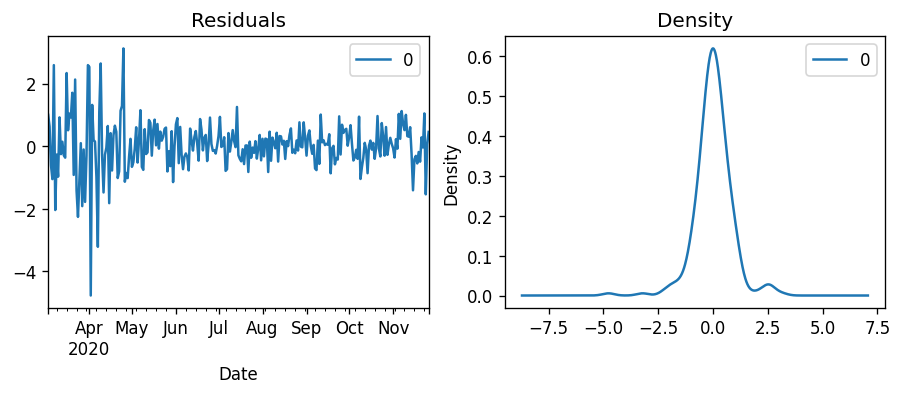

_______________________Model Training Behaviour________________________


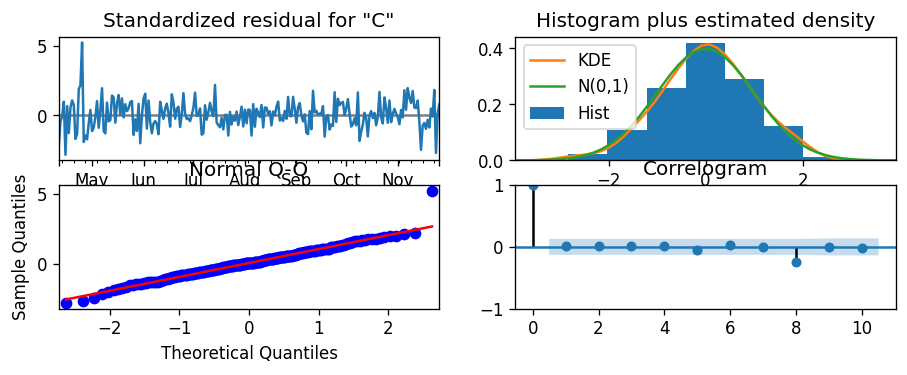

<Figure size 1080x360 with 0 Axes>

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order=(6, 2, 1)         # this suddenly stopped letting me use a 7 in place of the 6.. really adversly effected model performcance..
seasonal_order=(1, 0, 5, 7)  # I tuned the seasonal componant alittle here to get a better fit!

ORDER=order
TRAIN=A_train
  
print('______________________for Order',ORDER,'_______________________________\n')
print('_____________Build Model On training Data & Show Summary_______________')
# 1,1,1 ARIMA Model
model = SARIMAX(TRAIN, m=7,
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)   # try with and without last two as defaults are true
model_fit = model.fit(disp=-1)
print(model_fit.summary())

print('_________________________Plot residual errors__________________________')
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

print('_______________________Model Training Behaviour________________________')
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.show()
plt.tight_layout(h_pad=7)

#when you set dynamic=False the in-sample lagged values are used for prediction.
#That is, the model gets trained up until the previous value to make the next prediction. 
#This can make the fitted forecast and actuals look artificially good.'''

"So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model."

Based on this it looks like we have a well tuned model 

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### Validation

______________________for Order (6, 2, 1) Forcast______________________

______________________Build The Model & Forcast________________________


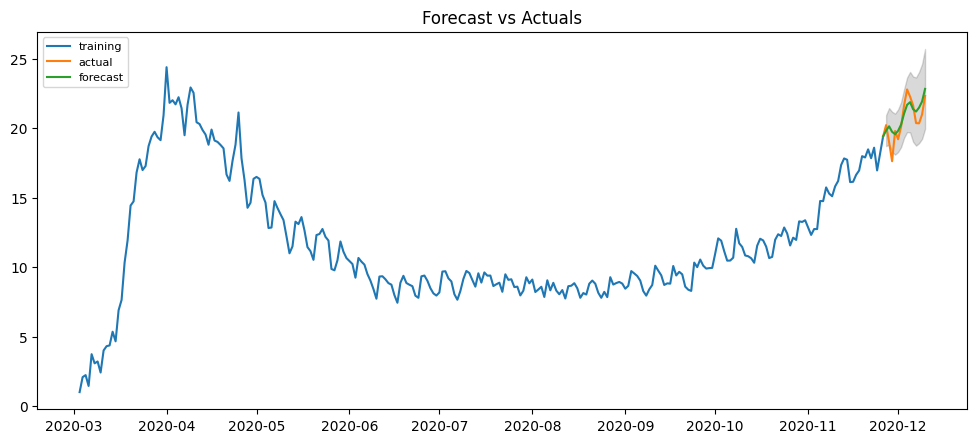

mse is 0.8083716716343051
rmse is 0.8990949180338553
mape is 0.03725802334935286


In [75]:
print('______________________for Order',ORDER,'Forcast______________________\n')
print('______________________Build The Model & Forcast________________________')

TEST= A_test

# Forecast
fc = model_fit.get_forecast(steps=len(TEST))
conf = fc.conf_int()

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc.predicted_mean, index=idx)
lower_series = pd.Series(conf.iloc[:, 0], index=idx)   # Best Case
upper_series = pd.Series(conf.iloc[:, 1], index=idx)   # Worst Case
fc_series[0]=A_test[0]

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((fc.predicted_mean - TEST)**2) # MSE
print('mse is', mse)
rmse = np.mean((fc.predicted_mean - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc.predicted_mean - TEST)/np.abs(TEST))  # MAPE
print('mape is',mape)

MSE here is about 1.8 lower than that of the manually tuned arima model our previous champion. I think this is the best we can do. In the next section I will forcast a month out to see how robust the model is to different length out of sample time frames!

#### Taking the Forcast back to scale


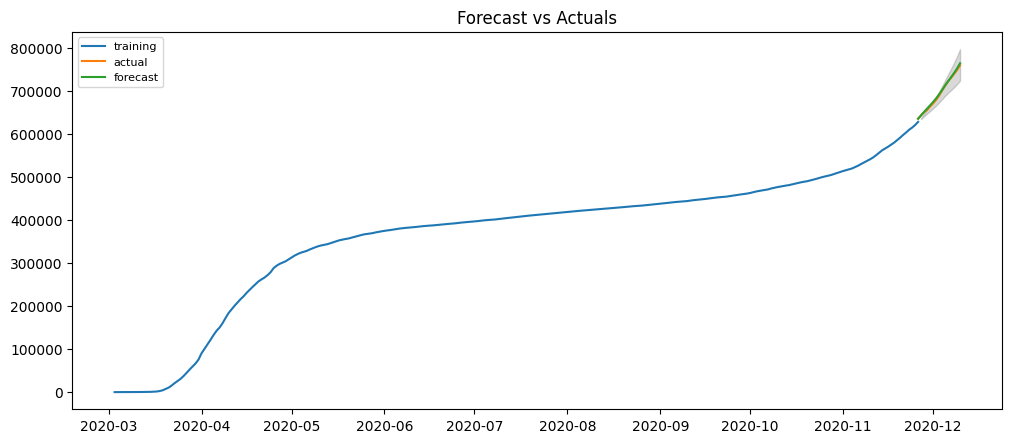

mse is 6900534.562976394
rmse is 2626.8868576656273
mape is 0.039324710321505314


In [76]:
# call for the following: train, forcast, lower_series, upper_series

#cumulative output
def Scale_Back_1D (ts):

  scaled=((ts)**3).cumsum()

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_1D(TRAIN), label='training')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(TEST), label='actual')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(lower_series), ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))/np.abs(Scale_Back_1D(TEST)))  # MAPE
print('mape is',mape)

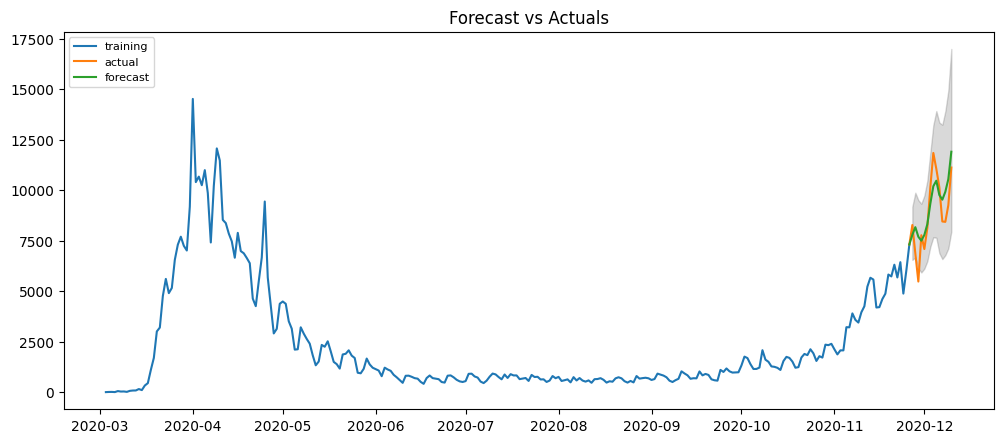

mse is 1132324.0454529559
rmse is 1064.107158820462
mape is 0.1089327376827082


In [77]:
def Scale_Back_0D (ts):

  scaled=((ts)**3)

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')

plt.plot(Scale_Back_0D(TEST), label='actual')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))/np.abs(Scale_Back_0D(TEST)))  # MAPE
print('mape is',mape)

it seems like variance has increased dramatically but I must remember that we were predicting off of the cubic root!

RECALL:
For now I am using the lower and upper bounds of my confidence interval as the best and worst case predictions respectevly. however, I do feel selecting fine tuning alpha or implementing SIR may be a better way to do so.

# **Final Model SARIMA W/Tuning 1-Month prediction**

#### Split the data accordingly

In [78]:
train_test_split(0,30) 
print(' ')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [79]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

### Trianing 

______________________for Order (6, 2, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                            SARIMAX Results                                            
Dep. Variable:                                    Cbrt_NYC_New   No. Observations:                  253
Model:             SARIMAX(6, 2, 1)x(1, 0, [1, 2, 3, 4, 5], 7)   Log Likelihood                -181.919
Date:                                         Thu, 29 Apr 2021   AIC                            391.838
Time:                                                 01:16:53   BIC                            438.961
Sample:                                             03-03-2020   HQIC                           410.880
                                                  - 11-10-2020                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

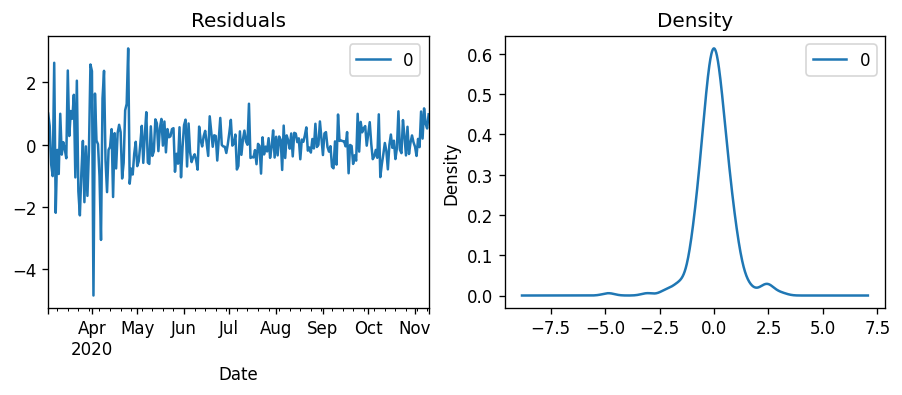

_______________________Model Training Behaviour________________________


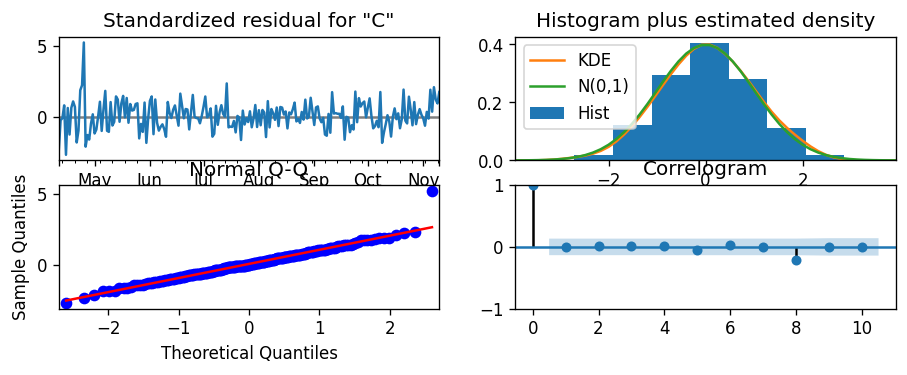

<Figure size 1080x360 with 0 Axes>

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order=(6, 2, 1)         # this suddenly stopped letting me use a 7 in place of the 6.. really adversly effected model performcance..
seasonal_order=(1, 0, 5, 7)  # I tuned the seasonal componant alittle here to get a better fit!

ORDER=order
TRAIN=A_train
  
print('______________________for Order',ORDER,'_______________________________\n')
print('_____________Build Model On training Data & Show Summary_______________')
# 1,1,1 ARIMA Model
model = SARIMAX( TRAIN, 
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False, 
                enforce_invertibility=False)   # try with and without last two as defaults are true
model_fit = model.fit(disp=-1)
print(model_fit.summary())

print('_________________________Plot residual errors__________________________')
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

print('_______________________Model Training Behaviour________________________')
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.show()
plt.tight_layout(h_pad=7)

#when you set dynamic=False the in-sample lagged values are used for prediction.
#That is, the model gets trained up until the previous value to make the next prediction. 
#This can make the fitted forecast and actuals look artificially good.'''

"So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model."

Based on this it looks like we have a well tuned model 

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### Validation

______________________for Order (6, 2, 1) Forcast______________________

______________________Build The Model & Forcast________________________


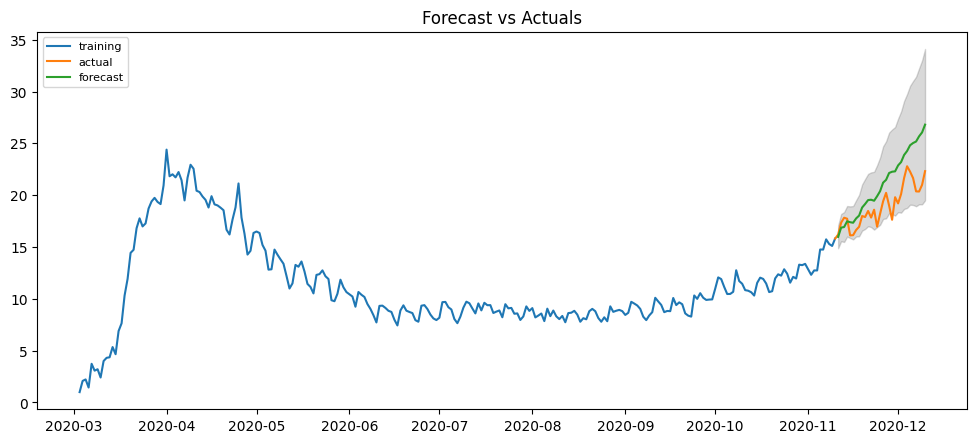

mse is 7.1608029270767455
rmse is 2.6759676618144597
mape is 0.11434017072627287


In [81]:
print('______________________for Order',ORDER,'Forcast______________________\n')
print('______________________Build The Model & Forcast________________________')

TEST= A_test

# Forecast
fc = model_fit.get_forecast(steps=len(TEST))
conf = fc.conf_int()

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc.predicted_mean, index=idx)
lower_series = pd.Series(conf.iloc[:, 0], index=idx)   # Best Case
upper_series = pd.Series(conf.iloc[:, 1], index=idx)   # Worst Case


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((fc.predicted_mean - TEST)**2) # MSE
print('mse is', mse)
rmse = np.mean((fc.predicted_mean - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc.predicted_mean - TEST)/np.abs(TEST))  # MAPE
print('mape is',mape)

Compared to the two week forcast,on a mape basis base to base accuracy only decreased by a small margin mainly attributatble to predictions made further out and the actual cases are still within the model's predicted bounds. 

#### Taking the Forcast back to scale


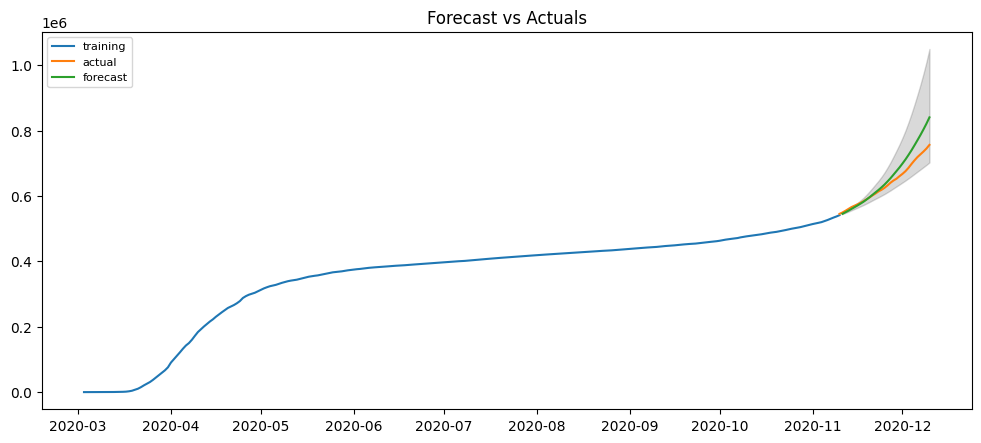

mse is 1118352622.3498137
rmse is 33441.77959304519
mape is 0.20096366879948277


In [82]:
# call for the following: train, forcast, lower_series, upper_series

#cumulative output
def Scale_Back_1D (ts):

  scaled=((ts)**3).cumsum()

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_1D(TRAIN), label='training')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(TEST), label='actual')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(lower_series), ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))/np.abs(Scale_Back_1D(TEST)))  # MAPE
print('mape is',mape)

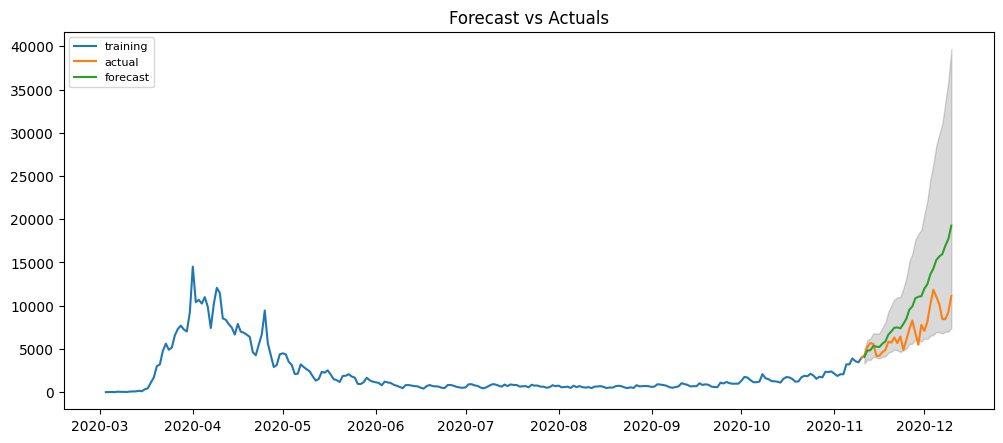

mse is 15641936.94310779
rmse is 3954.9888676338633
mape is 0.4008266004562541


In [83]:
def Scale_Back_0D (ts):

  scaled=((ts)**3)

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')

plt.plot(Scale_Back_0D(TEST), label='actual')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))/np.abs(Scale_Back_0D(TEST)))  # MAPE
print('mape is',mape)

Although I expected ARIMA would not be the best for this it has yeilded good results. 

but you can only get there if you tune it manually!

the confidence interval has been blown out dramatically due to the fact thst it was cubed. still as previously mentioned, the current best/worst case method and not the best. 

# 4. Relating COVID-19 Projections to a Second Dataset


In this section I try to select another dataset to examine and analyze a factors related to COVID-19 and draw corelations.

From:
https://covid19datahub.io/

# Data Collection, Cleaning & Brief Analysis

##Checking out the NYTimes Dataset (NOT Selected for further analysis)

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#time-series-summary-csse_covid_19_time_series

In [174]:
df_nytimes = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',
    index_col=0
)

In [175]:
df_nytimes[df_nytimes.state=='New York']

state  fips    cases  deaths
date                                       
2020-03-01  New York    36        1       0
2020-03-02  New York    36        1       0
2020-03-03  New York    36        2       0
2020-03-04  New York    36       11       0
2020-03-05  New York    36       22       0
...              ...   ...      ...     ...
2021-04-23  New York    36  2021094   51361
2021-04-24  New York    36  2025257   51419
2021-04-25  New York    36  2029307   51471
2021-04-26  New York    36  2032325   51511
2021-04-27  New York    36  2035668   51587

[423 rows x 4 columns]

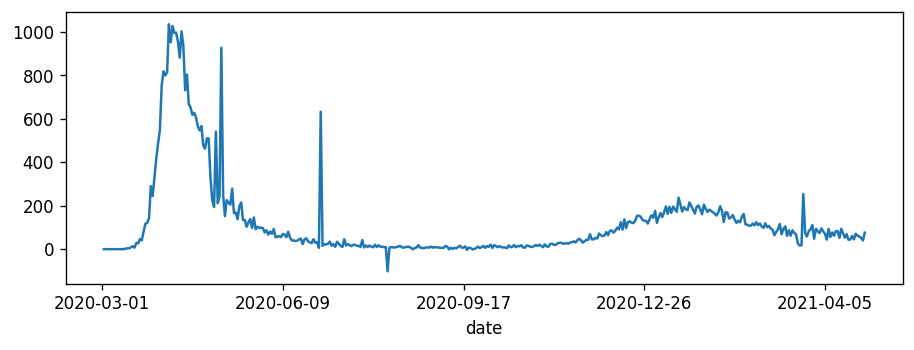

In [176]:
df_nytimes[df_nytimes.state=='New York'].deaths.diff().plot()

In [177]:
df_mask = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv',
    index_col=0
)

In [178]:
df_mask

NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
COUNTYFP                                              
1001      0.053   0.074      0.134       0.295   0.444
1003      0.083   0.059      0.098       0.323   0.436
1005      0.067   0.121      0.120       0.201   0.491
1007      0.020   0.034      0.096       0.278   0.572
1009      0.053   0.114      0.180       0.194   0.459
...         ...     ...        ...         ...     ...
56037     0.061   0.295      0.230       0.146   0.268
56039     0.095   0.157      0.160       0.247   0.340
56041     0.098   0.278      0.154       0.207   0.264
56043     0.204   0.155      0.069       0.285   0.287
56045     0.142   0.129      0.148       0.207   0.374

[3142 rows x 5 columns]

In [179]:
# COUNTYFP: The county FIPS code.
# Recall, inter is the df of NY state counties! 
inter

'E1_Income support'

**Not Time series data, going to look for something better!**

## From COVID-19 Datahub Oxford (Selected for further analysis)

https://github.com/OxCGRT/covid-policy-tracker#subnational-data

### Data Cleaning

In [180]:
df1_sub = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest_withnotes.csv',
    index_col=0
)

In [181]:
pd.set_option('display.max_rows', 60) # go back to 60 later
#pd.set_option('display.max_colwidth', -1) # cancel trunction
pd.set_option('display.max_colwidth', 60)
NY=df1_sub[df1_sub.RegionName=='New York']
NY

CountryCode  ... EconomicSupportIndexForDisplay
CountryName                ...                               
United States         USA  ...                            0.0
United States         USA  ...                            0.0
United States         USA  ...                            0.0
United States         USA  ...                            0.0
United States         USA  ...                            0.0
...                   ...  ...                            ...
United States         USA  ...                          100.0
United States         USA  ...                          100.0
United States         USA  ...                          100.0
United States         USA  ...                            NaN
United States         USA  ...                            NaN

[484 rows x 71 columns]

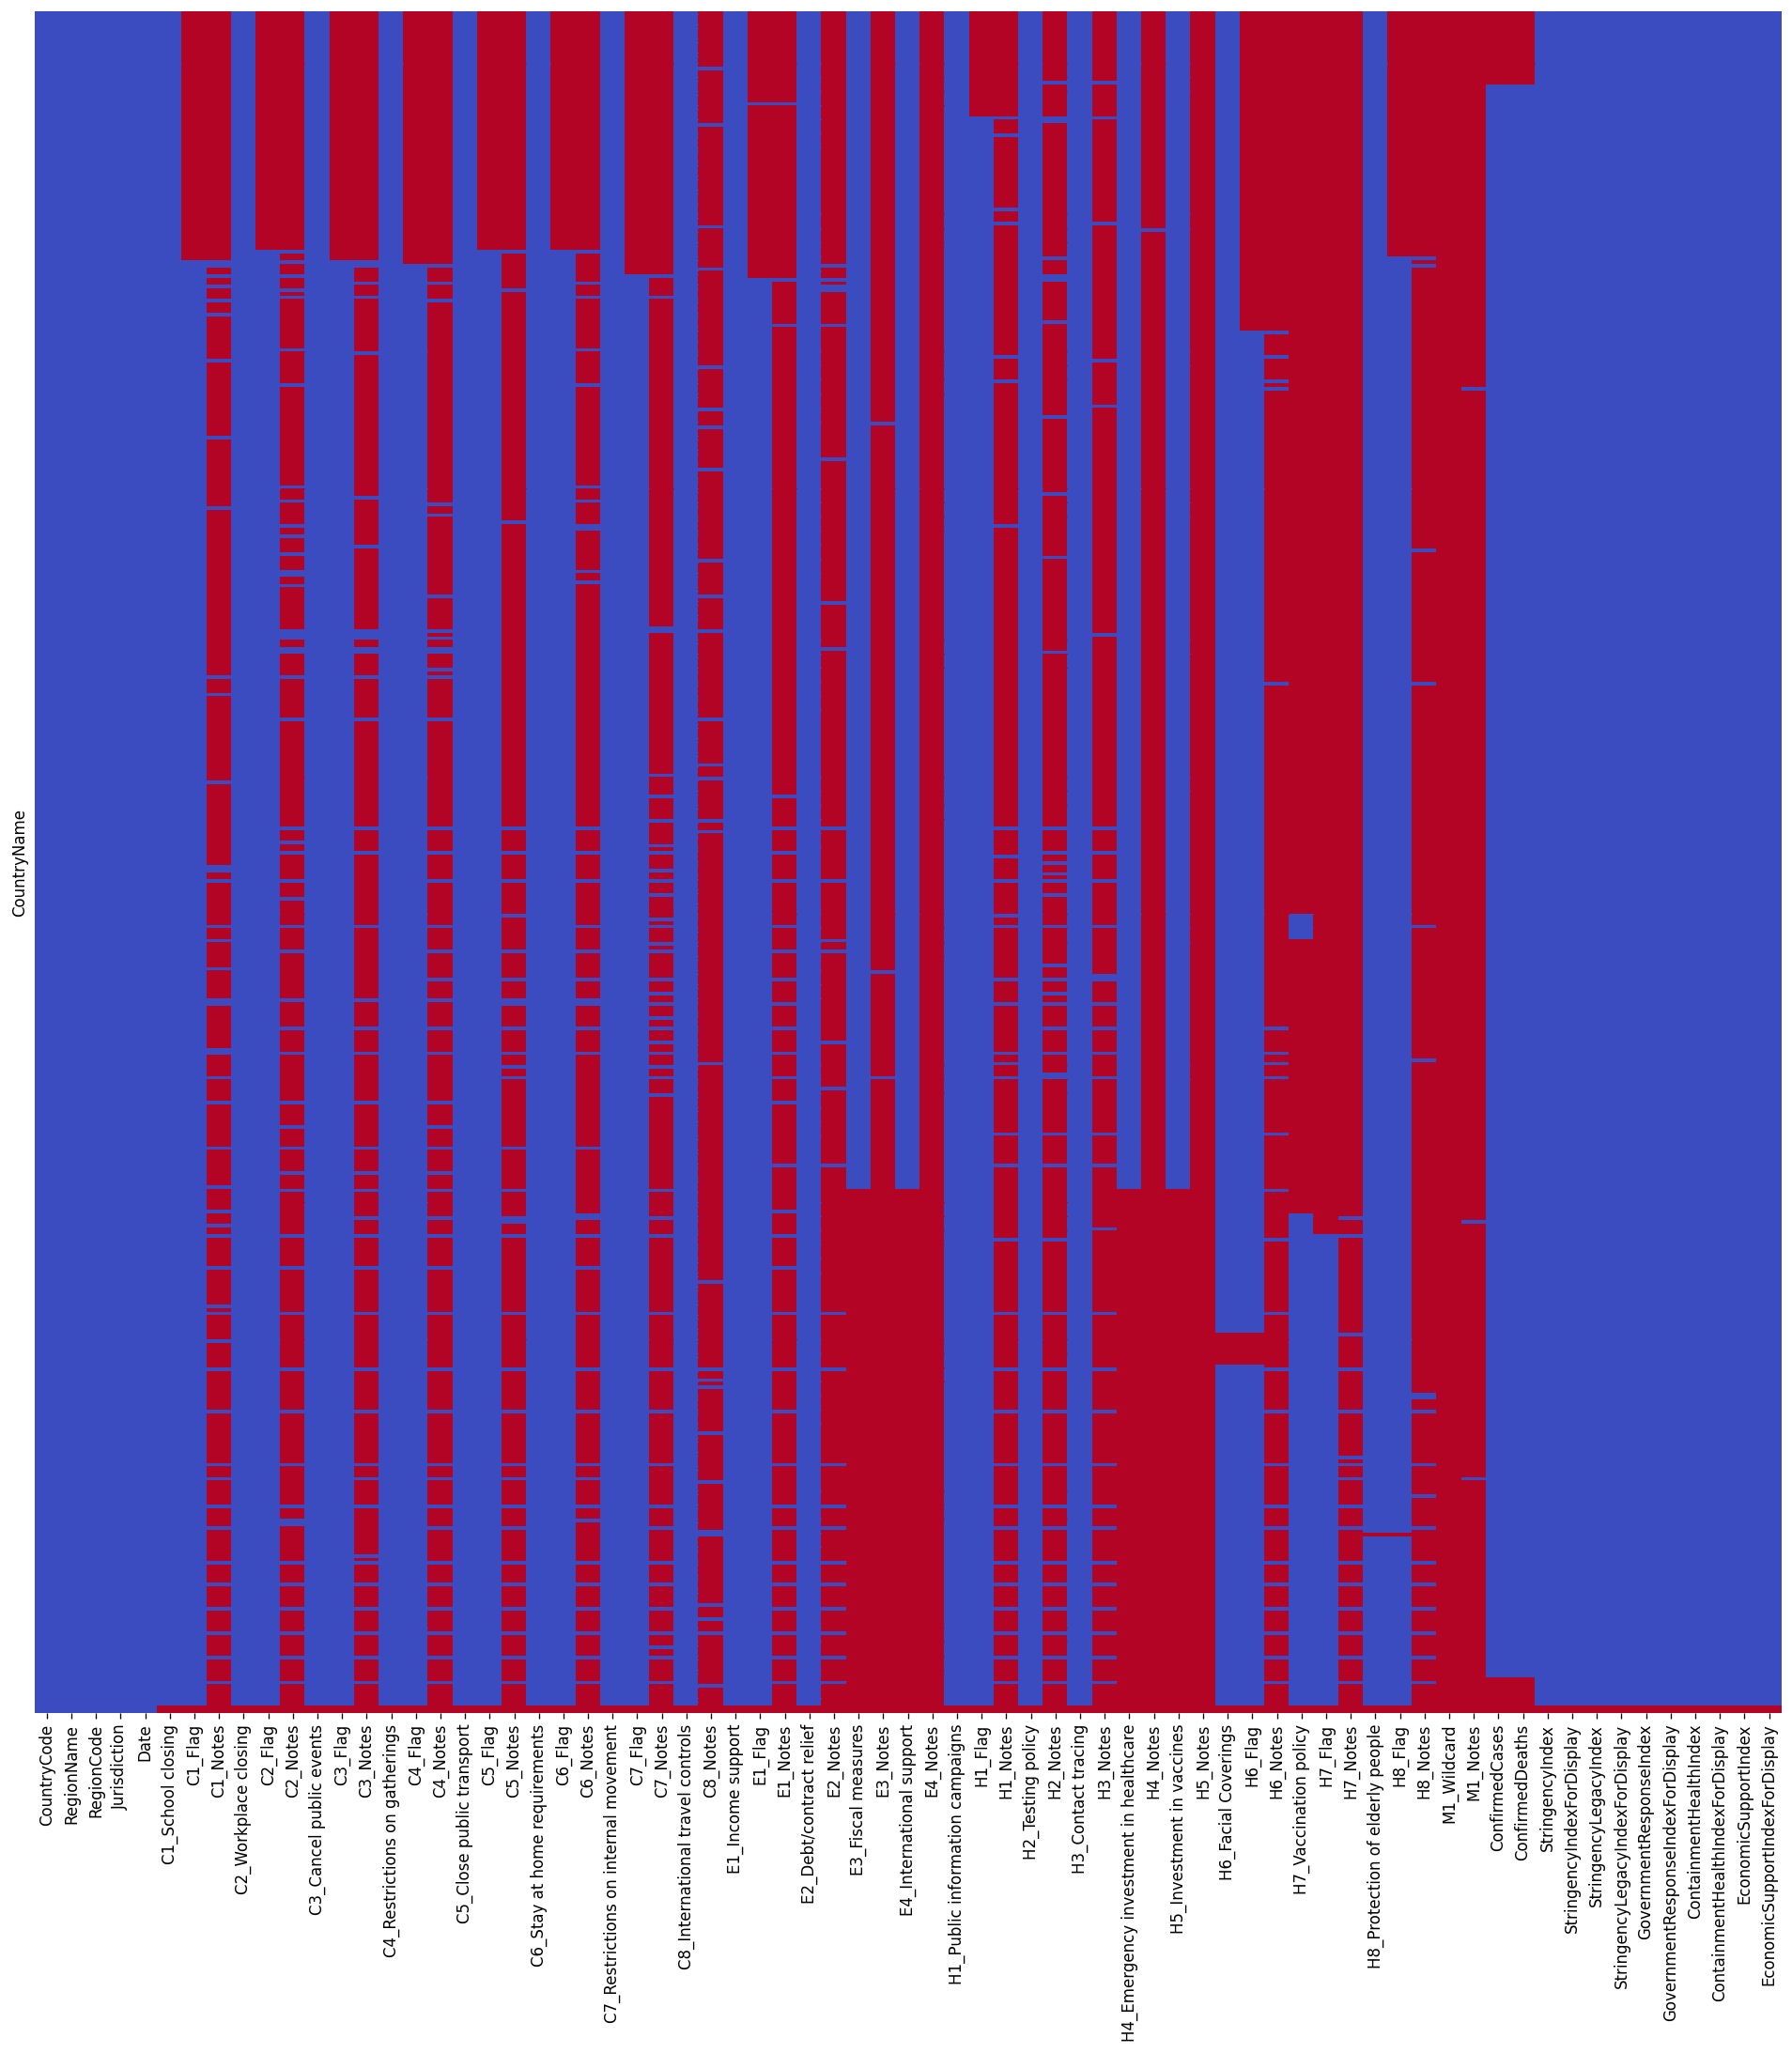

In [182]:
import seaborn as sns
# Check out new heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(NY.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

From: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md#containment-and-closure-policies

I will be using the following to identify What each of these features means and they are encoded. please refer to the link above for more details. 

Bellow please find attached a sample of what the incodings for Restrictions on Gatherings:
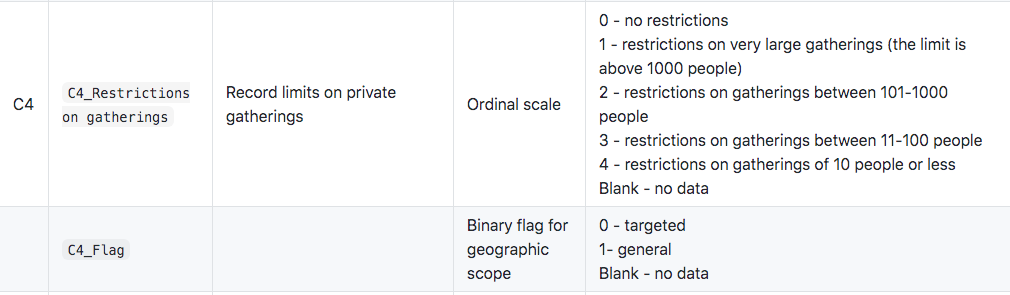

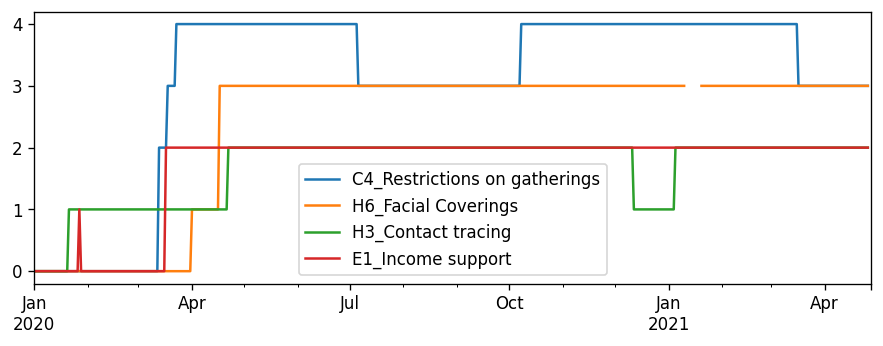

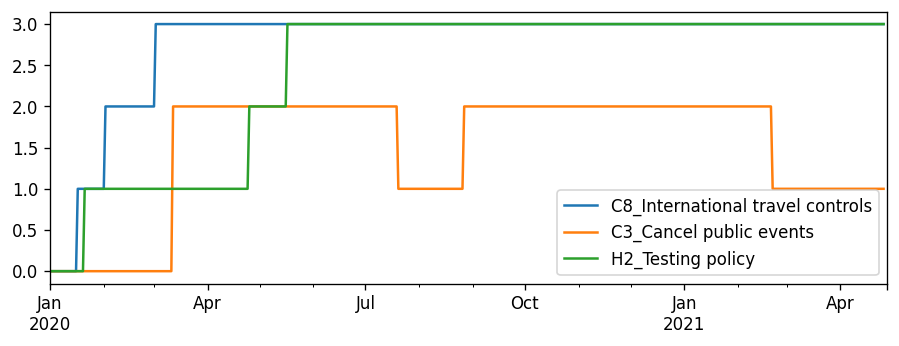

In [183]:
df_gath=NY[['Date','C4_Restrictions on gatherings','C4_Flag','C4_Notes','H6_Facial Coverings','H6_Flag','H6_Notes','H3_Contact tracing','H3_Notes','C8_International travel controls','C3_Cancel public events','H2_Testing policy','E1_Income support','ConfirmedDeaths']]
df_gath.index=df_gath.Date
dd=[]
for i in range(len(df_gath)):
  dt = maya.parse(df_gath.index[i]).datetime()
  dd.append(dt.date())
D=pd.to_datetime(dd)
df_gath.index=D

# breaking up the plots for better visual interpretation and comparison otherwise too much overlap 

The_List=['C4_Restrictions on gatherings','H6_Facial Coverings','H3_Contact tracing','C8_International travel controls','C3_Cancel public events','H2_Testing policy','E1_Income support','ConfirmedDeaths']

A=['C4_Restrictions on gatherings','H6_Facial Coverings','H3_Contact tracing','E1_Income support']
B=['C8_International travel controls','C3_Cancel public events','H2_Testing policy']

df_gath[A].plot()
plt.legend()

df_gath[B].plot()
plt.legend()

In [184]:
#pd.set_option('display.max_rows', None) # go back to 60 later
#pd.set_option('display.max_colwidth', -1) # cancel trunction
df_gath.head()

Date  ...  ConfirmedDeaths
2020-01-01  20200101  ...              NaN
2020-01-02  20200102  ...              NaN
2020-01-03  20200103  ...              NaN
2020-01-04  20200104  ...              NaN
2020-01-05  20200105  ...              NaN

[5 rows x 14 columns]

In [185]:
# fix the last two with known ordinal rating
df_gath.loc['2020-12-09','C4_Restrictions on gatherings']=df_gath.loc['2020-12-08','C4_Restrictions on gatherings']
df_gath.loc['2020-12-10','C4_Restrictions on gatherings']=df_gath.loc['2020-12-09','C4_Restrictions on gatherings']

df_gath.loc['2020-12-09','H6_Facial Coverings']=df_gath.loc['2020-12-08','H6_Facial Coverings']
df_gath.loc['2020-12-10','H6_Facial Coverings']=df_gath.loc['2020-12-09','H6_Facial Coverings']

df_gath.loc['2020-12-09','H3_Contact tracing']=df_gath.loc['2020-12-08','H3_Contact tracing']
df_gath.loc['2020-12-10','H3_Contact tracing']=df_gath.loc['2020-12-09','H3_Contact tracing']

df_gath.loc['2020-12-09','ConfirmedDeaths']=df_gath.loc['2020-12-08','ConfirmedDeaths']
df_gath.loc['2020-12-10','ConfirmedDeaths']=df_gath.loc['2020-12-09','ConfirmedDeaths']

A=['C4_Restrictions on gatherings','H6_Facial Coverings','H3_Contact tracing','E1_Income support']
B=['C8_International travel controls','C3_Cancel public events','H2_Testing policy']
#'C8_International travel controls' was a flat line so removed

inter='C3_Cancel public events'
df_gath.loc['2020-12-09',inter]=df_gath.loc['2020-12-08',inter]
df_gath.loc['2020-12-10',inter]=df_gath.loc['2020-12-09',inter]

inter='H2_Testing policy'
df_gath.loc['2020-12-09',inter]=df_gath.loc['2020-12-08',inter]
df_gath.loc['2020-12-10',inter]=df_gath.loc['2020-12-09',inter]

inter='E1_Income support'
df_gath.loc['2020-12-09',inter]=df_gath.loc['2020-12-08',inter]
df_gath.loc['2020-12-10',inter]=df_gath.loc['2020-12-09',inter]

########################################################################################################

# Cut it up (remove 10th onwards)
df_gath.drop(df_gath[df_gath['C4_Restrictions on gatherings'].isna()].index, axis=0, inplace=True)
# adjust start to match start of case data 

# The MVPs! Only the most informative will enter this list 

# The update
The_List=['C4_Restrictions on gatherings','H6_Facial Coverings','H3_Contact tracing','C3_Cancel public events','H2_Testing policy','E1_Income support','ConfirmedDeaths']

df=df_gath[The_List]
df=df.loc['2020-03-03':'2020-12-10',:]
#df=df.loc['2020-03-03':'2020-08-03',:]
#ts_df=ts_df.loc['2020-03-03':'2020-08-03',:]

In [186]:
#import seaborn as sns
#Check for nans!!

# Check out new heatmap
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [187]:
ts_df

NYC_Cases  NYC_New  ...  Once_Differenced  Twice_Differenced
Date                            ...                                     
2020-03-03          1      1.0  ...          1.000000           1.000000
2020-03-04         10      9.0  ...          1.080084           0.080084
2020-03-05         21     11.0  ...          0.143896          -0.936188
2020-03-06         24      3.0  ...         -0.781731          -0.925627
2020-03-07         76     52.0  ...          2.290262           3.071992
...               ...      ...  ...               ...                ...
2020-12-06     714834  10151.0  ...         -0.623888          -0.104096
2020-12-07     723287   8453.0  ...         -1.281655          -0.657766
2020-12-08     731722   8435.0  ...         -0.014469           1.267185
2020-12-09     740980   9258.0  ...          0.641611           0.656080
2020-12-10     752104  11124.0  ...          1.325324           0.683713

[283 rows x 7 columns]

2020-12-10

In [188]:
df

C4_Restrictions on gatherings  ...  ConfirmedDeaths
2020-03-03                            0.0  ...              0.0
2020-03-04                            0.0  ...              0.0
2020-03-05                            0.0  ...              0.0
2020-03-06                            0.0  ...              0.0
2020-03-07                            0.0  ...              0.0
...                                   ...  ...              ...
2020-12-06                            4.0  ...          34997.0
2020-12-07                            4.0  ...          35080.0
2020-12-08                            4.0  ...          35170.0
2020-12-09                            4.0  ...          35170.0
2020-12-10                            4.0  ...          35170.0

[283 rows x 7 columns]

## Testing Corelation Between Daily Covid Cases & The New Data (Policy Tracker)

In [189]:
ts_df['NYC_New']

Date
2020-03-03        1.0
2020-03-04        9.0
2020-03-05       11.0
2020-03-06        3.0
2020-03-07       52.0
               ...   
2020-12-06    10151.0
2020-12-07     8453.0
2020-12-08     8435.0
2020-12-09     9258.0
2020-12-10    11124.0
Name: NYC_New, Length: 283, dtype: float64

In [190]:
df['ConfirmedDeaths'] # deaths data!

2020-03-03        0.0
2020-03-04        0.0
2020-03-05        0.0
2020-03-06        0.0
2020-03-07        0.0
               ...   
2020-12-06    34997.0
2020-12-07    35080.0
2020-12-08    35170.0
2020-12-09    35170.0
2020-12-10    35170.0
Name: ConfirmedDeaths, Length: 283, dtype: float64

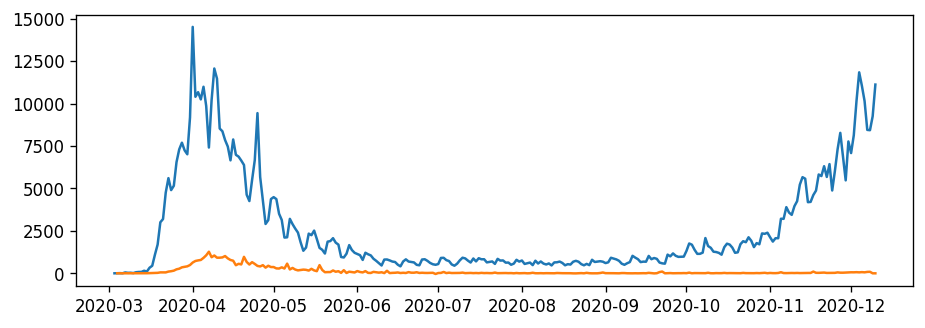

In [191]:
plt.plot(ts_df['NYC_New'])
plt.plot(df['ConfirmedDeaths'].diff()) # want to compare the non culmulative plots 


___________________________ C4_Restrictions on gatherings ___________________________________________

correlation between number of daily cases and C4_Restrictions on gatherings
Correlation= 0.430856845812002


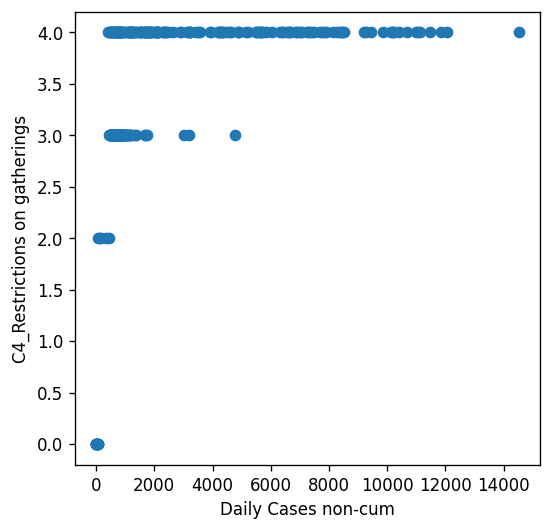


___________________________ H6_Facial Coverings ___________________________________________

correlation between number of daily cases and H6_Facial Coverings
Correlation= -0.2640885311089435


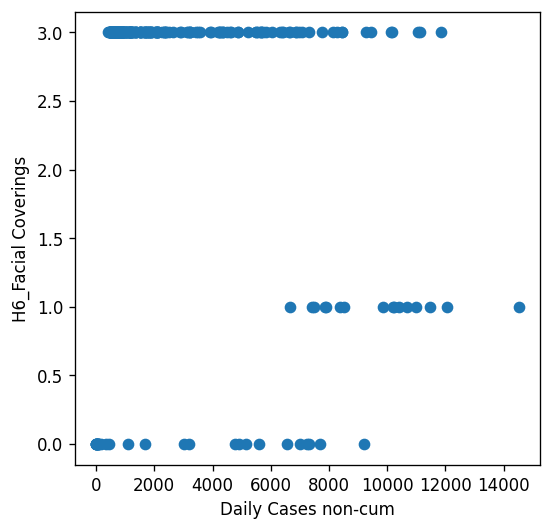


___________________________ H3_Contact tracing ___________________________________________

correlation between number of daily cases and H3_Contact tracing
Correlation= -0.3995682361435809


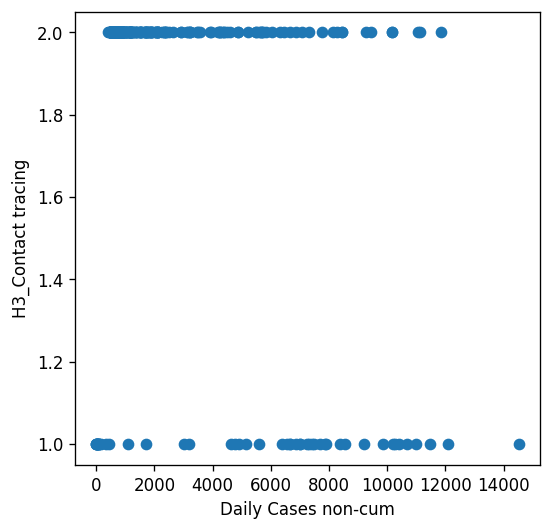


___________________________ C3_Cancel public events ___________________________________________

correlation between number of daily cases and C3_Cancel public events
Correlation= 0.31236828095988906


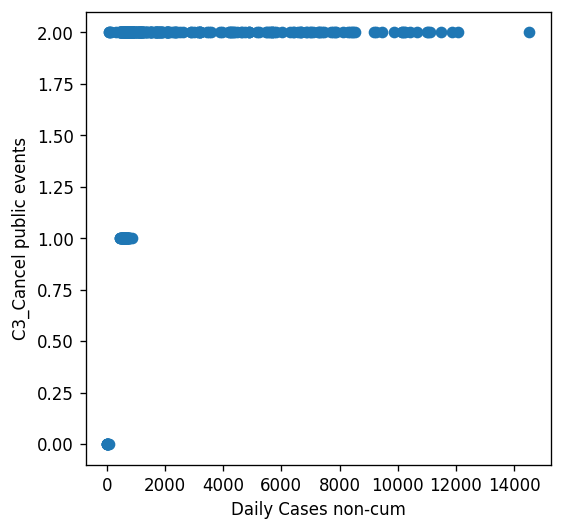


___________________________ H2_Testing policy ___________________________________________

correlation between number of daily cases and H2_Testing policy
Correlation= -0.43267708331643295


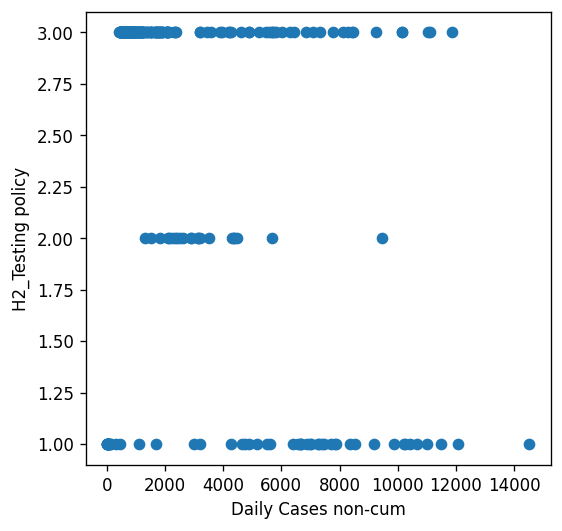


___________________________ E1_Income support ___________________________________________

correlation between number of daily cases and E1_Income support
Correlation= 0.19722834041212686


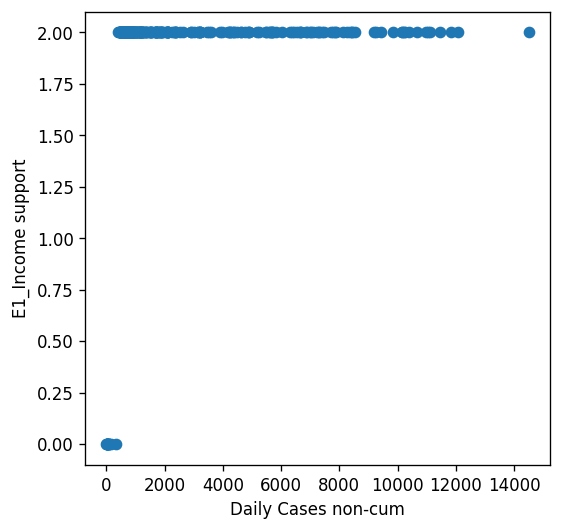


___________________________ ConfirmedDeaths ___________________________________________

correlation between number of daily cases and ConfirmedDeaths
Correlation= 0.6548967207343711


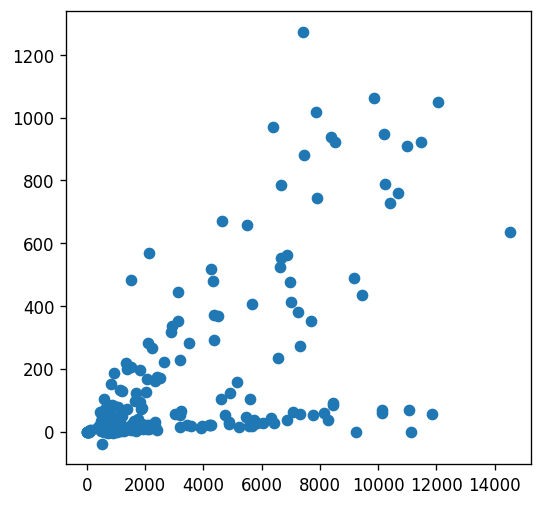

In [192]:
for i in range(len(The_List)):
  
  if The_List[i]=='ConfirmedDeaths':
      print('\n___________________________',The_List[i],'___________________________________________')
      print('\ncorrelation between number of daily cases and',The_List[i])
      correlation=ts_df['NYC_New'].corr(df[The_List[i]].diff())
      print('Correlation=',correlation)
      plt.figure(figsize=(5,5))
      plt.scatter(ts_df['NYC_New'],df[The_List[i]].diff())
      plt.show()
  else:
      print('\n___________________________',The_List[i],'___________________________________________')
      print('\ncorrelation between number of daily cases and',The_List[i])
      correlation=ts_df['NYC_New'].corr(df[The_List[i]])
      print('Correlation=',correlation)
      plt.figure(figsize=(5,5))
      plt.scatter(ts_df['NYC_New'],df[The_List[i]])
      plt.xlabel('Daily Cases non-cum')
      plt.ylabel(The_List[i])
      plt.show()

Key Takeaways - Top 5 most Correlated - (To be discussed in nect section):

>Correlation between number of daily cases and ConfirmedDeaths
- Correlation= 0.656

>Correlation between number of daily cases and C3_Cancel public events
- Correlation= 0.3

>Correlation between number of daily cases and C4_Restrictions on gatherings
- Correlation= 0.437

>Correlation between number of daily cases and H2_Testing policy
- Correlation= -0.43

>Correlation between number of daily cases and H6_Facial Coverings
- Correlation= -0.26

## AUTO SARIMAX Model With Exogenous dataset (Like supporting dataset)

### Create and Split Exogenous df

First of all you have to define your exogenous input as an array-type structure with dimensions nobsxk where nobs is the number of your endogenous observations (i.e. supposing that you have a time series, the length of your time series) and k the number of your additional exogenous variables. Supposing that you use a ndarray for this purpose you may begin with something like

In [193]:
print('Recall: top 5 most correlated: ConfirmedDeaths, C3_Cancel public events, C4_Restrictions on gatherings, H2_Testing policy, H6_Facial Coverings')

# Establish dataframe of exogeneous variables! 
exog = df[['ConfirmedDeaths', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'H2_Testing policy', 'H6_Facial Coverings']]
exog['ConfirmedDeaths']=exog['ConfirmedDeaths'].diff()
exog['ConfirmedDeaths'][0]=0
#exog = np.array(df[['ConfirmedDeaths', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'H2_Testing policy', 'H6_Facial Coverings']])

Recall: top 5 most correlated: ConfirmedDeaths, C3_Cancel public events, C4_Restrictions on gatherings, H2_Testing policy, H6_Facial Coverings


In [194]:
exog

ConfirmedDeaths  ...  H6_Facial Coverings
2020-03-03              0.0  ...                  0.0
2020-03-04              0.0  ...                  0.0
2020-03-05              0.0  ...                  0.0
2020-03-06              0.0  ...                  0.0
2020-03-07              0.0  ...                  0.0
...                     ...  ...                  ...
2020-12-06             58.0  ...                  3.0
2020-12-07             83.0  ...                  3.0
2020-12-08             90.0  ...                  3.0
2020-12-09              0.0  ...                  3.0
2020-12-10              0.0  ...                  3.0

[283 rows x 5 columns]

In [195]:
def exog_train_test_split(split,NumDays):  
  global exog_train
  global exog_test
  if (NumDays==0): # split by days (no. of days to forcast), change from 0 if u wanna use days
    NumDays=round((1-split)*len(exog))
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  else:
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  return (exog_train,exog_test)

#### Split the data accordingly

In [196]:
train_test_split(0,14) 
exog_train_test_split(0,14)
print('')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [197]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced

# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

#### Training 

In [199]:
exog_train

ConfirmedDeaths  ...  H6_Facial Coverings
2020-03-03              0.0  ...                  0.0
2020-03-04              0.0  ...                  0.0
2020-03-05              0.0  ...                  0.0
2020-03-06              0.0  ...                  0.0
2020-03-07              0.0  ...                  0.0
...                     ...  ...                  ...
2020-11-22             23.0  ...                  3.0
2020-11-23             26.0  ...                  3.0
2020-11-24             23.0  ...                  3.0
2020-11-25             28.0  ...                  3.0
2020-11-26             55.0  ...                  3.0

[269 rows x 5 columns]

In [200]:
import pmdarima as pm

TRAIN=A_train

# SARIMAX Model
sxmodel = pm.auto_arima(TRAIN, exogenous=exog_train,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=7, max_q=5, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           information_criterion='oob')

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=699.004, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=725.867, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=679.153, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=696.985, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=724.498, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=727.849, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=662.841, Time=1.36 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=647.868, Time=1.43 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=645.685, Time=0.95 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=697.053, Time=1.06 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=648.324, Time=1.56 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=687.854, Time=1.29 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=650.208, Time=1.81 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=646.068, Time=0.83 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=647.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  269
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 7)   Log Likelihood                -313.068
Date:                             Thu, 29 Apr 2021   AIC                            644.137
Time:                                     01:50:21   BIC                            676.455
Sample:                                 03-03-2020   HQIC                           657.117
                                      - 11-26-2020                                         
Covariance Type:                               opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ConfirmedDeaths                   0.0004      0.001      0.648      0.517      -0.001       0.001
C3_Cancel public events          -0.1379      0.322     -0.428      0.669      -0.770       0.494
C4_Restrictions on gatherings     0.5102      0.230      2.222      0.026       0.060       0.960
H2_Testing policy                 0.9284      0.302      3.076      0.002       0.337       1.520
H6_Facial Coverings               0.0939      0.203      0.462      0.644      -0.304       0.492
ar.L1                            -0.1000      0.044     -2.296      0.022      -0.185      -0.015
ar.S.L7                           0.9263      0.036     25.849      0.000       0.856       0.997
ma.S.L7                          -0.6793      0.078     -8.742      0.000      -0.832      -0.527
sigma2                            0.5960      0.034     17.319      0.000       0.529       0.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               136.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

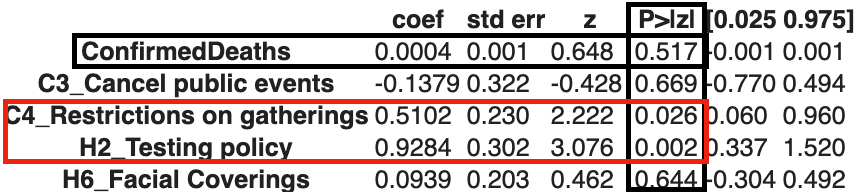

Looking at the Coefficients of some of our exogeneous variable we see some informative stuff:

I did not expect to see the smallest contribution from the most highly correlated exogenous time series (**Confirmed Deaths**) of just 0.0004. However the P-value 0f 0.517 tells us that it is also highly statsitically insignficant. 

**Canelation of public events** is the only negative contributuer (large negative coeff) (has a downward influcence on predictions) is not statistically significant witha p value of 0.669!

**Restrictions on gatherings** and **Testing Policy** both had high positive contributions that were statistically significant with P values bellow 0.05

As previously mentioned. AutoARIMA results should be taken with a grain of salt!

P-value ≤ α: The term is statistically significant
If the p-value is less than or equal to the significance level, you can conclude that the coefficient is statistically significant.
P-value > α: The term is not statistically significant
If the p-value is greater than the significance level, you cannot conclude that the coefficient is statistically significant. You may want to refit the model without the term.

#### Validate

______________________for Order (6, 2, 1) Forcast______________________

______________________Build The Model & Forcast________________________


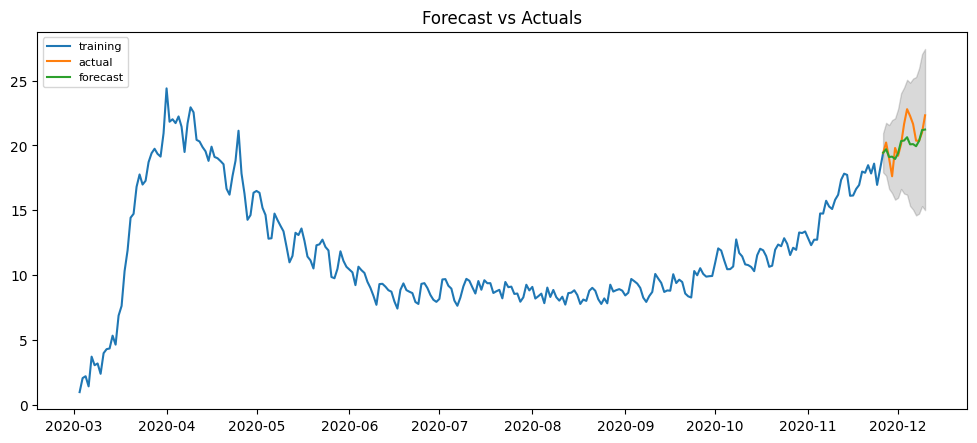

mse is 1.2180436322759376
rmse is 1.1036501403415566
mape is 0.03902113919344179


In [201]:
print('______________________for Order',ORDER,'Forcast______________________\n')
print('______________________Build The Model & Forcast________________________')

TEST= A_test

# Forecast
fc, conf = sxmodel.predict(n_periods=len(TEST), 
                                  exogenous=exog_test, 
                                  return_conf_int=True)

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc, index=idx)
lower_series = pd.Series(conf[:, 0], index=idx) #Best Case
upper_series = pd.Series(conf[:, 1], index=idx) #Worst Case

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((fc_series - TEST)**2) # MSE
print('mse is', mse)
rmse = np.mean((fc_series - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc - TEST)/np.abs(TEST))  # MAPE
print('mape is',mape)

MSE is lower than that of our manually tuned SARIMA model. I believe this is attributable to AUTO-ARIMA's unrefined hyperparameter selection method. and the exogs poor statistical significance

#### Taking the Forcast back to scale


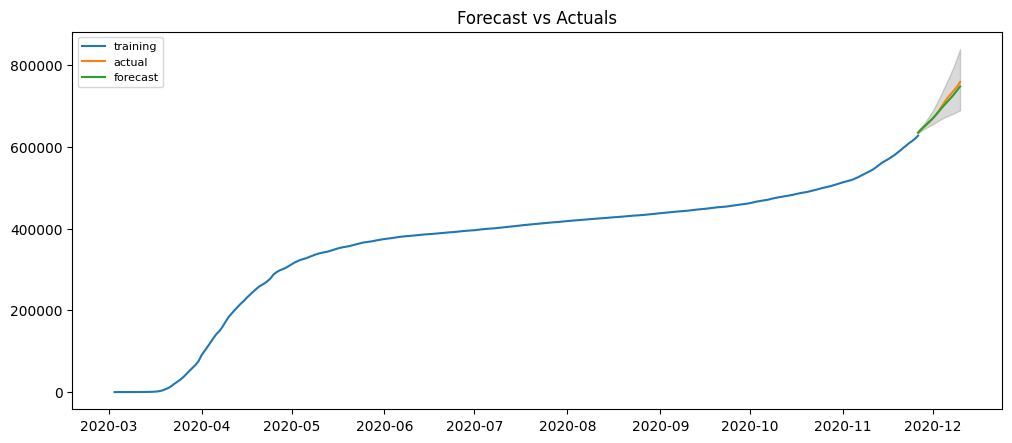

mse is 36584321.41226418
rmse is 6048.497450794221
mape is 0.04812759121947658


In [202]:
# call for the following: train, forcast, lower_series, upper_series

#cumulative output
def Scale_Back_1D (ts):

  scaled=((ts)**3).cumsum()

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_1D(TRAIN), label='training')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(TEST), label='actual')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(lower_series), ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))/np.abs(Scale_Back_1D(TEST)))  # MAPE
print('mape is',mape)

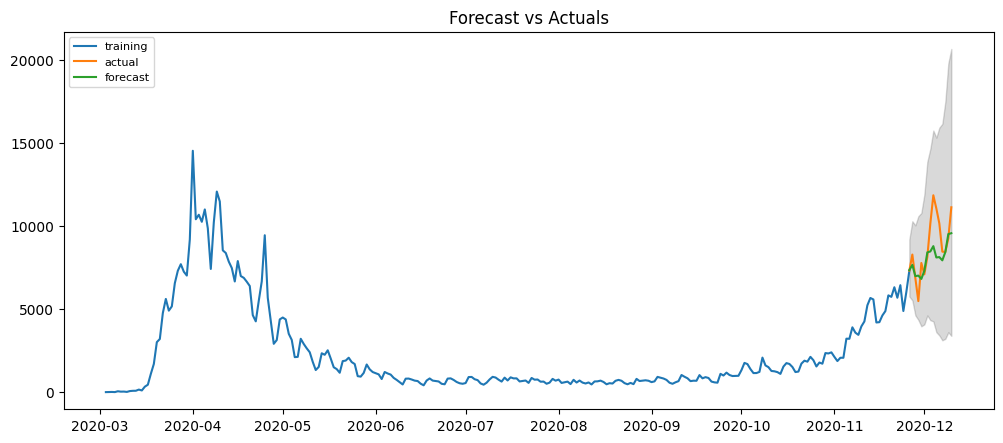

mse is 2103829.2763673062
rmse is 1450.4582987343367
mape is 0.1123068311642705


In [203]:
def Scale_Back_0D (ts):

  scaled=((ts)**3)

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')

plt.plot(Scale_Back_0D(TEST), label='actual')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))/np.abs(Scale_Back_0D(TEST)))  # MAPE
print('mape is',mape)

Worst than our SARIMA Model but this can be due to the autotune and spurrous relationship interference from the exogenous data.

## Same Model with removing statistically insignificant exogeneous variables

The goal here is to eliminate the noise coming from the spurrously correlated exogeneous data

### Create and Split Exogenous df

Recall: The only informative and statistically significant variables were Restrictions on gatherings and Testing Policy

In [204]:
print('Recall: The only informative and statistically significant variables C4_Restrictions on gatherings, H2_Testing policy')

# Establish dataframe of exogeneous variables! 
exog = df[['C4_Restrictions on gatherings', 'H2_Testing policy']]  # Restrictions on gatherings and Testing Policy
#exog['ConfirmedDeaths']=exog['ConfirmedDeaths'].diff()
#exog['ConfirmedDeaths'][0]=0
#exog = np.array(df[['ConfirmedDeaths', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'H2_Testing policy', 'H6_Facial Coverings']])

Recall: The only informative and statistically significant variables C4_Restrictions on gatherings, H2_Testing policy


In [205]:
def exog_train_test_split(split,NumDays):  
  global exog_train
  global exog_test
  if (NumDays==0): # split by days (no. of days to forcast), change from 0 if u wanna use days
    NumDays=round((1-split)*len(exog))
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  else:
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  return (exog_train,exog_test)

#### Split the data accordingly

In [206]:
train_test_split(0,14) 
exog_train_test_split(0,14)
print('')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [207]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced

# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

In [208]:
# exog_test,exog_train derived from function call

#### Training 

In [209]:
TRAIN

Date
2020-03-03     1.000000
2020-03-04     2.080084
2020-03-05     2.223980
2020-03-06     1.442250
2020-03-07     3.732511
                ...    
2020-11-22    17.842243
2020-11-23    18.602066
2020-11-24    16.964169
2020-11-25    18.204459
2020-11-26    19.409398
Name: Cbrt_NYC_New, Length: 269, dtype: float64

In [210]:
exog_train

C4_Restrictions on gatherings  H2_Testing policy
2020-03-03                            0.0                1.0
2020-03-04                            0.0                1.0
2020-03-05                            0.0                1.0
2020-03-06                            0.0                1.0
2020-03-07                            0.0                1.0
...                                   ...                ...
2020-11-22                            4.0                3.0
2020-11-23                            4.0                3.0
2020-11-24                            4.0                3.0
2020-11-25                            4.0                3.0
2020-11-26                            4.0                3.0

[269 rows x 2 columns]

In [211]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(TRAIN, exogenous=exog_train,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=7, max_q=5, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           information_criterion='oob')

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=690.637, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=721.241, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=673.202, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=691.321, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=720.086, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=723.214, Time=0.13 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=656.095, Time=0.46 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=641.623, Time=0.83 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=639.661, Time=0.51 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=691.348, Time=0.24 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=641.616, Time=0.95 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=681.721, Time=0.38 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=643.253, Time=1.19 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=639.819, Time=0.47 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=641.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  269
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -313.187
Date:                           Thu, 29 Apr 2021   AIC                            638.375
Time:                                   01:50:43   BIC                            659.921
Sample:                               03-03-2020   HQIC                           647.029
                                    - 11-26-2020                                         
Covariance Type:                             opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C4_Restrictions on gatherings     0.4950      0.233      2.128      0.033       0.039       0.951
H2_Testing policy                 1.0018      0.308      3.253      0.001       0.398       1.605
ma.L1                            -0.0938      0.038     -2.465      0.014      -0.168      -0.019
ar.S.L7                           0.9371      0.031     30.107      0.000       0.876       0.998
ma.S.L7                          -0.7077      0.073     -9.740      0.000      -0.850      -0.565
sigma2                            0.5963      0.033     18.012      0.000       0.531       0.661
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               136.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

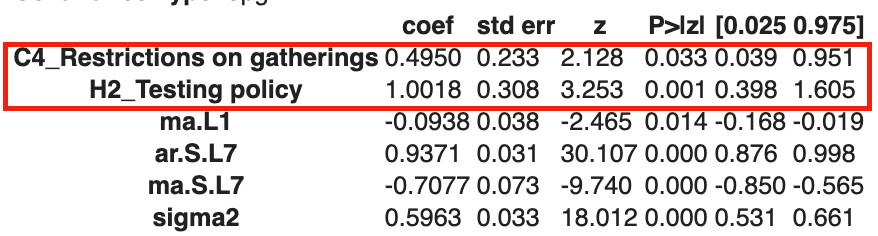

Great results

**That col of 0.000 P values is exactly what we want to see!**

#### Validate

______________________for Order (6, 2, 1) Forcast______________________

______________________Build The Model & Forcast________________________


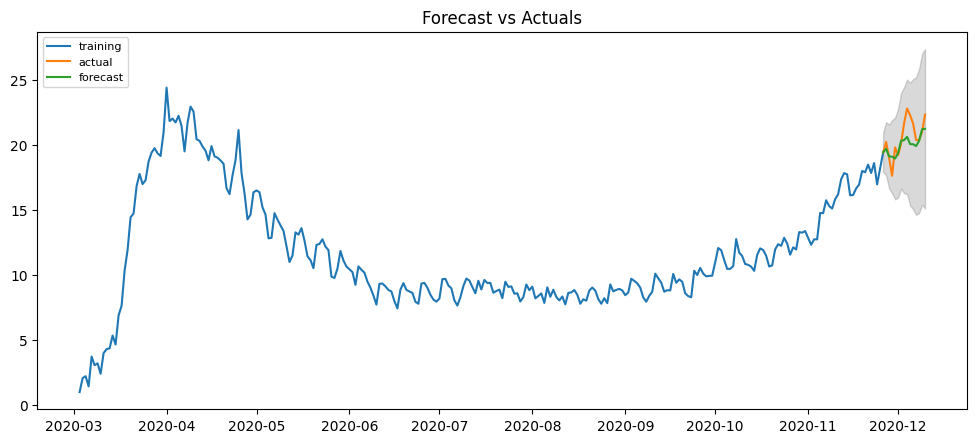

mse is 1.2395618680868532
rmse is 1.1133561281489643
mape is 0.039354562485736586


In [212]:
print('______________________for Order',ORDER,'Forcast______________________\n')
print('______________________Build The Model & Forcast________________________')

TEST= A_test

# Forecast
fc, conf = sxmodel.predict(n_periods=len(TEST), 
                                  exogenous=exog_test, 
                                  return_conf_int=True)

# Make as pandas series
idx=TEST.index

fc_series = pd.Series(fc, index=idx)
lower_series = pd.Series(conf[:, 0], index=idx) #Best Case
upper_series = pd.Series(conf[:, 1], index=idx) #Worst Case

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(TEST, label='actual')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((fc_series - TEST)**2) # MSE
print('mse is', mse)
rmse = np.mean((fc_series - TEST)**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(fc - TEST)/np.abs(TEST))  # MAPE
print('mape is',mape)

MSE went down from 1.946 to 1.4266 by removing the statsistically insignificant exogeneous variables. 

As expected, facial covering mandates are informent and plays a crucial role in containing the virus. It is reassuring to see our predictive model concur to that. 

#### Taking the Forcast back to scale


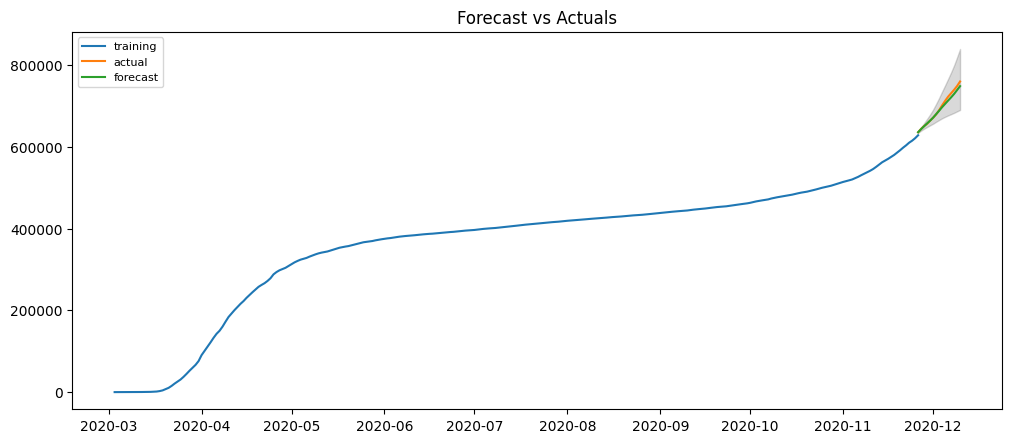

mse is 39328015.694470234
rmse is 6271.205282437359
mape is 0.049103885002873895


In [213]:
# call for the following: train, forcast, lower_series, upper_series

#cumulative output
def Scale_Back_1D (ts):

  scaled=((ts)**3).cumsum()

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_1D(TRAIN), label='training')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(TEST), label='actual')

plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(lower_series), ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_1D(fc_series) - Scale_Back_1D(TEST))/np.abs(Scale_Back_1D(TEST)))  # MAPE
print('mape is',mape)

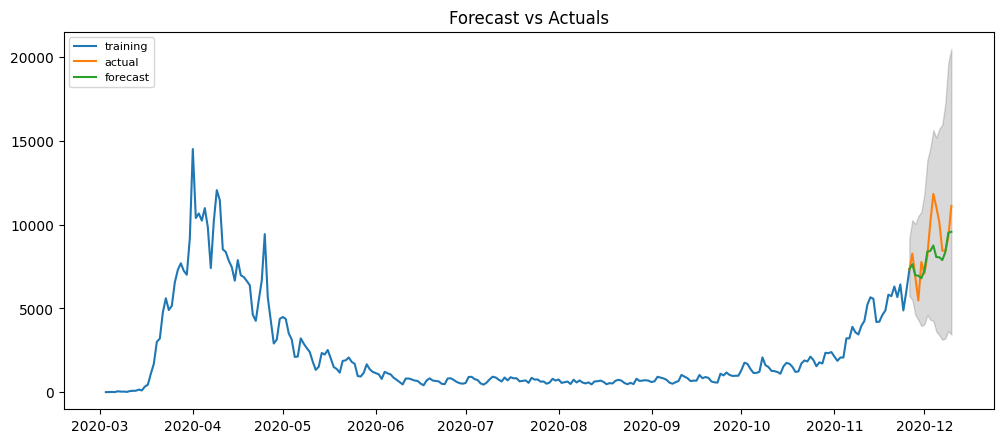

mse is 2142885.617228333
rmse is 1463.8598352398133
mape is 0.11301532218357295


In [214]:
def Scale_Back_0D (ts):

  scaled=((ts)**3)

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')

plt.plot(Scale_Back_0D(TEST), label='actual')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse=np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2) # MSE
print('mse is', mse)
rmse = np.mean((Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))**2)**.5  # RMSE
print('rmse is',rmse)
mape = np.mean(np.abs(Scale_Back_0D(fc_series) - Scale_Back_0D(TEST))/np.abs(Scale_Back_0D(TEST)))  # MAPE
print('mape is',mape)

oddly enough this made the fit slightly worst. 

Could just be that this validation set of a 2-week out sample is biased and is slightly better suited to the other SARIMAX model

Despite all this work on trying to build a SARIMAX model and finding the perfect exogenous data set to support it's predictions, the mannually tuned SARIMA Model previously built outperforms all SARIMAX models. for that reason I will use that model to do my one month out prediction

How about we look at some of the indicies created by oxford instead

# 5. Deriving insights about policy and guidance to tackle the outbreak based on model findings

Using findings from my models in Part 3 and 4 

## Looking at the indices instead. 

The Oxford Covid-19 Government Response Tracker (GitHub repo, university website) tracks individual policy measures across 19 indicators, in part 4 I handpicked a couple to analyse for correlation with my case data.

The Oxford Covid-19 Government Response Tracker also calculates several indices to give an overall impression of government activity, and this is how these indices are calculated. 

All of our indices are simple averages of the individual component indicators. This is described in equation 1 below where k is the number of component indicators in an index and Ij is the sub-index score for an individual indicator.

https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md

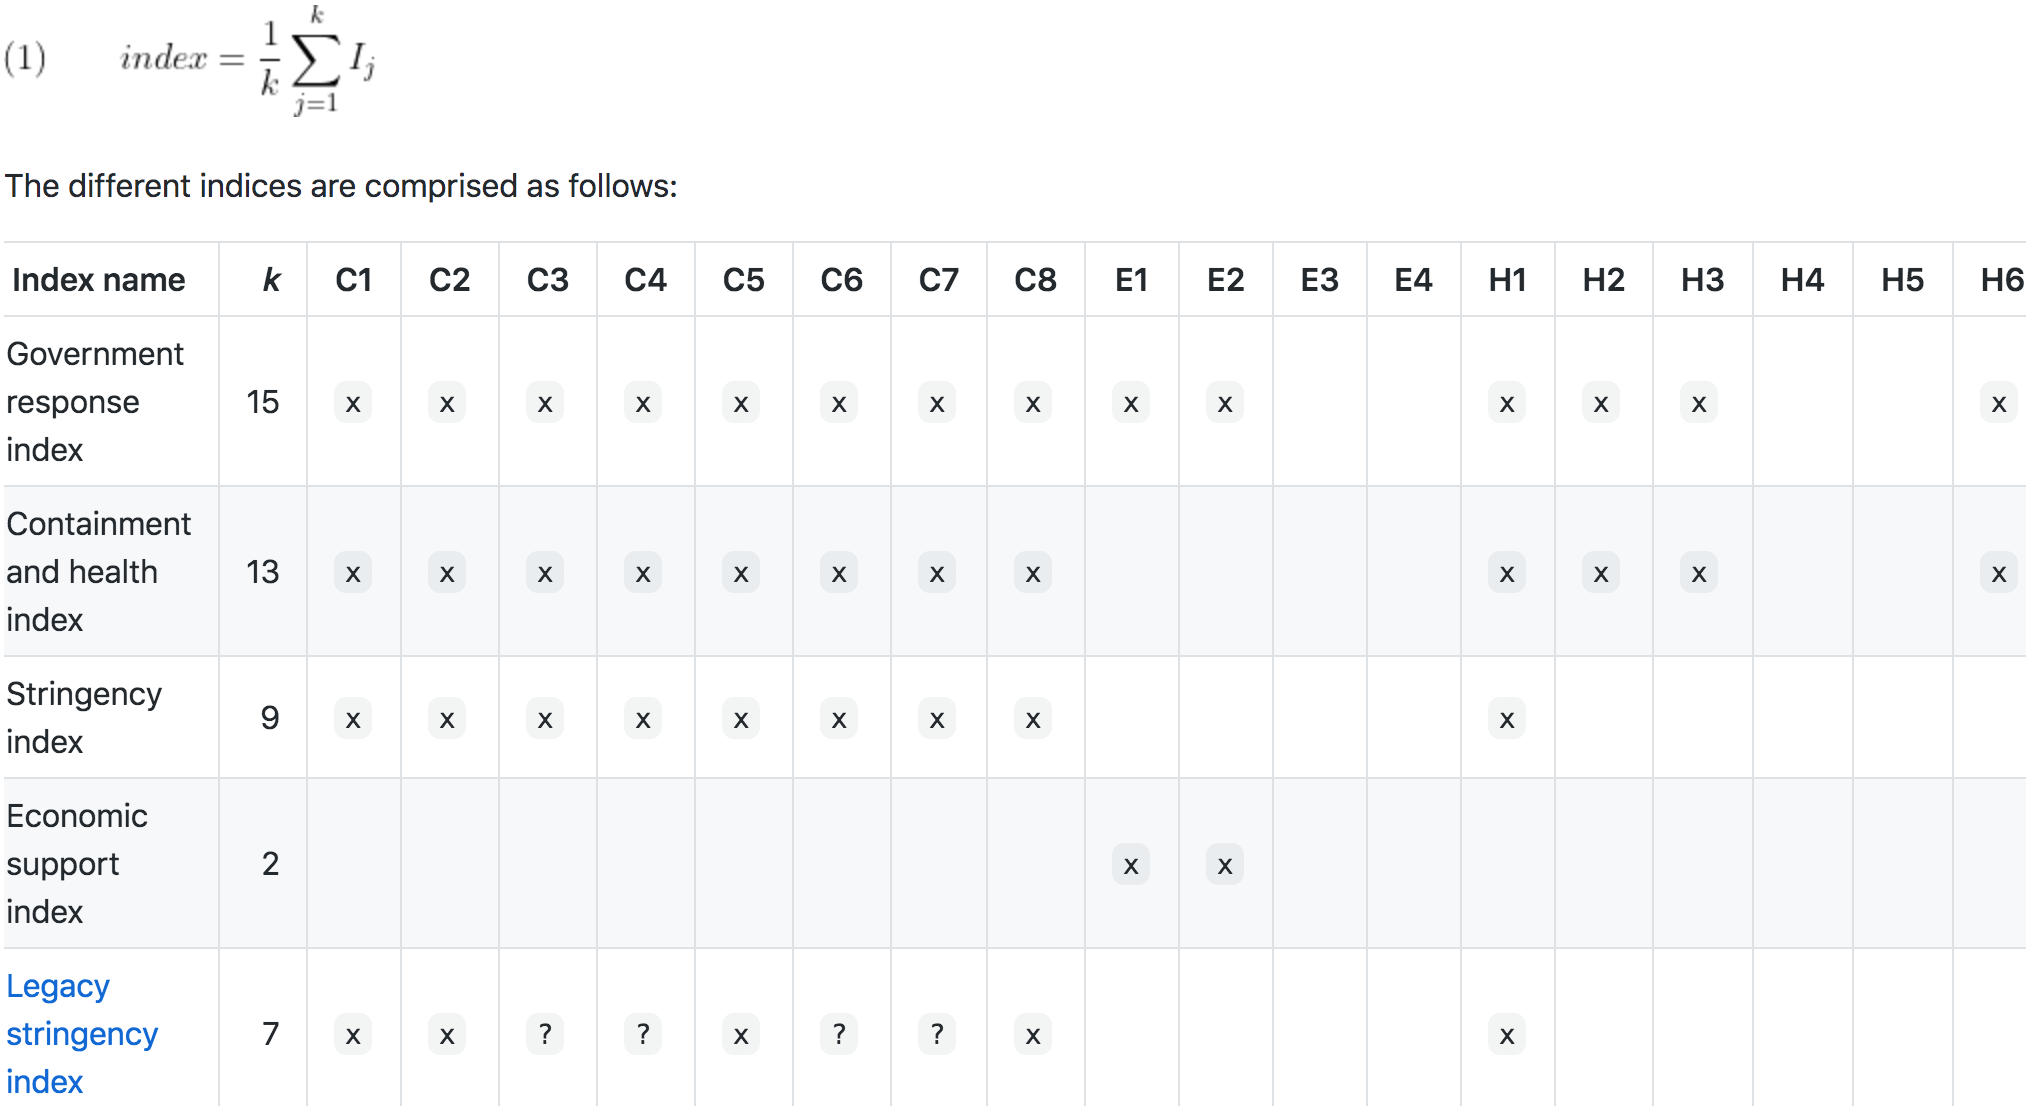





In [121]:
#pd.set_option('display.max_rows', 60) # go back to 60 later
#pd.set_option('display.max_colwidth', -1) # cancel trunction
five=NY[['StringencyIndex','GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex']]
five.index=D
five

StringencyIndex  ...  EconomicSupportIndex
2020-01-01              0.0  ...                   0.0
2020-01-02              0.0  ...                   0.0
2020-01-03              0.0  ...                   0.0
2020-01-04              0.0  ...                   0.0
2020-01-05              0.0  ...                   0.0
...                     ...  ...                   ...
2021-04-24             50.0  ...                 100.0
2021-04-25             50.0  ...                 100.0
2021-04-26             50.0  ...                 100.0
2021-04-27              NaN  ...                   NaN
2021-04-28              NaN  ...                   NaN

[484 rows x 4 columns]

In [122]:
inter='StringencyIndex'
five.loc['2020-12-09',inter]=five.loc['2020-12-08',inter]
five.loc['2020-12-10',inter]=five.loc['2020-12-09',inter]

inter='GovernmentResponseIndex'
five.loc['2020-12-09',inter]=five.loc['2020-12-08',inter]
five.loc['2020-12-10',inter]=five.loc['2020-12-09',inter]

inter='ContainmentHealthIndex'
five.loc['2020-12-09',inter]=five.loc['2020-12-08',inter]
five.loc['2020-12-10',inter]=five.loc['2020-12-09',inter]

inter='EconomicSupportIndex'
five.loc['2020-12-09',inter]=five.loc['2020-12-08',inter]
five.loc['2020-12-10',inter]=five.loc['2020-12-09',inter]

########################################################################################################
five=five.loc['2020-03-03':'2020-12-10',:]

five

StringencyIndex  ...  EconomicSupportIndex
2020-03-03            19.44  ...                   0.0
2020-03-04            19.44  ...                   0.0
2020-03-05            19.44  ...                   0.0
2020-03-06            19.44  ...                   0.0
2020-03-07            19.44  ...                   0.0
...                     ...  ...                   ...
2020-12-06            72.69  ...                 100.0
2020-12-07            72.69  ...                 100.0
2020-12-08            72.69  ...                 100.0
2020-12-09            72.69  ...                 100.0
2020-12-10            72.69  ...                 100.0

[283 rows x 4 columns]

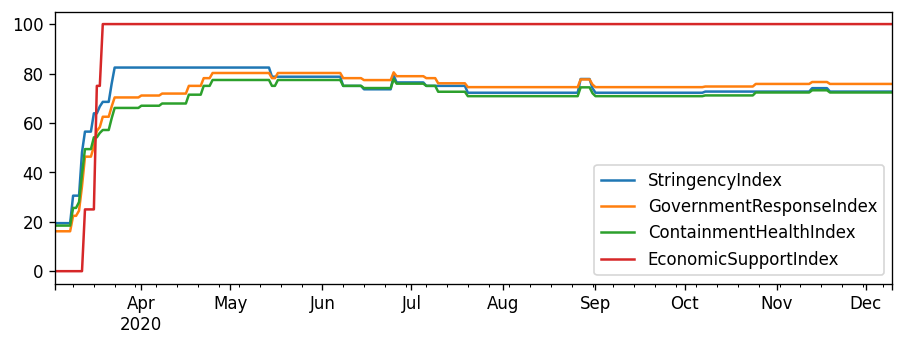

In [123]:
five.plot() # plotting the indecies 

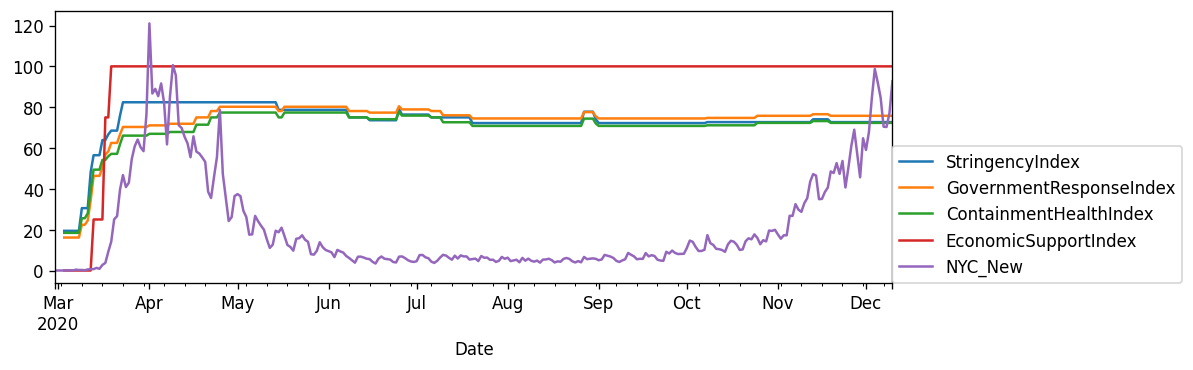

In [124]:
five.plot()
(df_nyc['NYC_New']*100/12000).plot()
plt.legend(loc=(1,0)) # overlaying scaled covid cases


___________________________ StringencyIndex ___________________________________________

correlation between number of daily cases and StringencyIndex
Correlation= 0.33588267998952354


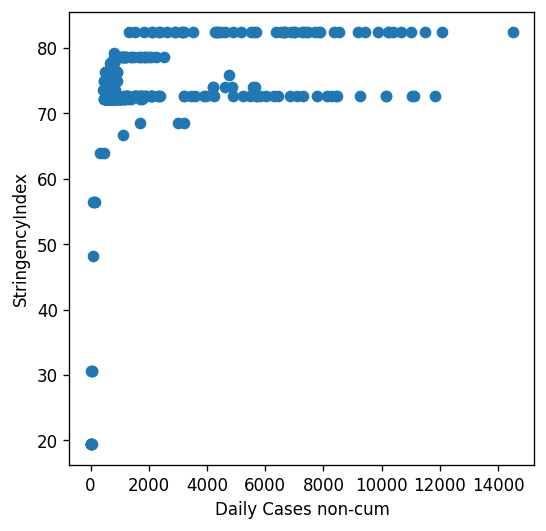


___________________________ GovernmentResponseIndex ___________________________________________

correlation between number of daily cases and GovernmentResponseIndex
Correlation= 0.11547338974661985


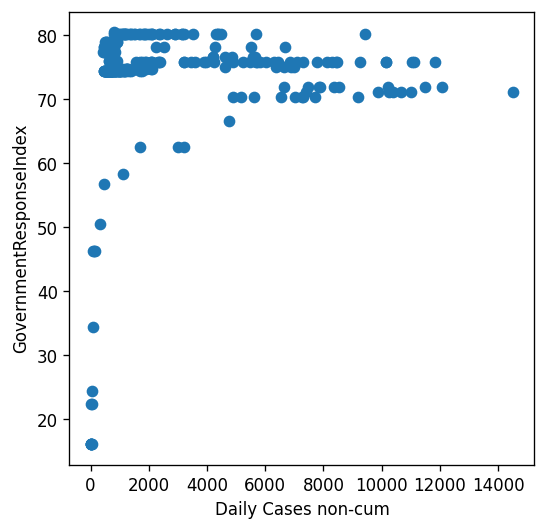


___________________________ ContainmentHealthIndex ___________________________________________

correlation between number of daily cases and ContainmentHealthIndex
Correlation= 0.08895124215760557


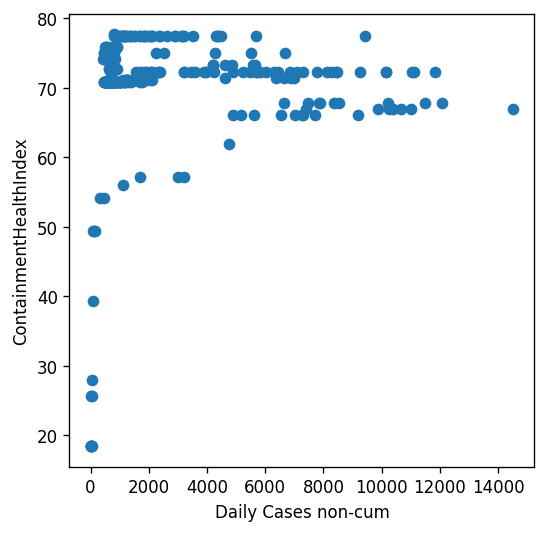


___________________________ EconomicSupportIndex ___________________________________________

correlation between number of daily cases and EconomicSupportIndex
Correlation= 0.2010849276933243


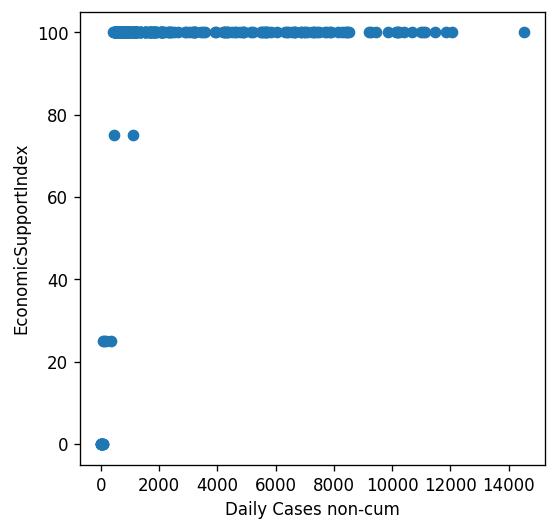

In [125]:
for col in five.columns:
    The_List[i]=col
    print('\n___________________________',The_List[i],'___________________________________________')
    print('\ncorrelation between number of daily cases and',The_List[i])
    correlation=ts_df['NYC_New'].corr(five[The_List[i]])
    print('Correlation=',correlation)
    plt.figure(figsize=(5,5))
    plt.scatter(ts_df['NYC_New'],five[The_List[i]])
    plt.xlabel('Daily Cases non-cum')
    plt.ylabel(The_List[i])
    plt.show()

>Correlation between number of daily cases and StringencyIndex
- Correlation= 0.33

>correlation between number of daily cases and GovernmentResponseIndex
- Correlation= 0.11

>correlation between number of daily cases and EconomicSupportIndex
- Correlation= 0.2

>correlation between number of daily cases and ContainmentHealthIndex
- Correlation= 0.081

This comparison was really done for completness. I chose to analyse some specific features that make up  these indicies. Here I just wasnted to see which index was most highly correlated to guage weather the features are a part of that index. 

The Stringency index StringencyIndex was the most highly correlated to daily cases at 0.33 and is comprized of a linear combination of C1 to C8 and H1:

C1_School closing	
C2_Workplace closing	
C3_Cancel public events	
C4_Restrictions on gatherings	
C5_Close public transport	
C6_Stay at home requirements
C7_Restrictions on internal movement
C8_International travel controls
H1_Public information campaigns

Later in the section I dig deeper into C2-C4 which I analyse more closley. 

All in all containment seems to be the major contributer to the StringencyIndex and my next goal would be to test the statistical significance of this as correlation does not always guarantee causation.

### Testing Statistical Significance of indices

In [241]:
# Establish dataframe of exogeneous variables! 
exog = five

In [242]:
def exog_train_test_split(split,NumDays):  
  global exog_train
  global exog_test
  if (NumDays==0): # split by days (no. of days to forcast), change from 0 if u wanna use days
    NumDays=round((1-split)*len(exog))
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  else:
    start=exog.index[0]
    end=exog.index[len(exog)-1]
    mid=end-timedelta(days=NumDays)
    exog_train=exog[start:mid]
    exog_test=exog[mid:end]
  return (exog_train,exog_test)

#### Split the data accordingly

In [128]:
train_test_split(1,0) 
exog_train_test_split(1,0)

(            StringencyIndex  ...  EconomicSupportIndex
 2020-03-03            19.44  ...                   0.0
 2020-03-04            19.44  ...                   0.0
 2020-03-05            19.44  ...                   0.0
 2020-03-06            19.44  ...                   0.0
 2020-03-07            19.44  ...                   0.0
 ...                     ...  ...                   ...
 2020-12-06            72.69  ...                 100.0
 2020-12-07            72.69  ...                 100.0
 2020-12-08            72.69  ...                 100.0
 2020-12-09            72.69  ...                 100.0
 2020-12-10            72.69  ...                 100.0
 
 [283 rows x 4 columns],             StringencyIndex  ...  EconomicSupportIndex
 2020-12-10            72.69  ...                 100.0
 
 [1 rows x 4 columns])

In [129]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced

# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

#### Training 

In [130]:
import pmdarima as pm
# SARIMAX Model
TRAIN=A_train
sxmodel = pm.auto_arima(TRAIN, exogenous=exog_train,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=7, max_q=5, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                           information_criterion='oob')

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=722.281, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=764.972, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=709.485, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=729.408, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=763.962, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=766.956, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=692.171, Time=1.31 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=674.820, Time=1.28 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=672.832, Time=0.65 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=729.987, Time=0.24 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=674.815, Time=0.96 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=721.291, Time=0.47 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=678.198, Time=0.56 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=673.255, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  283
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -326.895
Date:                           Thu, 29 Apr 2021   AIC                            669.789
Time:                                   01:18:52   BIC                            698.925
Sample:                               03-03-2020   HQIC                           681.473
                                    - 12-10-2020                                         
Covariance Type:                             opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
StringencyIndex             0.1469      0.055      2.668      0.008       0.039       0.255
GovernmentResponseIndex    58.1482     25.429      2.287      0.022       8.308     107.989
ContainmentHealthIndex    -51.0214     22.269     -2.291      0.022     -94.667      -7.376
EconomicSupportIndex       -7.2300      3.178     -2.275      0.023     -13.459      -1.001
ma.L1                      -0.2238      0.037     -6.077      0.000      -0.296      -0.152
ar.S.L7                     0.9394      0.026     35.624      0.000       0.888       0.991
ma.S.L7                    -0.6883      0.061    -11.343      0.000      -0.807      -0.569
sigma2                      0.5844      0.034     17.358      0.000       0.518       0.650
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               112.91
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

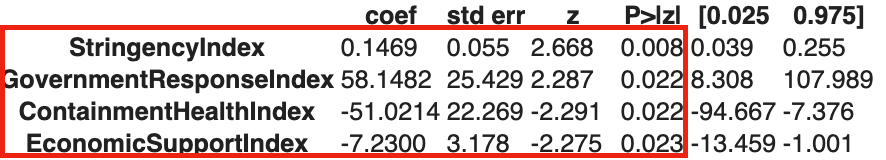

We see that the stringency indec has the smallest coef. however it is also the most statistically significant and has the smallest relative std error. for that reason I will look into the index in search of answers

# **Final Forcast Using Best Model**

Bringing back my best model

SARIMA Manually tuned

**Goal, forcast unknown future (1 month ahead)**

#### Split the data accordingly

In [219]:
train_test_split(1,0)  # this means 100% of the data. all training will focasted based on number of periods desiered 
print(' ')
# this alters the value of global paramaters test and train to trflect either (%Split,NumDaysForcast)
#In this case we are forcasting the last 14 days or 2 weeks

In [220]:
# New Terminology for this aection
# Training
A_train=train.Cbrt_NYC_New
B_train=train.Once_Differenced
C_train=train.Twice_Differenced
# Testing
A_test=test.Cbrt_NYC_New
B_test=test.Once_Differenced
C_test=test.Twice_Differenced

In [221]:
A_train

Date
2020-03-03     1.000000
2020-03-04     2.080084
2020-03-05     2.223980
2020-03-06     1.442250
2020-03-07     3.732511
                ...    
2020-12-06    21.652245
2020-12-07    20.370591
2020-12-08    20.356121
2020-12-09    20.997732
2020-12-10    22.323057
Name: Cbrt_NYC_New, Length: 283, dtype: float64

### Trianing 

Train/fit on full dataset

______________________for Order (6, 2, 1) _______________________________

_____________Build Model On training Data & Show Summary_______________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                            SARIMAX Results                                            
Dep. Variable:                                    Cbrt_NYC_New   No. Observations:                  283
Model:             SARIMAX(6, 2, 1)x(1, 0, [1, 2, 3, 4, 5], 7)   Log Likelihood                -223.430
Date:                                         Thu, 29 Apr 2021   AIC                            474.859
Time:                                                 02:03:36   BIC                            523.820
Sample:                                             03-03-2020   HQIC                           494.578
                                                  - 12-10-2020                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

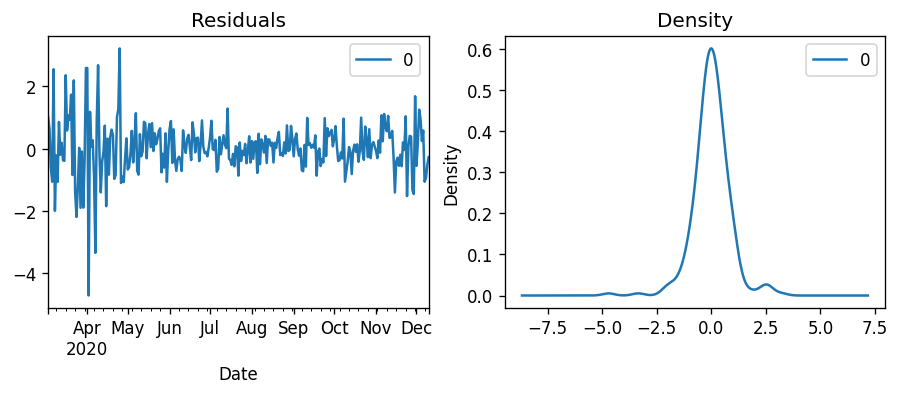

_______________________Model Training Behaviour________________________


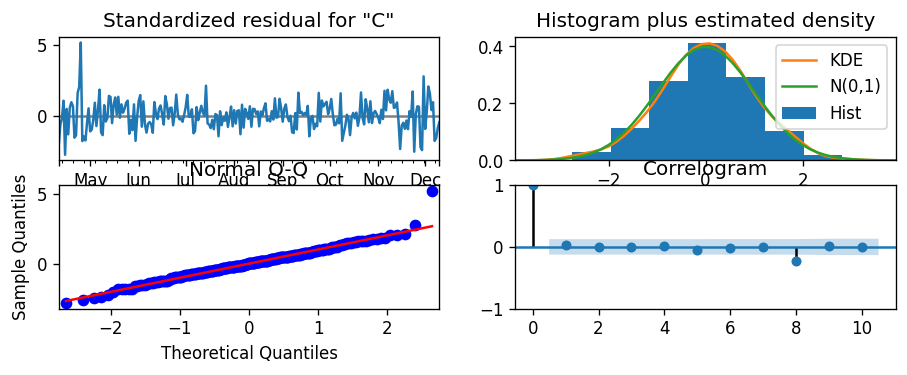

<Figure size 1080x360 with 0 Axes>

In [222]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order=(6, 2, 1)         # this suddenly stopped letting me use a 7 in place of the 6.. really adversly effected model performcance..
seasonal_order=(1, 0, 5, 7)  # I tuned the seasonal componant alittle here to get a better fit!

ORDER=order
TRAIN=A_train
  
print('______________________for Order',ORDER,'_______________________________\n')
print('_____________Build Model On training Data & Show Summary_______________')
# 1,1,1 ARIMA Model
model = SARIMAX( TRAIN, 
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False, 
                enforce_invertibility=False)   # try with and without last two as defaults are true
model_fit = model.fit()
print(model_fit.summary())

print('_________________________Plot residual errors__________________________')
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

print('_______________________Model Training Behaviour________________________')
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.show()
plt.tight_layout(h_pad=7)

#when you set dynamic=False the in-sample lagged values are used for prediction.
#That is, the model gets trained up until the previous value to make the next prediction. 
#This can make the fitted forecast and actuals look artificially good.'''

"So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model."

Based on this it looks like we have a well tuned model 

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### Validation

In [223]:
TRAIN

Date
2020-03-03     1.000000
2020-03-04     2.080084
2020-03-05     2.223980
2020-03-06     1.442250
2020-03-07     3.732511
                ...    
2020-12-06    21.652245
2020-12-07    20.370591
2020-12-08    20.356121
2020-12-09    20.997732
2020-12-10    22.323057
Name: Cbrt_NYC_New, Length: 283, dtype: float64

______________________for Order (6, 2, 1) Forcast______________________

______________________Build The Model & Forcast________________________


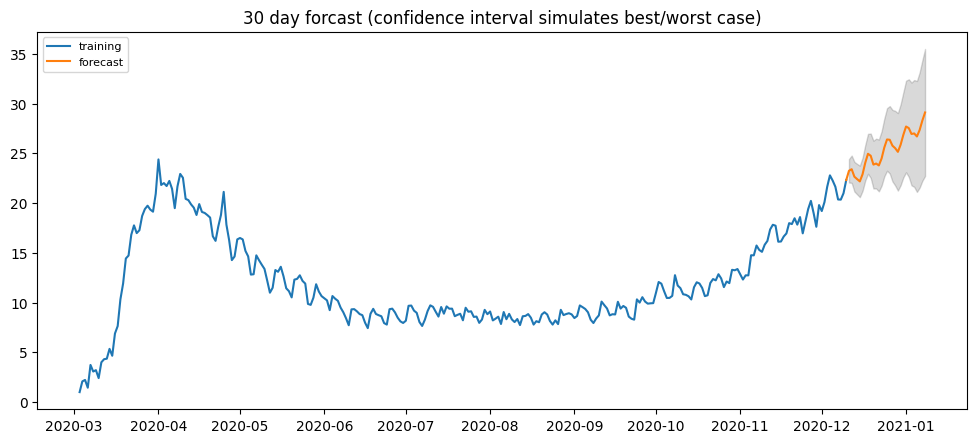

In [231]:
print('______________________for Order',ORDER,'Forcast______________________\n')
print('______________________Build The Model & Forcast________________________')

#TEST= A_test
n_periods=30 # next 30 days

# Forecast
fc = model_fit.get_forecast(steps=30)
conf = fc.conf_int()

# Make as pandas series
idx=pd.date_range(TEST.index[-1], periods = n_periods, freq='D')

fc_series = pd.Series(fc.predicted_mean, index=idx)
lower_series = pd.Series(conf.iloc[:, 0], index=idx)   # Best Case
upper_series = pd.Series(conf.iloc[:, 1], index=idx)   # Worst Case
fc_series[0]=TRAIN[-1]



# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(TRAIN, label='training')
plt.plot(fc_series, label='forecast')
#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.15)
plt.title('30 day forcast (confidence interval simulates best/worst case)')
plt.legend(loc='upper left', fontsize=8)
plt.show()


#### Taking the Forcast back to scale


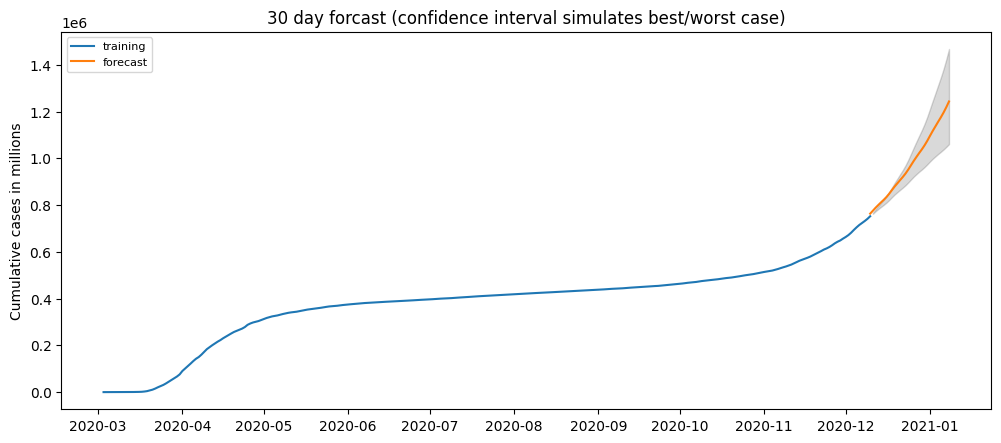

In [232]:
# call for the following: train, forcast, lower_series, upper_series

#cumulative output
def Scale_Back_1D (ts):

  scaled=((ts)**3).cumsum()

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_1D(TRAIN), label='training')


plt.plot(((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(lower_series), ((((train.Cbrt_NYC_New.values)**3).cumsum())[-1]) +Scale_Back_1D(upper_series), 
                color='k', alpha=.15)
plt.title('30 day forcast (confidence interval simulates best/worst case)')
plt.ylabel("Cumulative cases in millions")
plt.legend(loc='upper left', fontsize=8)
plt.show()

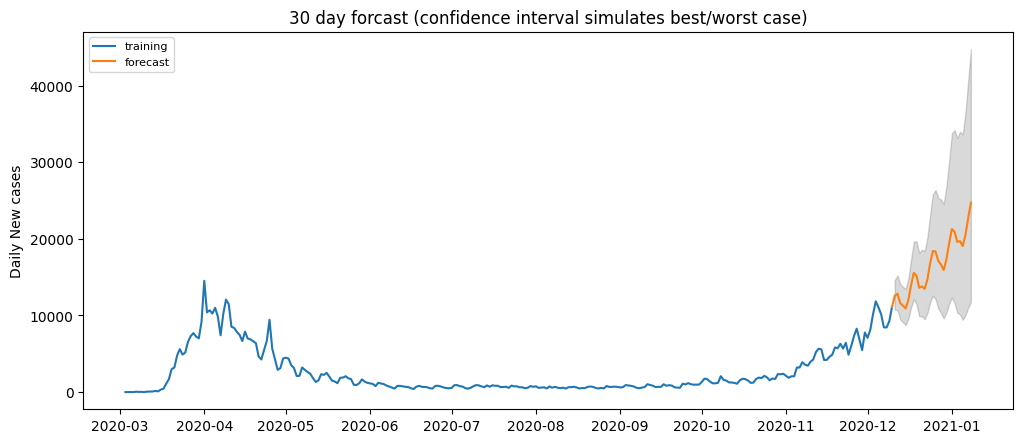

In [233]:
def Scale_Back_0D (ts):

  scaled=((ts)**3)

  return scaled

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('30 day forcast (confidence interval simulates best/worst case)')
plt.ylabel("Daily New cases")
plt.legend(loc='upper left', fontsize=8)
plt.show()


Forcasts are quite allarming. with a 1 month out worst case that could bring total cases in the state to date to 1.4 milion from a mid of 1.2 million and a best case of about 1. the difference between each case is abour 2 milion. looking at the daily cases, we have a worst case for the number of daily new cases to reach 40,000 from a mid of about 26,000 and a best case of 15,000. 

The above would be assuming no changes are made to the current state's covid 19 response. and although the no change senario is implrobible it is frighting. 

As previously mentioned on December the 8th of 2020 Cuomo directed hospital bed capacity to be upgraded by 25 percent and warned that indoor dining may face a total shutdown in the New York City area if hospitalization rates continued to climb. that is around when we begin our prediction of the future and daily cases are near all time highs from the first wave. NYC in particular was over capacity during the first wave so its seems governor Cuomo is looking at a similar forcast!

### final Test (Done in January to see how that actually performed)

In [234]:
full=pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
    index_col=0,
    thousands=','
)

pd.options.display.max_rows # 60 is default
pd.set_option('display.max_rows', None)
inter_full=full[full.Province_State=='New York']
inter_full

# Drop empty rows (Out of NY, Unspecified)
inter_full.drop(index=inter_full[inter_full.FIPS==90036].index, inplace=True)
inter_full.drop(index=inter_full[inter_full.FIPS==80036].index, inplace=True)
inter_full

pd.set_option('display.max_rows', 60)
State_Cases_full=inter_full.loc[:,'1/22/20':].sum()
State_Cases_full.index

from datetime import timedelta

df_nyc_full=pd.DataFrame(State_Cases_full)
df_nyc_full.rename(columns={0: "NYC_Cases"}, inplace=True)
df_nyc_full.index.name='Date'
# make the index a date_time data type 
# this is helpful as in the future we may want to re-sample with different 
# date ranges eg. weekly or monthly to help with resampling 
# or to line up with a different time series thathas a different sampling freq.
# more on this here: https://towardsdatascience.com/working-with-time-series-data-a8872ebcac3
df_nyc_full.index = pd.to_datetime(df_nyc_full.index, infer_datetime_format=True)
print("number of nans in the data=",np.sum(df_nyc_full.isna()))
df_nyc_full['NYC_New'] = df_nyc_full['NYC_Cases'].diff()
# will have a nan for day 1 backfill it
df_nyc_full['NYC_New'] = df_nyc_full['NYC_New'].fillna(method='bfill')

# start index later to get rid of wastfull 0 days only leave 3
start_date_full=pd.to_datetime(df_nyc_full[df_nyc_full.NYC_Cases!=0].index[0],infer_datetime_format=True)-timedelta(days=3)
start_date_full=pd.to_datetime(start_date_full,infer_datetime_format=True)
df_nyc_full=df_nyc_full.loc[start_date_full:,:]

# Sanity Check for NaN values
print(np.sum(df_nyc_full.isna()))

#Show cleaned dataframe
df_nyc_full

number of nans in the data= NYC_Cases    0
dtype: int64
NYC_Cases    0
NYC_New      0
dtype: int64


NYC_Cases  NYC_New
Date                          
2020-02-29          0      0.0
2020-03-01          0      0.0
2020-03-02          0      0.0
2020-03-03          1      1.0
2020-03-04         10      9.0
...               ...      ...
2021-04-23    2022748   4849.0
2021-04-24    2026882   4134.0
2021-04-25    2030948   4066.0
2021-04-26    2033951   3003.0
2021-04-27    2037263   3312.0

[424 rows x 2 columns]

In [235]:
df_nyc_full.loc['2020-12-10':,:]

NYC_Cases  NYC_New
Date                          
2020-12-10     752104  11124.0
2020-12-11     763228  11124.0
2020-12-12     774228  11000.0
2020-12-13     784815  10587.0
2020-12-14     794953  10138.0
...               ...      ...
2021-04-23    2022748   4849.0
2021-04-24    2026882   4134.0
2021-04-25    2030948   4066.0
2021-04-26    2033951   3003.0
2021-04-27    2037263   3312.0

[139 rows x 2 columns]

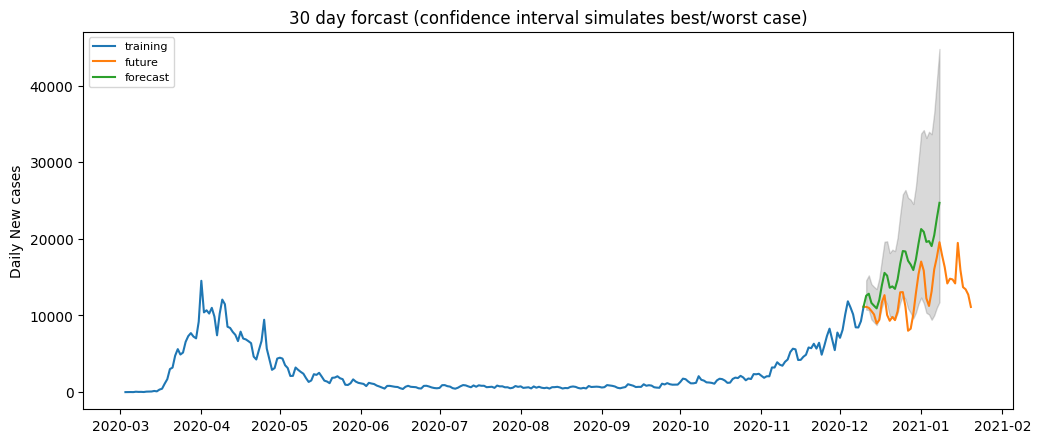

In [237]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Scale_Back_0D(TRAIN), label='training')
plt.plot(df_nyc_full.loc['2020-12-10':'2021-01-20',:].NYC_New, label='future')

plt.plot(Scale_Back_0D(fc_series), label='forecast')

#plt.plot(se_series, label='Standard Error')
plt.fill_between(lower_series.index, Scale_Back_0D(lower_series), Scale_Back_0D(upper_series), 
                color='k', alpha=.15)
plt.title('30 day forcast (confidence interval simulates best/worst case)')
plt.ylabel("Daily New cases")
plt.legend(loc='upper left', fontsize=8)
plt.show()


Thankfully number of new cases have not increased at the worst or mid forcast rates however it does appear to perfectly follow our forcasts lower confidence interval or what I modeled as our best case senario. A large spike is seen around the time of new years. this could be attributable to gatherings relatied to christmas and NYE.

other updates from december:
December 14- indoor dining stopped statewide



## Summary:


I was interested in seeing how closley correlated some governoment responses were to coivid cases. More specifically, I was interested in examining the follwing variables: cancelations of public events, restrictions on gatherings, testing frequency and facial coverings inforcement and lastly number of confirmed deaths. 

Using the The Oxford Covid-19 Government Response Tracker I was able to zero in on these variable and examine their correlations. the following was found. 

>Correlation between number of daily cases and ConfirmedDeaths
- Correlation= 0.656
  - This was expected and deaths are a result of cases.

>Correlation between number of daily cases and C3_Cancel public events
- Correlation= 0.441
  - This was expected. the more cases you get the more you need to cancel public events etc. 

>Correlation between number of daily cases and C4_Restrictions on gatherings
- Correlation= 0.437
  - This was also expected. for the same reason as above.

>Correlation between number of daily cases and H2_Testing policy
- Correlation= -0.436
  - This was unexpected. intuitivly the more cases rise the more testing you need! however looking at the plots testing policy we see that the testing policies were developped alittle later during the first wave. that could have caused the negativity.

>Correlation between number of daily cases and H6_Facial Coverings
- Correlation= -0.260
  - This was also unexpected intutivley more cases rise the more greater stringency should be placed on face coverings to bring cases down.
  - Also I initially thought of these correlations in a very different way where it made sense for testing policy to have negative correlations. However I hade a lightbulb moment last minute and changed things, in that case the other correlations werent making sense! so i had to think of it differently. Hope its right!

Please note my use words like may and could is attritutable to the fact that "correlation does not imply causation". Although these correlations may match our intiution we cannot legitimately deduce a cause-and-effect relationship between two variables solely on the basis of an observed association or correlation between them.



When applying the above discussed variables to a SARIMAX model as exogenous variables and training or fitting them to the covid cases time series 
as exogenous the folowing statstical significance test was diduced  

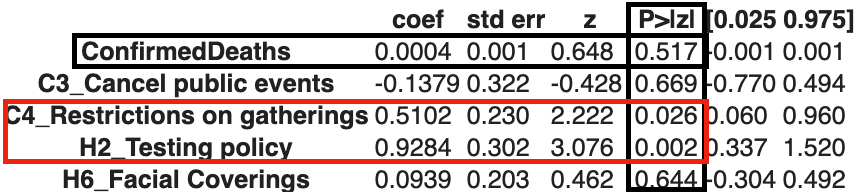

Because everything but confirmed deaths is ordinally encoded and of the same approxiate scale comparing coefficient size amungs them is a valid way of testing their importance in fitment to the data. 

In terms of the statistical significant of each coefficient value. gathering restrictions annd testing policy were the only ones to make the cut of P<5%. however, even then with std errors as large as they have, how statistically significant cant it be..

**All in all examining the importance of exogenous variables by using correlations and then ARIMAX for statistical significance in this way proved to be an uneventful.**

Please refer to the figure bellow for my explination as to why. 


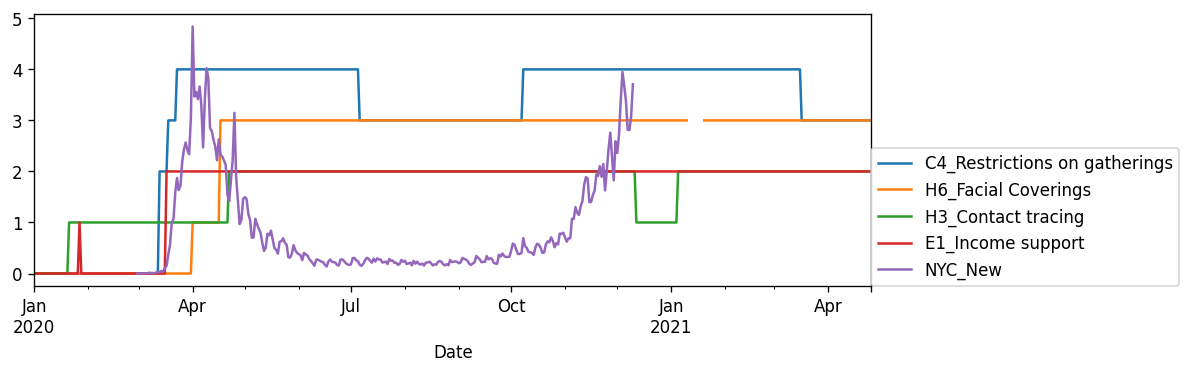

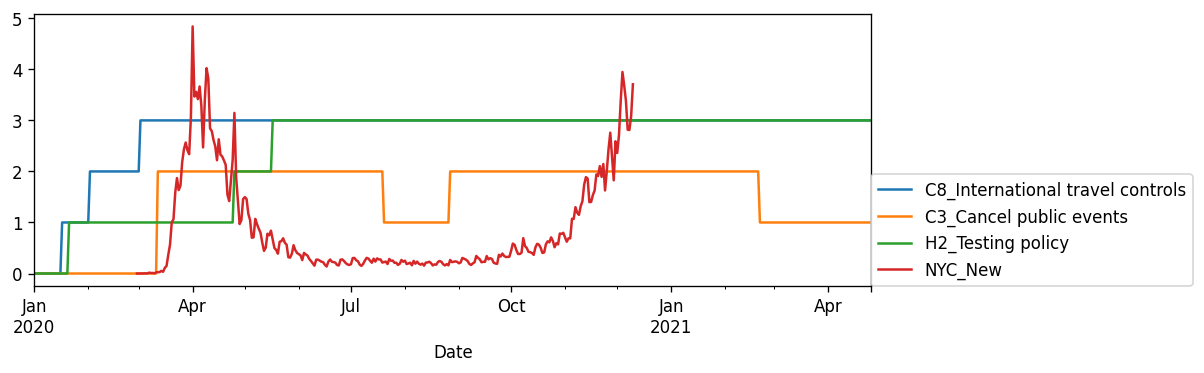

In [230]:
df_gath[A].plot()
(df_nyc['NYC_New']*4/12000).plot()
plt.legend(loc=(1,0))
# broke them into two for ease of visual interpretation 
df_gath[B].plot()
(df_nyc['NYC_New']*4/12000).plot()
plt.legend(loc=(1,0))

I dont think the confusion and poor results are completly attributable to the model as if you look at the exogenous variables, most of them exhibited dynamic behaviour during the first wave (increases in containment, cancelations etc) until they flatlined or receded close to their maximum levels. However, while they platoed at these levels, Covid cases fell and then went back to rising! making their correlations uninformative. 

Also measures that were early enough to coincide with the first rise all had postive correlations (Containmnet, travel restrictions etc). but those that were late (eg testing policy, contact tracing and even facial coverings!) ended up being implemented and increasing in extremety while cases were falling so their correlations are also out of whack. 

It is very interesting how containment was mandated so far before facial coverings!

I believe this odd behavour from my exogenous variables has made them very uninformatove.

their skewed correlation and strange behaviour effected their importance in the fitment to the data using ARIMA and hence yeilded low statistical significance.

Considering the above, gathering restrictions annd testing policy where the only exogs with large enough coeffecients and statsitically significant.


##  Policy Guidance


My method for testing for statsical significance was through the use of SARIMAX and the fitment of exogeneous variables to covid cases time series data. 

It coupled with the nature of my exogeneous datasets led to some confusing results and poor statistical significances 

My analysis of the 4 Oxford Indicies yeilded that the stringency index was the most highly correlated to daily covid cases and also proved statistically significant exogenous contributer to the SARIMAX model I fit to the data! Considering this I decided to dig deeper into the index. it was maily made up of containment variables so I picked my favourate handfull and began analysing them more deeply to understand the importance of each respective meassure. unfortuanatley only two meassures which are already very obvious came out as statically signoficant (gathering restrictions annd testing policy). 


Using them improved results by x

All on all: 

Containment Methods appeared to be the clear winner in our analysis. and when you look at the 1 month forcasted projection by my highest accuracy model, NY state is in for a sharp increase in covid cases. 

Containment methods and facial covering mandates have shown historic precidence in controling the spread of the coronavirus as seen in illustrations from the advanced data explorationa and visualization section of this report. 

Since the first wave several of these containment measure remained unchanged however covid cases rose non the less. 

this could be attributable to other unmodeled factors like a decrease in ambient temperature since the summer ended causing more time spend indoors and whatnot. 

There was also the exogenous variables correlations to covid cases which were skewed an unintuative way, as explained earlier this section.

Ideality I would have liked to be able to say that of the exogenous variables I examined, I found a couple with high correlations to the covid cases time series and when applying them to SARIMAX they also proved statistically significant. Considering that, NY State should adapt their response to include more emphasis on these exogenous variables! 

All I was able to prove as highly correlated and statistically signoficant according to SARIMAX were gathering restrictions and testing policy! and that is a no brainer..

If the governoment implements changes that have shown high negative correlation to daily covid cases and are backed by statistical significance, they will achieve a better response.